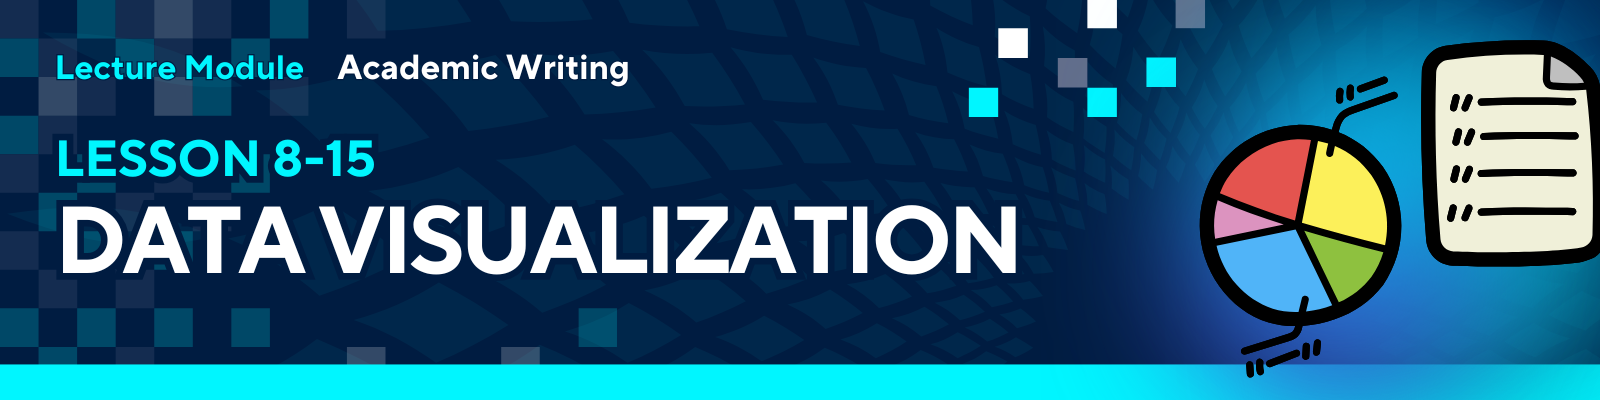

**Settings and Packages Preparation**<br>< <font color="red">**!**</font> > Run the following code whenever you open this workbook

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from urllib.request import urlretrieve
plt.rcParams['figure.dpi'] = 300

def load_dataset(url, filename): return pd.read_csv(filename, low_memory=False) if os.path.exists(filename) else pd.read_csv(url, low_memory=False).to_csv(filename, index=False) or pd.read_csv(filename, low_memory=False)

# If error, uncomment this:
#life_expectancy = load_dataset("https://www.dropbox.com/scl/fi/8vwam1u436lxn3d6qnf62/life_expectancy.csv?rlkey=aj5r2a8n44jo9swhcnuoo7fd5&st=r58zl09e&dl=0&raw=1", "life_expectancy.csv")
#city_temperature = load_dataset("https://www.dropbox.com/scl/fi/s4y96dto8d9vu20ao5du5/city_temperature.csv?rlkey=ppohfggy8i8v329y1dg9ub5p6&st=fuf9bpzy&dl=0&raw=1", "city_temperature.csv")

life_expectancy = load_dataset("https://www.dropbox.com/s/jr72bb2bpcxo725/life_expectancy.csv?raw=1", "../life_expectancy.csv")
city_temperature = load_dataset("https://www.dropbox.com/s/d56yws7bkn3eeam/city_temperature.csv?raw=1", "../city_temperature.csv")

UGLY, BAD, WRONG = "\033[33m╔\033[0m 😖 \033[33;1mUGLY!\033[0m \033[33m═══════════════════════════════\033[0m", "\033[35m╔\033[0m 👎 \033[35;1mBAD!\033[0m \033[35m═══════════════════════════════\033[0m", "\033[31m╔\033[0m ❌ \033[31;1mWRONG!\033[0m \033[31m═══════════════════════════════\033[0m"



---



# **Lesson** <font color="#B0AD89"><strong>6 ⫶⫶ </strong></font>Principles of Visual Design (Part 1)

<img src="https://i.imgur.com/v0WMAGA.png" width=1024 />



## <font color="#B0AD89"><strong>6.1 ⫶ </strong></font>The principle of proportional ink

<img src="https://i.imgur.com/xhO4leM.png" width=1024 />

<img src="https://i.imgur.com/xnozreb.png" width=1024 />

### <font color="#B0AD89"><strong>a ⬝ </strong></font>Visualizations along linear axes

<img src="https://i.imgur.com/g7R55b5.png" width=1024 />

In [3]:
# Data Preparation
oceania_GDP = life_expectancy[
    (life_expectancy['Region'] == 'Oceania') &
    (~life_expectancy['Country'].isin(['Australia', 'New Zealand']))
][['Country', 'GDP_per_capita', 'Year']]

oceania_GDP

Country  GDP_per_capita  Year
37                 Kiribati            1488  2004
63    Micronesia, Fed. Sts.            3035  2003
67                  Vanuatu            2519  2003
87          Solomon Islands            1939  2000
116                   Tonga            3952  2002
...                     ...             ...   ...
2771       Papua New Guinea            2305  2013
2799                   Fiji            5172  2014
2834            Timor-Leste             942  2000
2843               Kiribati            1417  2014
2854                   Fiji            4902  2013

[144 rows x 3 columns]

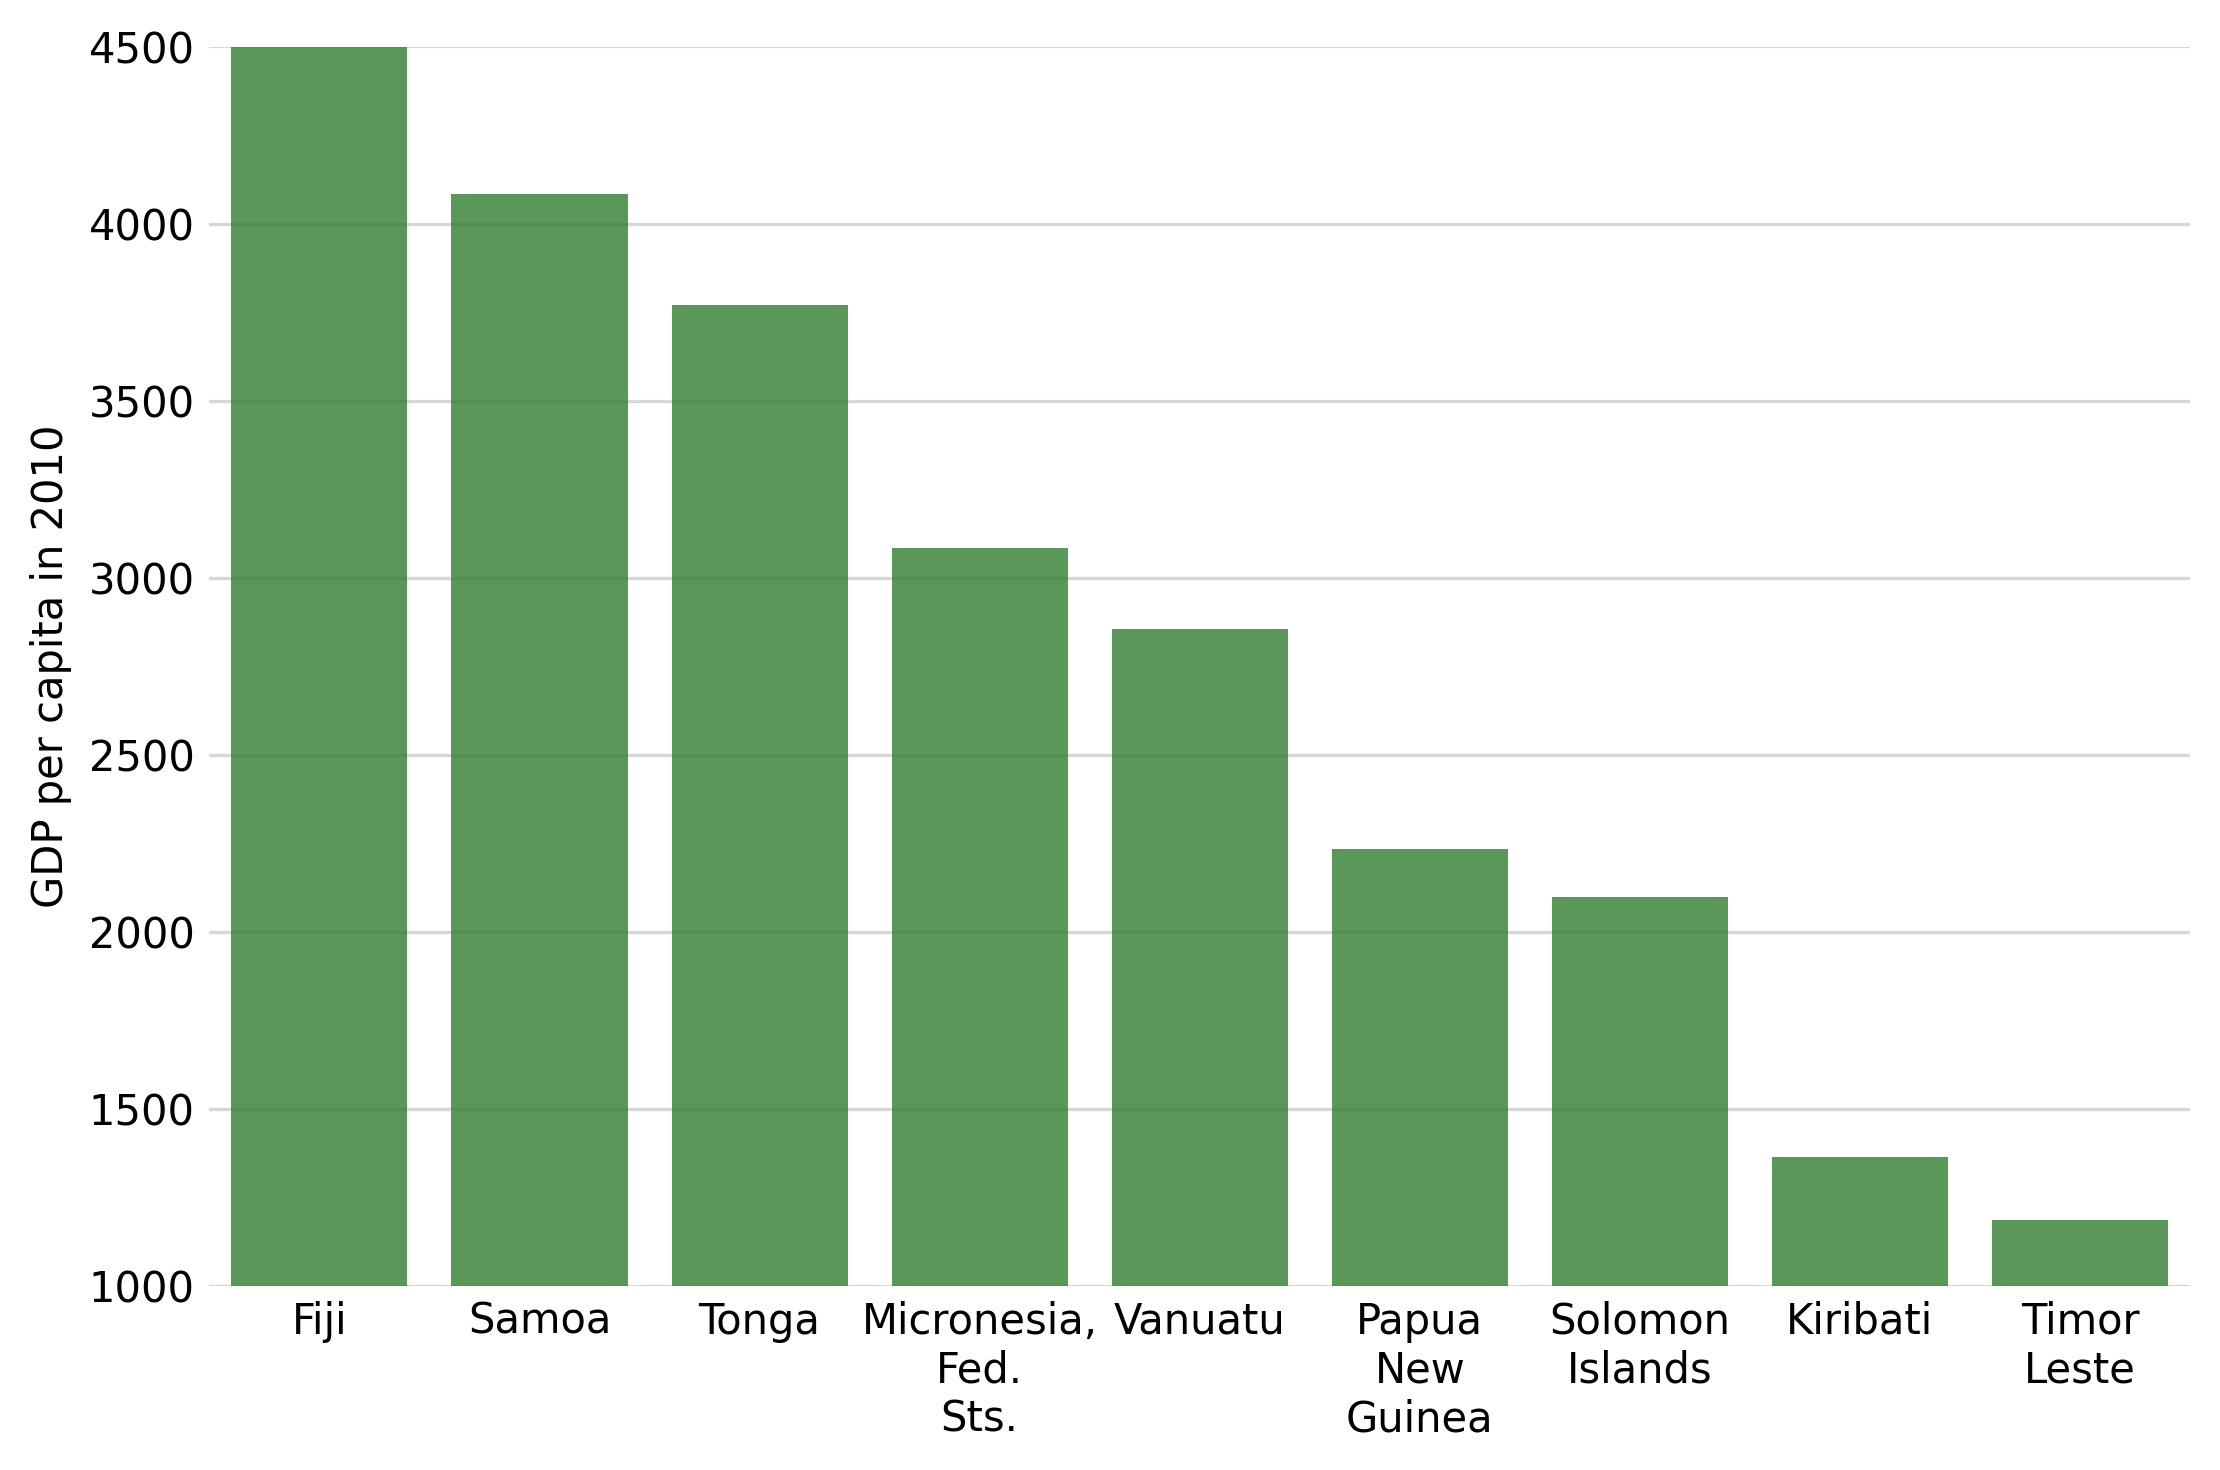

In [4]:
# Set the figure size
plt.figure(figsize=(7.5, 5))

# Filter data for 2010
oceania_GDP_2010 = oceania_GDP[oceania_GDP['Year'] == 2010].copy()

# Sort countries by GDP per capita in descending order
oceania_GDP_2010 = oceania_GDP_2010.sort_values('GDP_per_capita', ascending=False)

# Wrap country names before plotting
oceania_GDP_2010['Country'] = oceania_GDP_2010['Country'].str.replace(r' |-', '\n', regex=True)

# Create the bar plot with seaborn
sns.barplot(data=oceania_GDP_2010,
           x='Country',
           y='GDP_per_capita',
           color='forestgreen',
           alpha=0.8,
           zorder=2)

# Customize the plot
plt.ylim(1000, 4500)
plt.xlabel('')  # Remove x-axis label
plt.ylabel('GDP per capita in 2010')

# Add grid only for y-axis
plt.grid(True, axis='y', alpha=0.5, zorder=1)

# Remove the box and ticks
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

<img src="https://i.imgur.com/0WXg1e3.png" width=1024 />

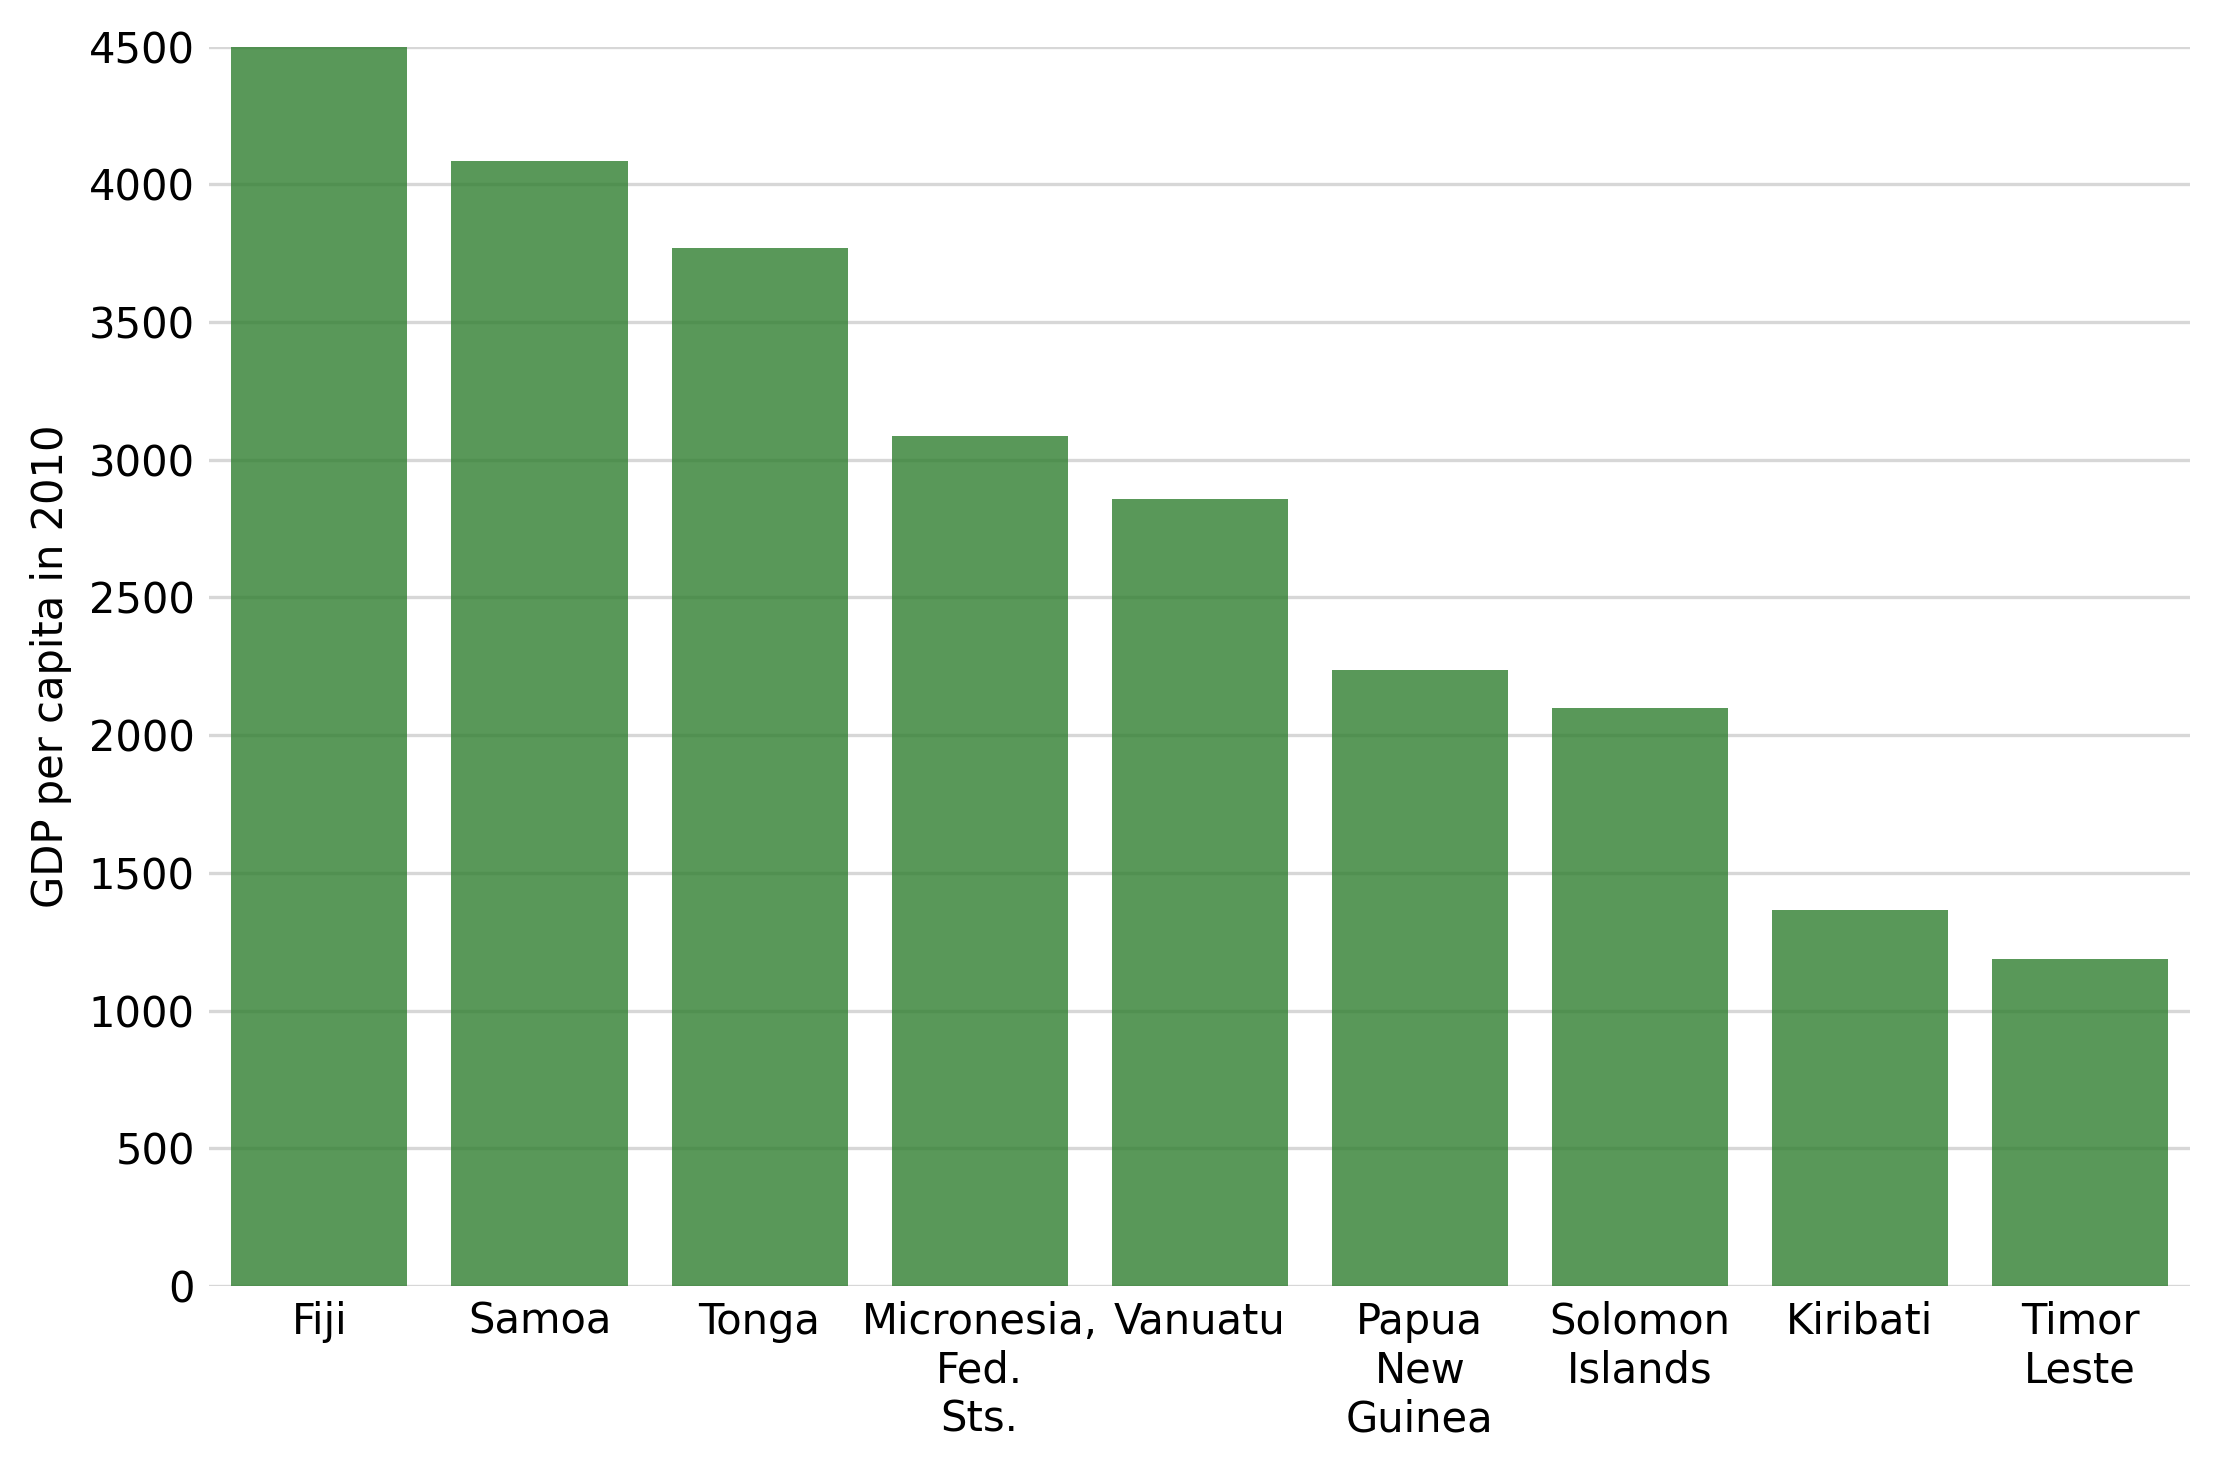

In [5]:
# Set the figure size
plt.figure(figsize=(7.5, 5))

# Create the bar plot with seaborn
sns.barplot(data=oceania_GDP_2010,
           x='Country',
           y='GDP_per_capita',
           color='forestgreen',
           alpha=0.8,
           zorder=2)

# Customize the plot
plt.ylim(0, 4500)
plt.xlabel('')  # Remove x-axis label
plt.ylabel('GDP per capita in 2010')

# Add grid only for y-axis
plt.grid(True, axis='y', alpha=0.5, zorder=1)

# Remove the box and ticks
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

<img src="https://i.imgur.com/nG27TYV.png" width=1024 />

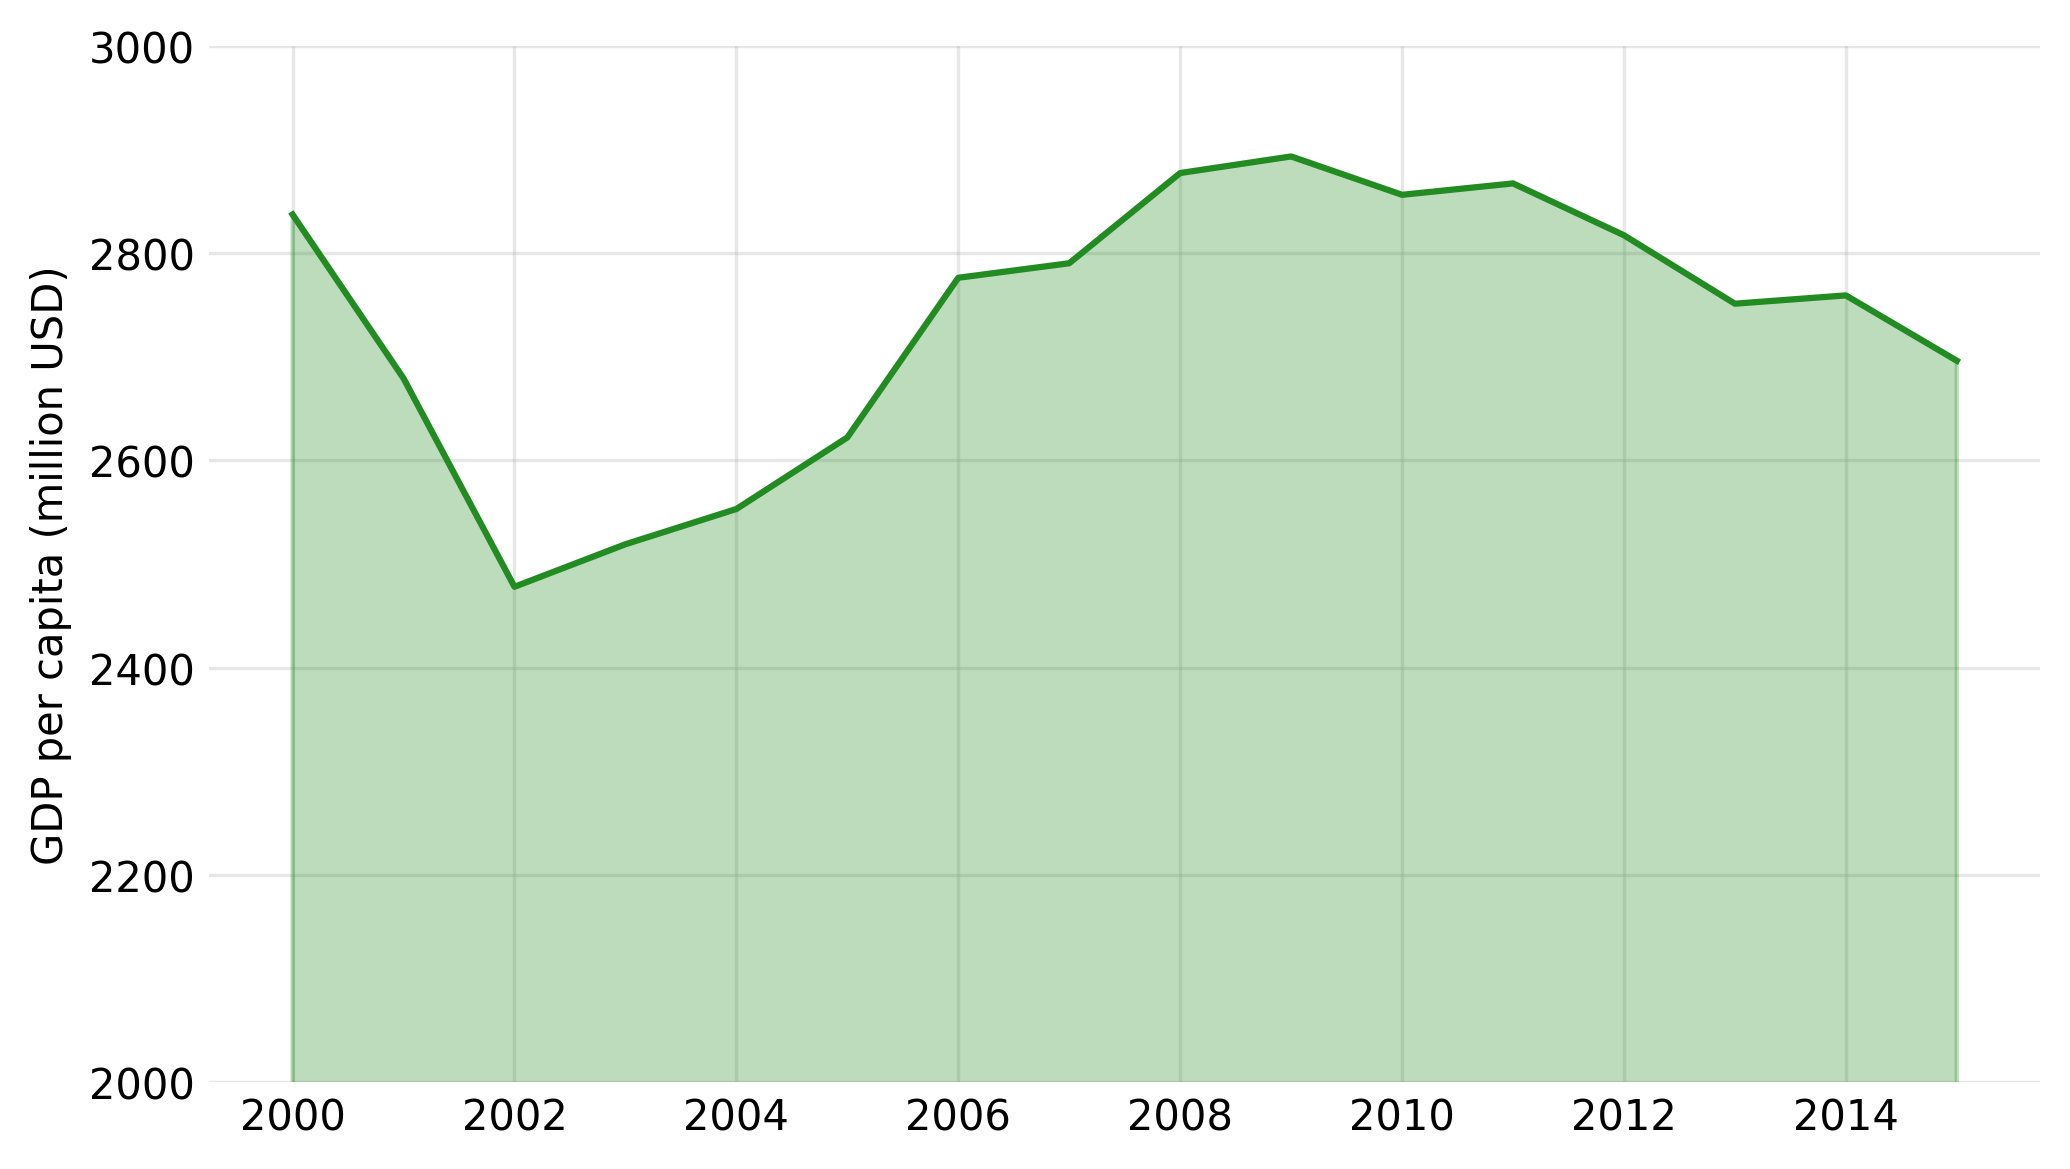

In [6]:
# Set the figure size (halved from original 10, 6)
plt.figure(figsize=(7, 4))

# Filter data for Vanuatu and sort by Year
vanuatu_GDP = oceania_GDP[oceania_GDP['Country'] == 'Vanuatu'].copy()
vanuatu_GDP = vanuatu_GDP.sort_values('Year')  # Add this sorting step

# Create the plot
# First create the area plot
plt.fill_between(vanuatu_GDP['Year'],
                vanuatu_GDP['GDP_per_capita'],
                alpha=0.3,
                color='forestgreen',
                zorder=2)

# Add the line plot on top
plt.plot(vanuatu_GDP['Year'],
         vanuatu_GDP['GDP_per_capita'],
         color='forestgreen')

# Set the y-axis limits
plt.ylim(2000, 3000)

# Customize labels
plt.xlabel('')  # Remove x-axis label
plt.ylabel('GDP per capita (million USD)')

# Add grid (without minor x grid lines)
plt.grid(True, alpha=0.3, zorder=1)

# Remove the box and ticks
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

<img src="https://i.imgur.com/NVSjQDy.png" width=1024 />

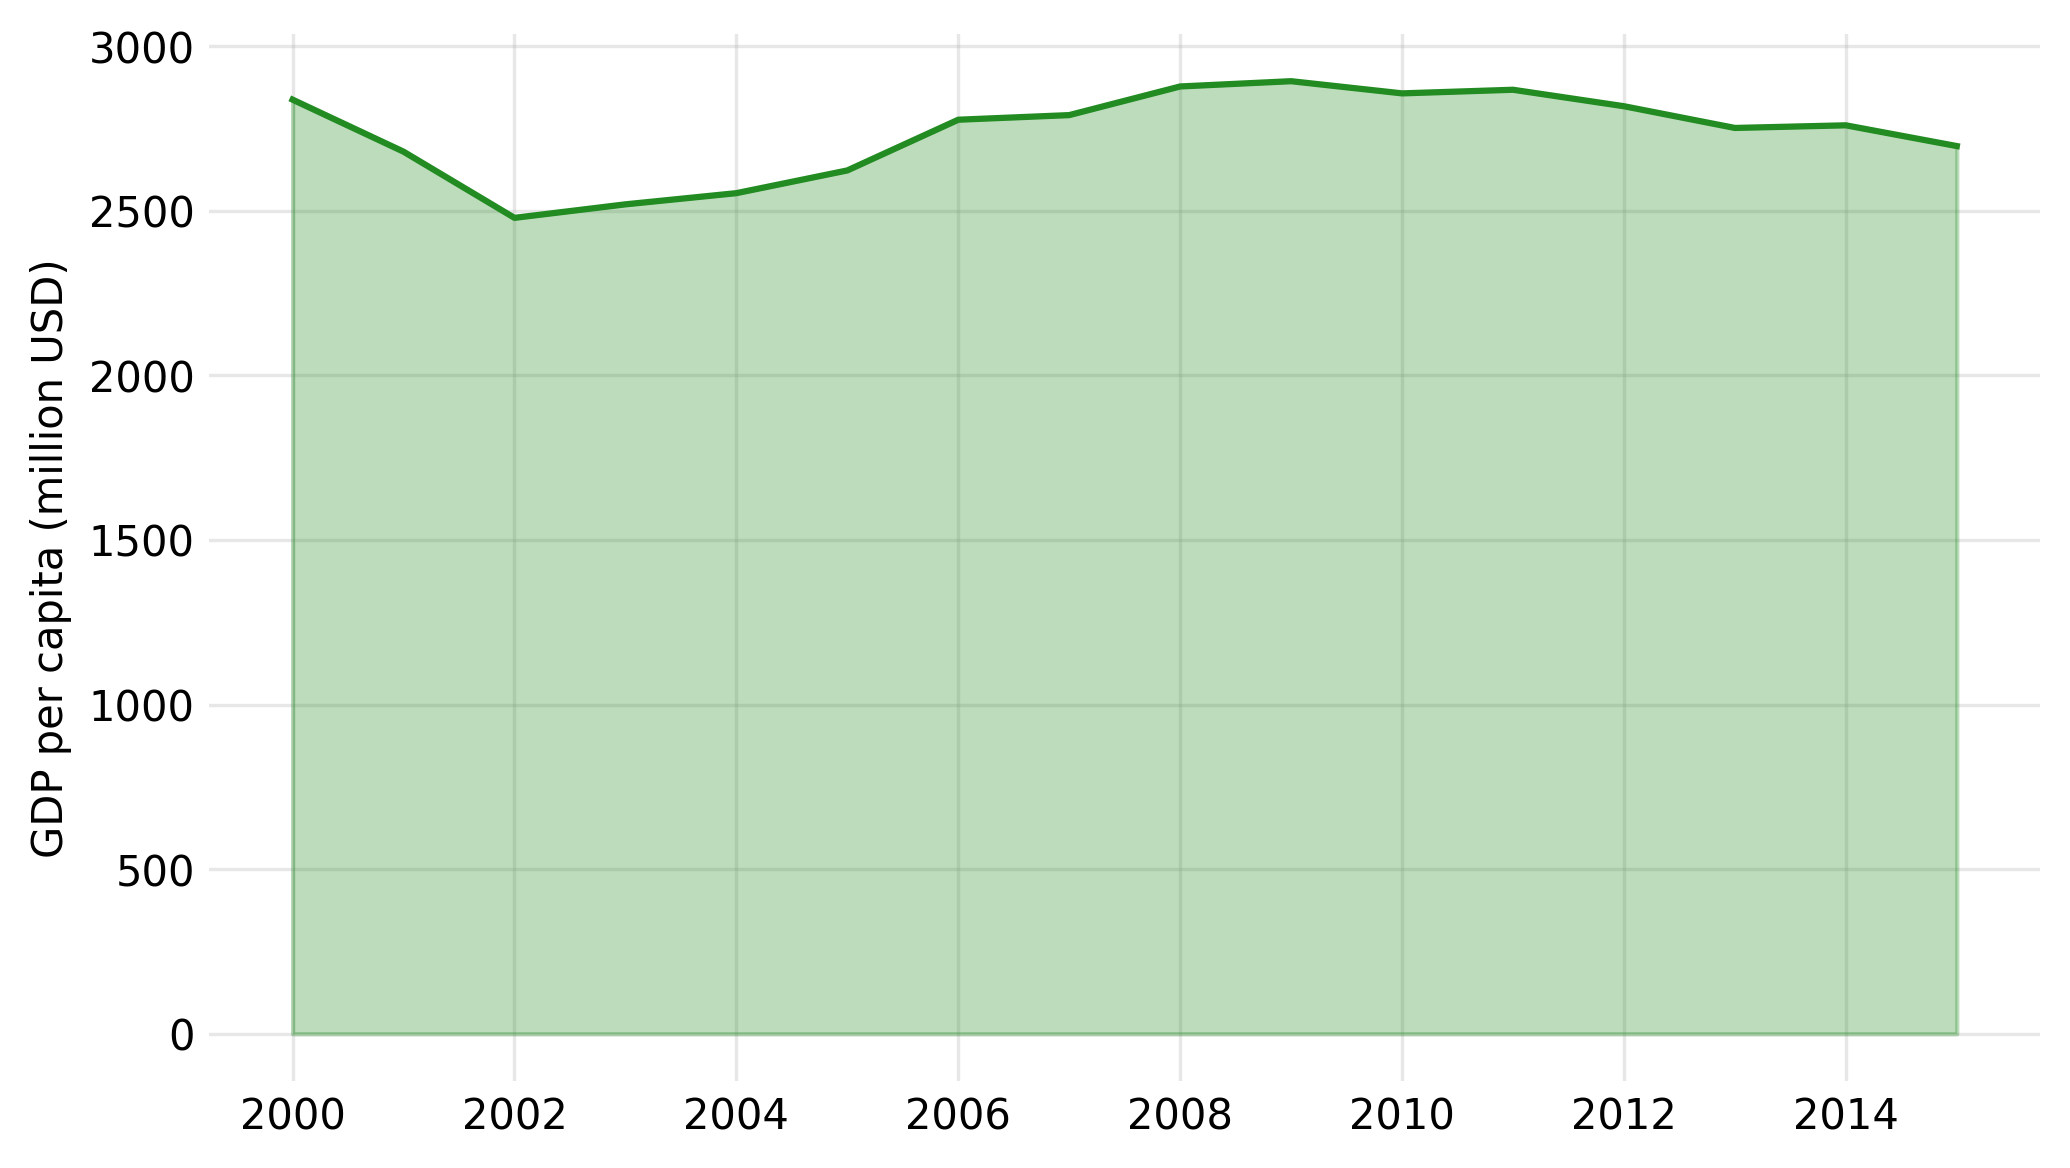

In [7]:
# Set the figure size (halved from original 10, 6)
plt.figure(figsize=(7, 4))

# Create the plot
# First create the area plot
plt.fill_between(vanuatu_GDP['Year'],
                vanuatu_GDP['GDP_per_capita'],
                alpha=0.3,
                color='forestgreen',
                zorder=2)

# Add the line plot on top
plt.plot(vanuatu_GDP['Year'],
         vanuatu_GDP['GDP_per_capita'],
         color='forestgreen')

# Customize labels
plt.xlabel('')  # Remove x-axis label
plt.ylabel('GDP per capita (million USD)')

# Add grid (without minor x grid lines)
plt.grid(True, alpha=0.3, zorder=1)

# Remove the box and ticks
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

<img src="https://i.imgur.com/PqWmezf.png" width=1024 />

In [8]:
# Get Vanuatu's GDP for the year 2000
GDP_2000 = oceania_GDP[
    (oceania_GDP['Country'] == 'Vanuatu') &
    (oceania_GDP['Year'] == 2000)
]['GDP_per_capita'].iloc[0]  # using iloc[0] to get the scalar value

# Create the GDP gain dataframe
oceania_GDP_gain = (
    oceania_GDP[oceania_GDP['Year'] == 2000]
    [['Country', 'GDP_per_capita']]
    .assign(GDP_gain=lambda x: x['GDP_per_capita'] - GDP_2000)
).sort_values("GDP_gain", ascending=False)

oceania_GDP_gain

Country  GDP_per_capita  GDP_gain
803                    Fiji            4107      1270
1165                  Tonga            3672       835
2549                  Samoa            3059       222
1638  Micronesia, Fed. Sts.            2895        58
346                 Vanuatu            2837         0
87          Solomon Islands            1939      -898
1940       Papua New Guinea            1884      -953
2531               Kiribati            1554     -1283
2834            Timor-Leste             942     -1895

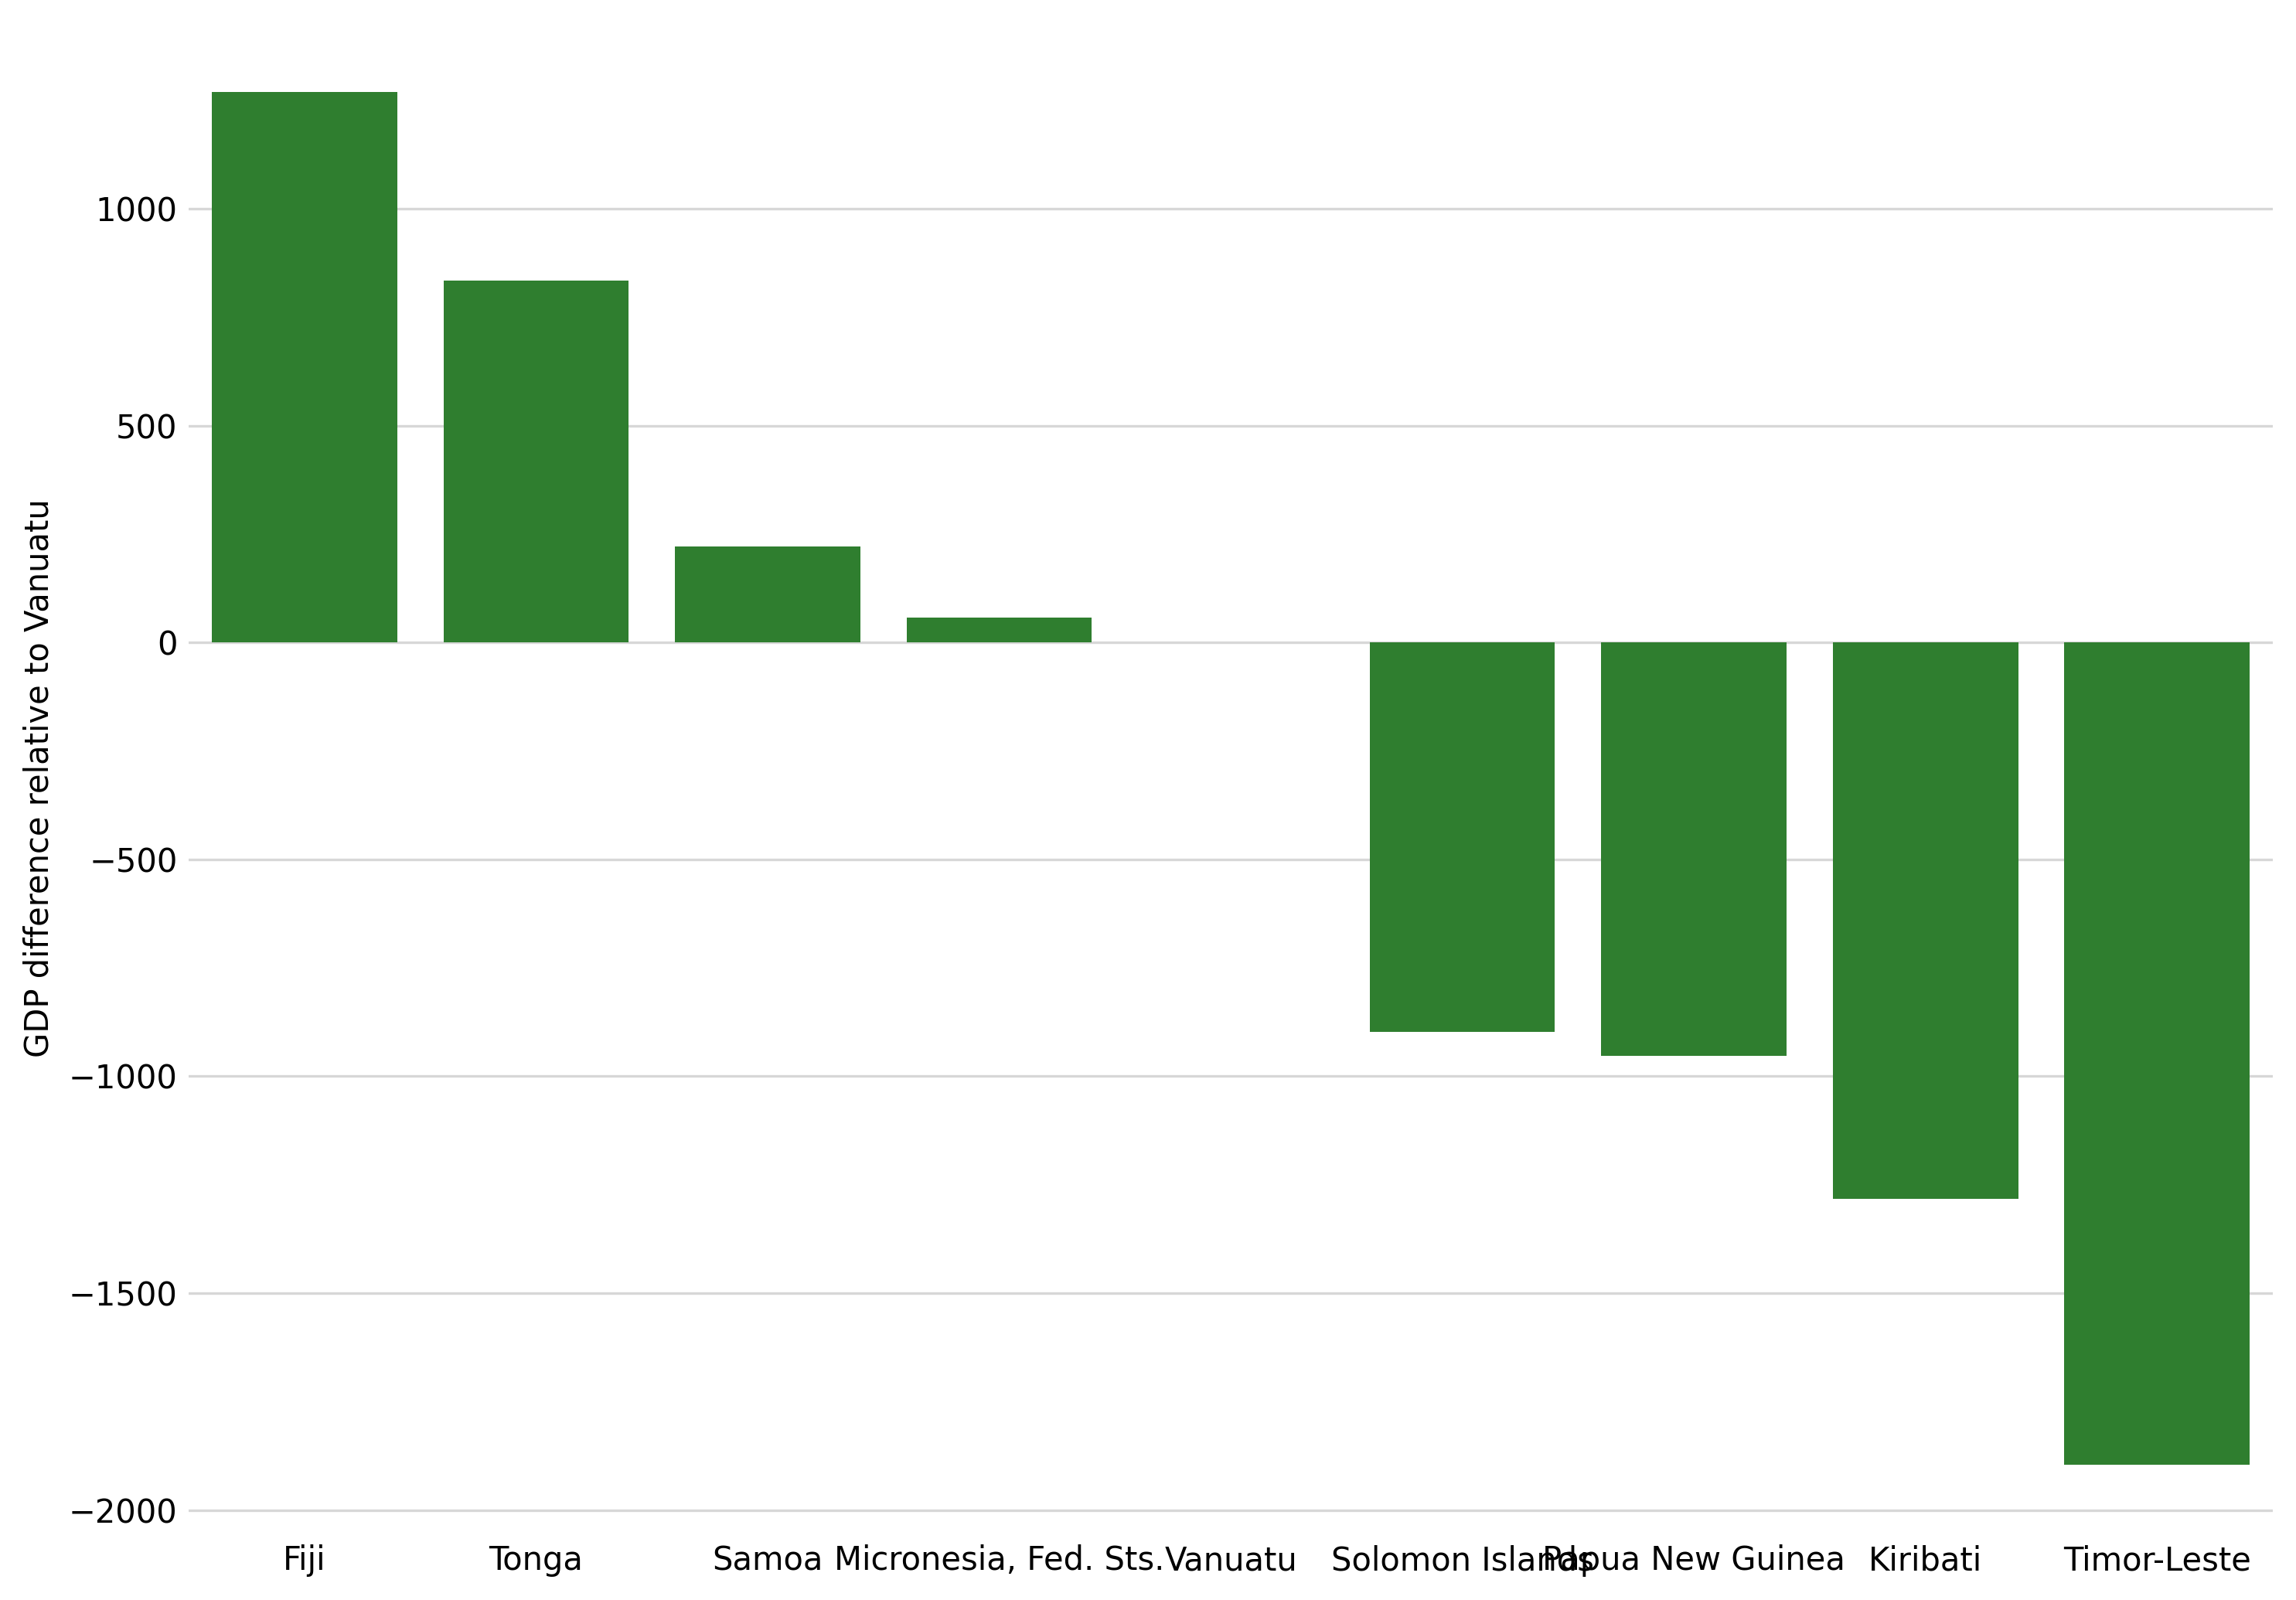

In [9]:
# Set the figure size (halved from original 12, 8)
plt.figure(figsize=(10, 7))

# Create the bar plot
sns.barplot(data=oceania_GDP_gain,
           x='Country',
           y='GDP_gain',
           color='forestgreen',
           zorder=2)

# Customize labels
plt.xlabel('')  # Remove x-axis label
plt.ylabel('GDP difference relative to Vanuatu')

# Add grid only for y-axis
plt.grid(True, axis='y', alpha=0.5, zorder=1)

# Remove the box and ticks
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

<img src="https://i.imgur.com/Avu1a2k.png" width=1024 />

In [10]:
# Get Vanuatu's GDP for the year 2009
GDP_2009 = oceania_GDP[
    (oceania_GDP['Country'] == 'Vanuatu') &
    (oceania_GDP['Year'] == 2009)
]['GDP_per_capita'].iloc[0]  # using iloc[0] to get the scalar value

# Create the Vanuatu GDP gain dataframe
vanuatu_GDP_gain = (
    oceania_GDP[oceania_GDP['Country'] == 'Vanuatu']
    [['Year', 'GDP_per_capita']]
    .assign(GDP_gain=lambda x: x['GDP_per_capita'] - GDP_2009)
)

# For a clearer view of the data
print("\nFirst few rows of the dataset:")
vanuatu_GDP_gain.head()


First few rows of the dataset:


Year  GDP_per_capita  GDP_gain
67   2003            2519      -374
282  2006            2776      -117
346  2000            2837       -56
353  2004            2553      -340
705  2008            2877       -16

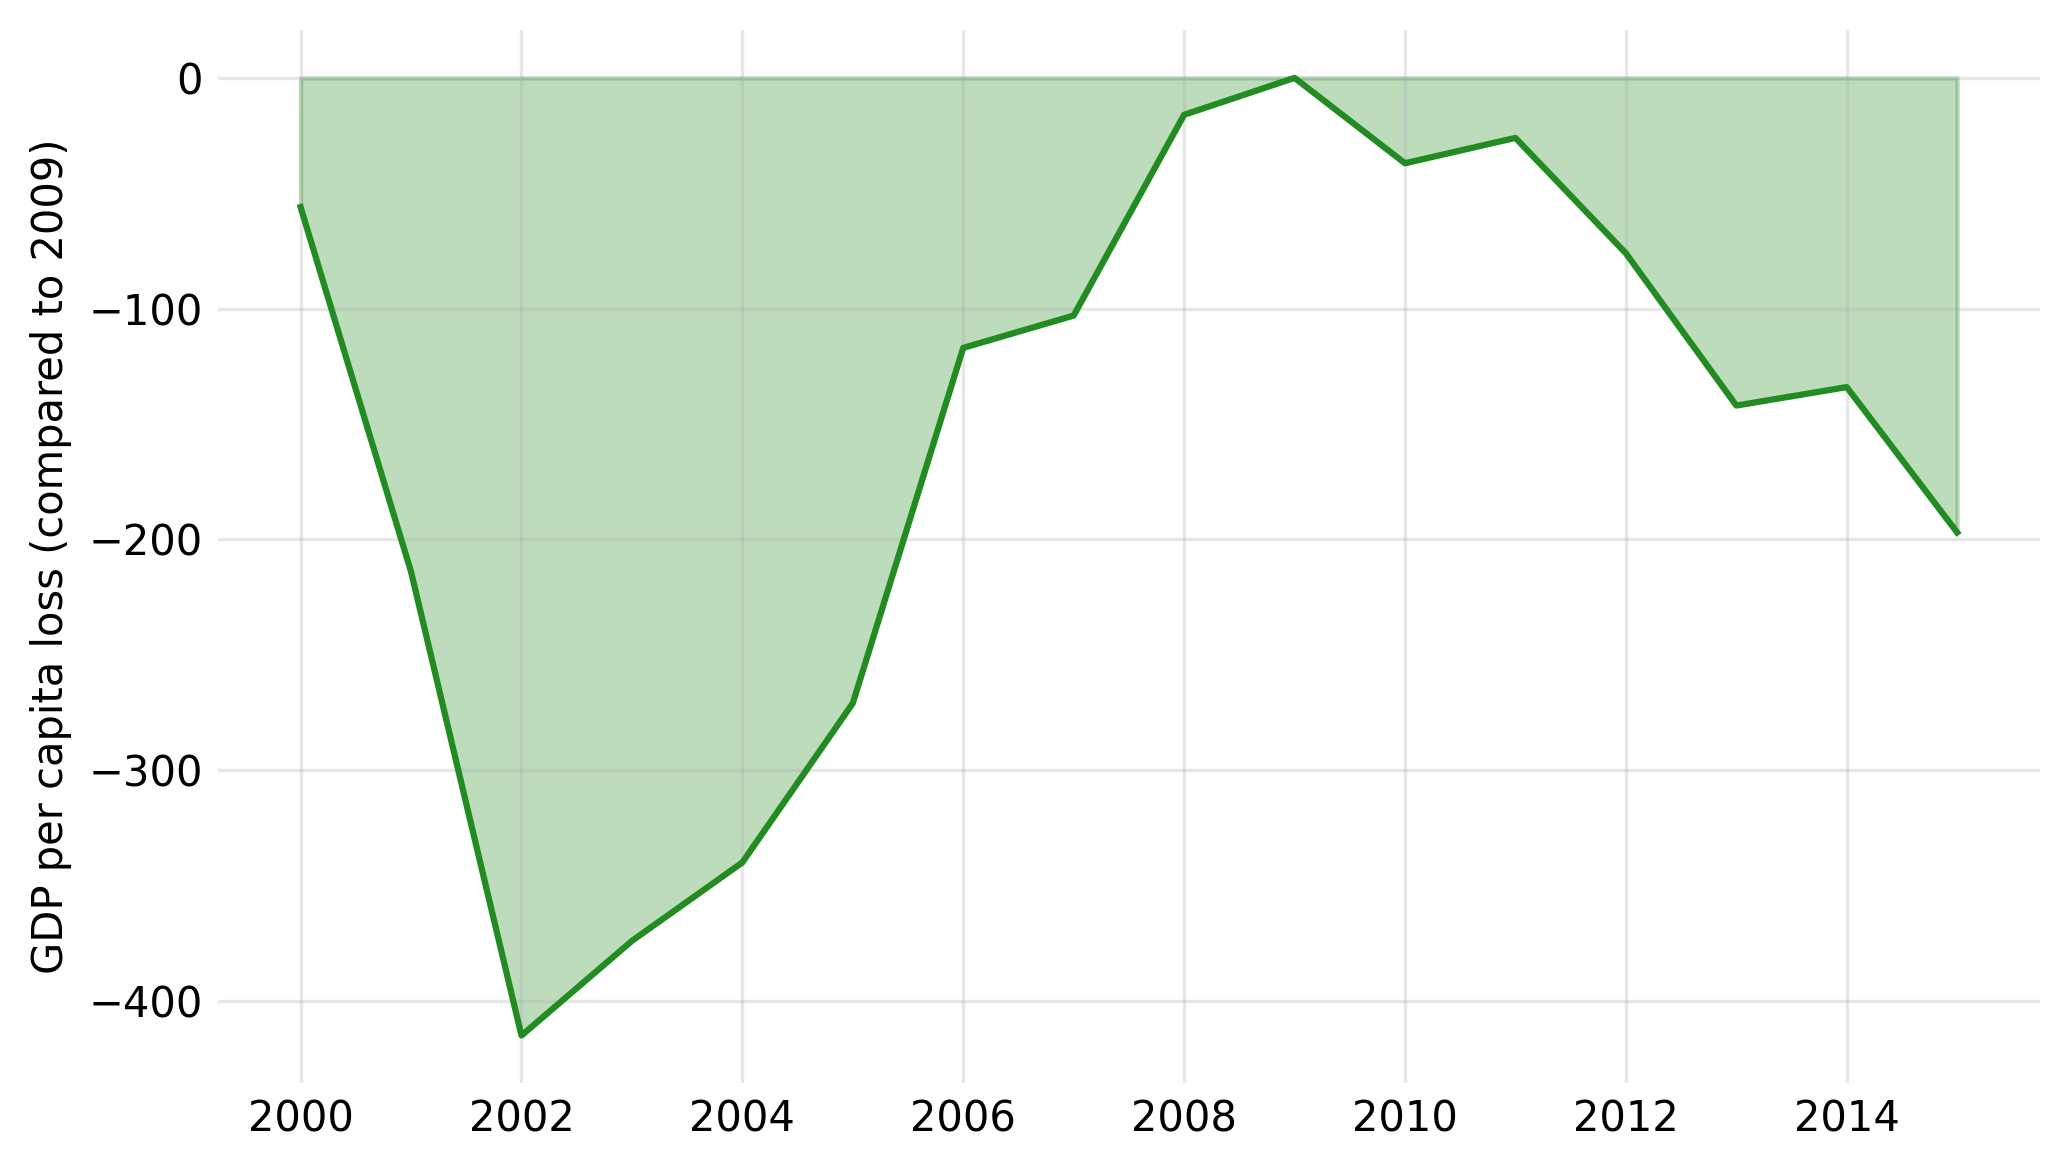

In [11]:
# Set the figure size (halved from original 10, 5)
plt.figure(figsize=(7, 4))

# Sort the data by Year for proper line plotting
vanuatu_GDP_gain = vanuatu_GDP_gain.sort_values('Year')

# Create the plot
# First create the area plot
plt.fill_between(vanuatu_GDP_gain['Year'],
                vanuatu_GDP_gain['GDP_gain'],
                alpha=0.3,
                color='forestgreen')

# Add the line plot on top
plt.plot(vanuatu_GDP_gain['Year'],
         vanuatu_GDP_gain['GDP_gain'],
         color='forestgreen')

# Customize labels
plt.xlabel('')  # Remove x-axis label
plt.ylabel('GDP per capita loss (compared to 2009)')

# Add grid (without minor x grid lines)
plt.grid(True, alpha=0.3, zorder=1)

# Remove the box and ticks
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

### <font color="#B0AD89"><strong>b ⬝ </strong></font>Visualizations along logarithmic axes

<img src="https://i.imgur.com/zOOlAGK.png" width=1024 />

In [12]:
# Data Preparation
oceania_GDP = life_expectancy[
    (life_expectancy['Region'] == 'Oceania') &
    (life_expectancy['Year'] == 2000)
][['Country', 'GDP_per_capita', 'Year']]

# For a more detailed view of the data
print("\nFirst few rows of the dataset:")
oceania_GDP.head()


First few rows of the dataset:


Country  GDP_per_capita  Year
87          Solomon Islands            1939  2000
346                 Vanuatu            2837  2000
803                    Fiji            4107  2000
1165                  Tonga            3672  2000
1638  Micronesia, Fed. Sts.            2895  2000

In [13]:
# For basic statistics about the dataset
print("\nBasic statistics:")
oceania_GDP.describe()


Basic statistics:


GDP_per_capita    Year
count       11.000000    11.0
mean      9028.272727  2000.0
std      14826.631520     0.0
min        942.000000  2000.0
25%       1911.500000  2000.0
50%       2895.000000  2000.0
75%       3889.500000  2000.0
max      45559.000000  2000.0

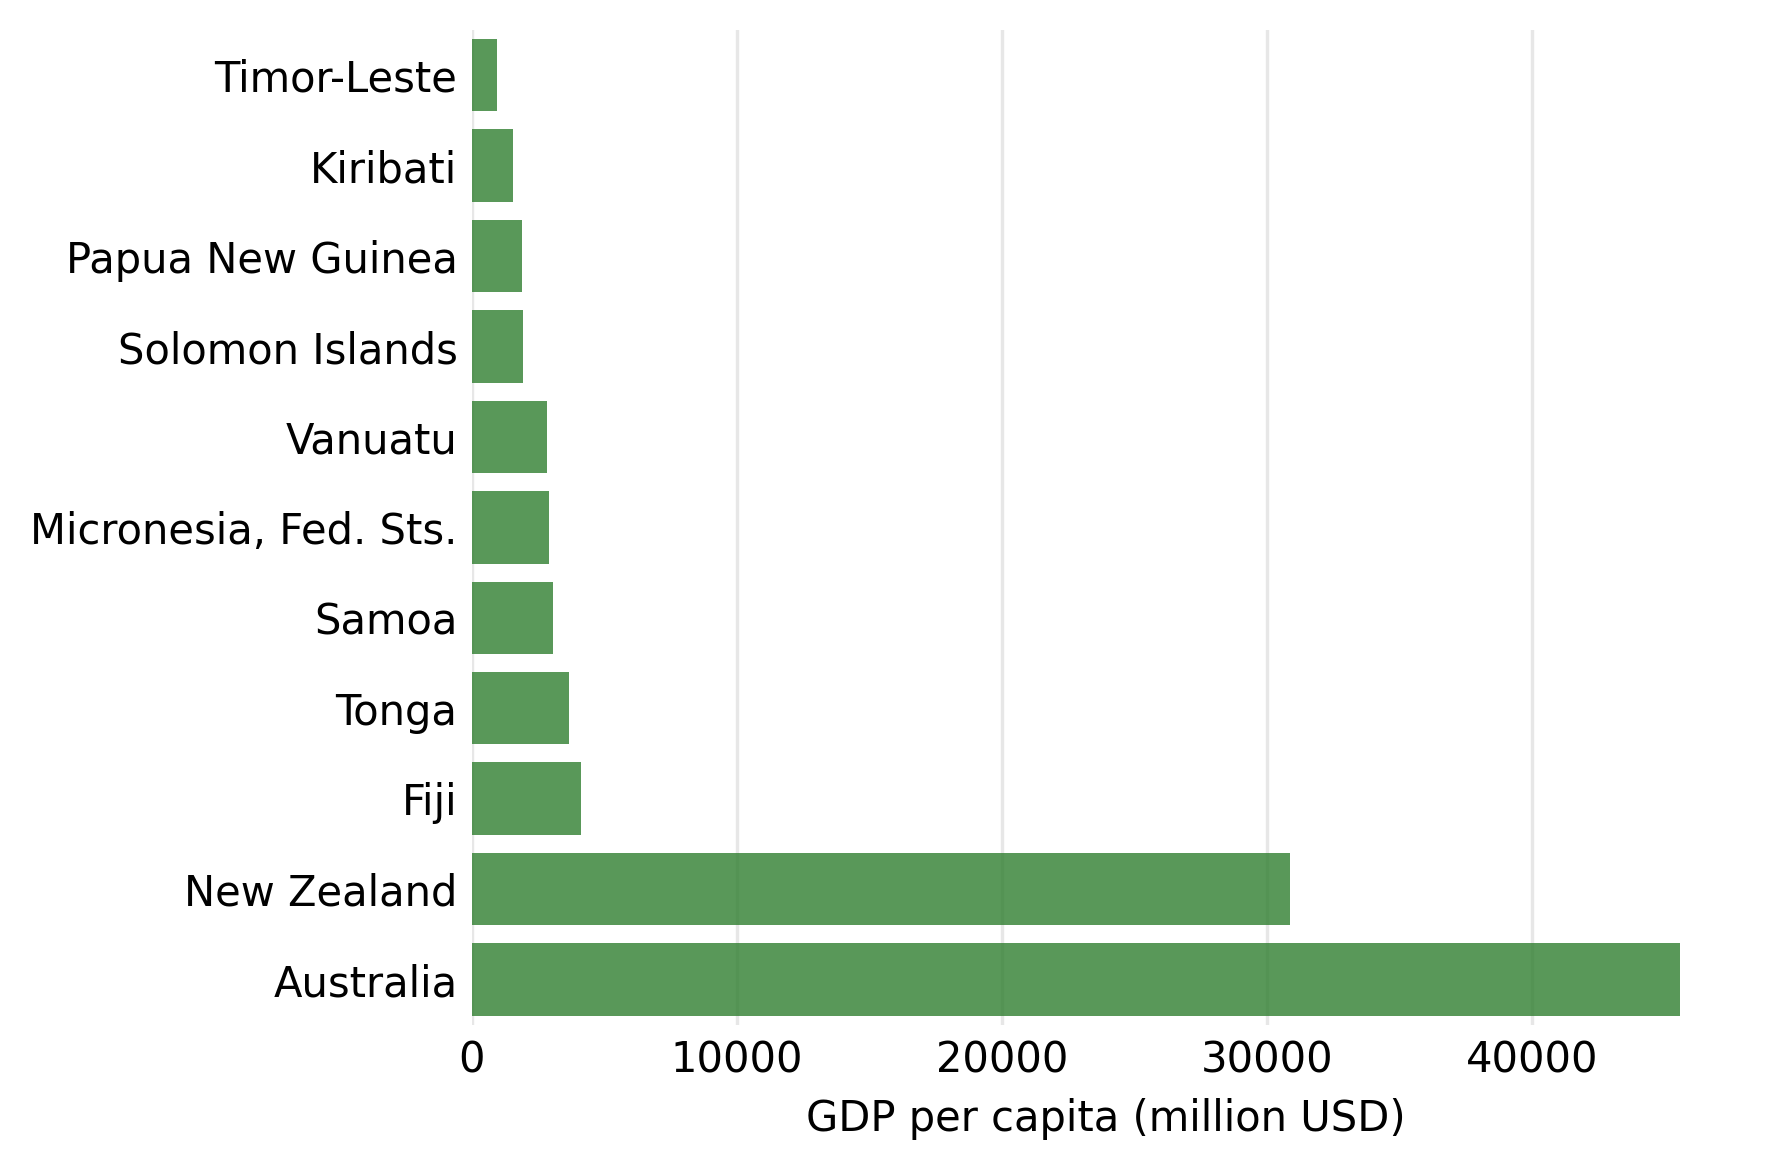

In [14]:
# Set the figure size
plt.figure(figsize=(6, 4))

# Sort the data by GDP_per_capita
oceania_GDP = oceania_GDP.sort_values('GDP_per_capita', ascending=True)  # ascending=True for horizontal bars

# Create horizontal bar plot
sns.barplot(data=oceania_GDP,
           x='GDP_per_capita',
           y='Country',
           color='forestgreen',
           alpha=0.8,
           zorder=2)

# Customize labels
plt.xlabel('GDP per capita (million USD)')
plt.ylabel('')  # Remove y-axis label

# Add grid only for x-axis
plt.grid(True, axis='x', alpha=0.3, zorder=1)

# Remove the box and ticks
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

<img src="https://i.imgur.com/iuBuo9V.png" width=1024 />

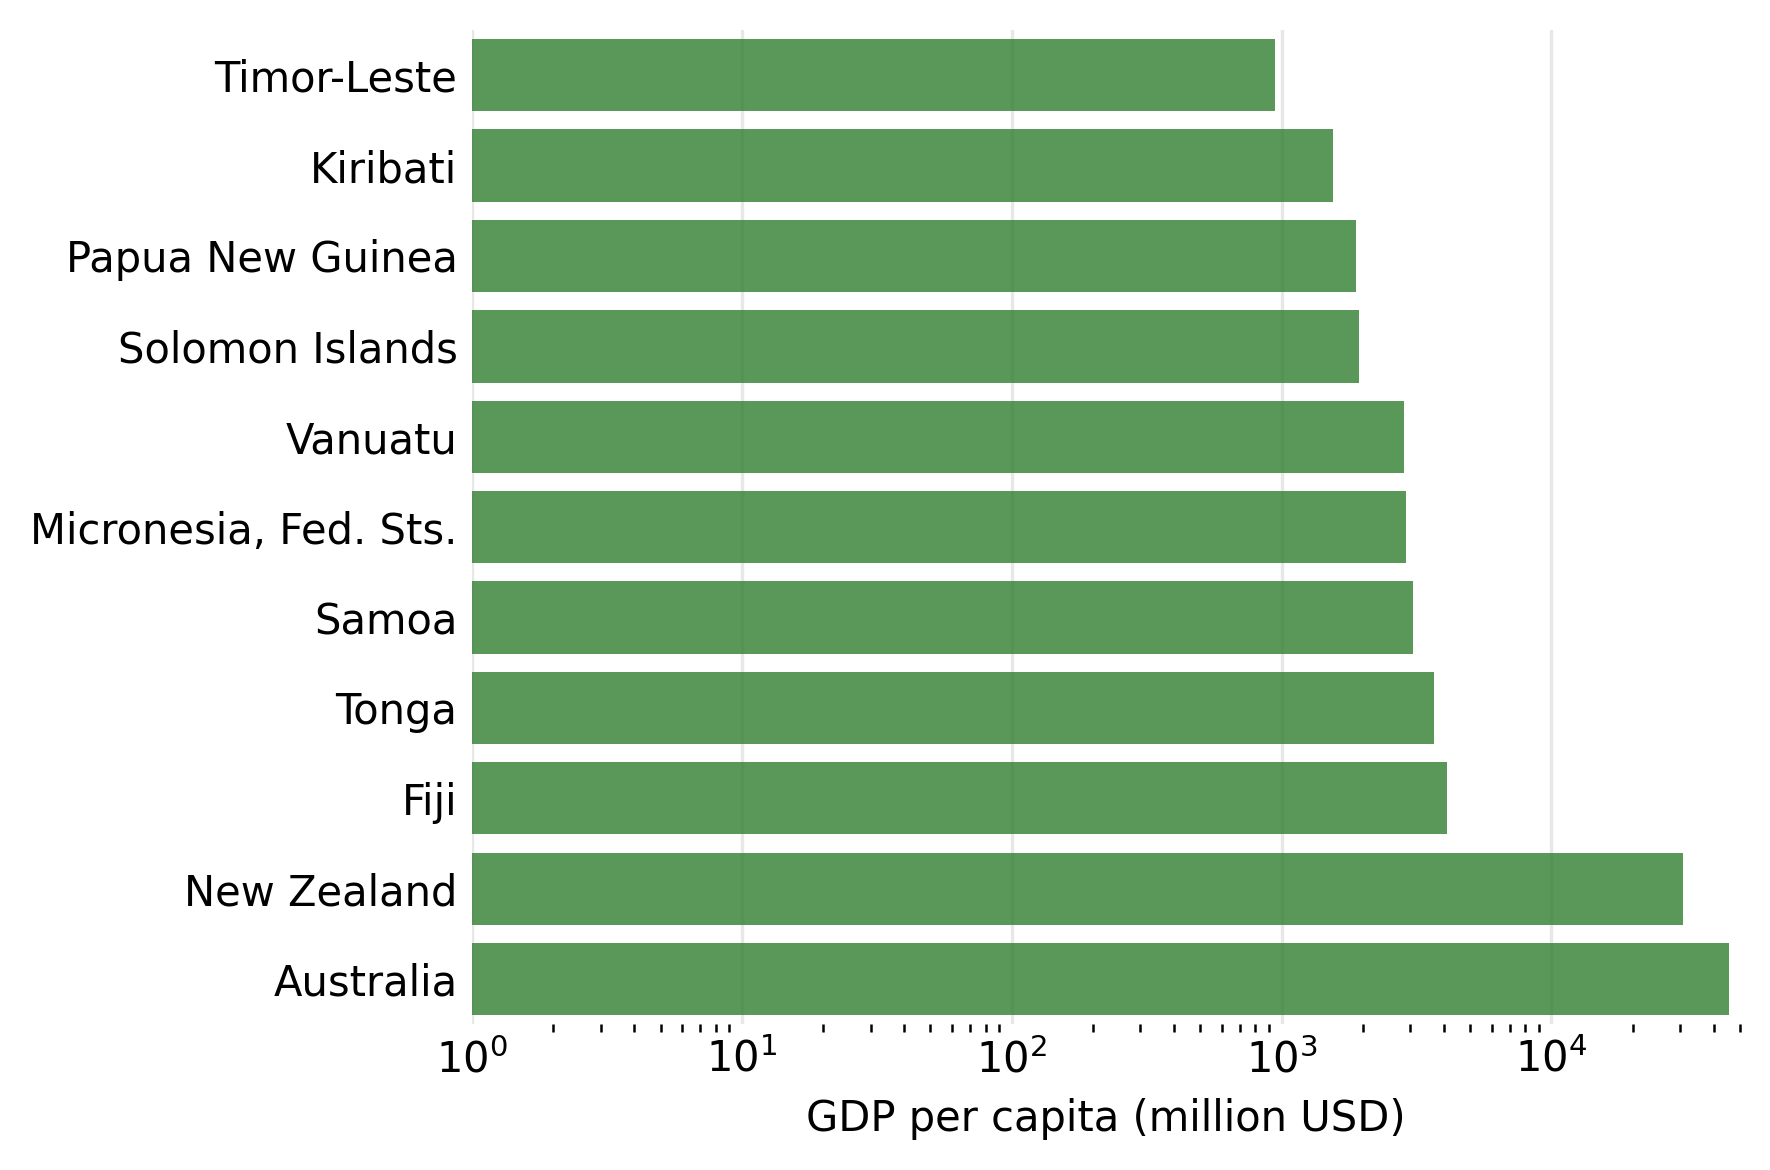

In [15]:
# Set the figure size
plt.figure(figsize=(6, 4))

# Create horizontal bar plot
sns.barplot(data=oceania_GDP,
           x='GDP_per_capita',
           y='Country',
           color='forestgreen',
           alpha=0.8,
           zorder=2)

# Set x-axis to log scale
plt.xscale('log')

# Set the y-axis limits
plt.xlim(1, 50000)

# Customize labels
plt.xlabel('GDP per capita (million USD)')
plt.ylabel('')  # Remove y-axis label

# Add grid only for x-axis
plt.grid(True, axis='x', alpha=0.3, zorder=1)

# Remove the box and ticks
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

<img src="https://i.imgur.com/Xc57FfU.png" width=1024 />

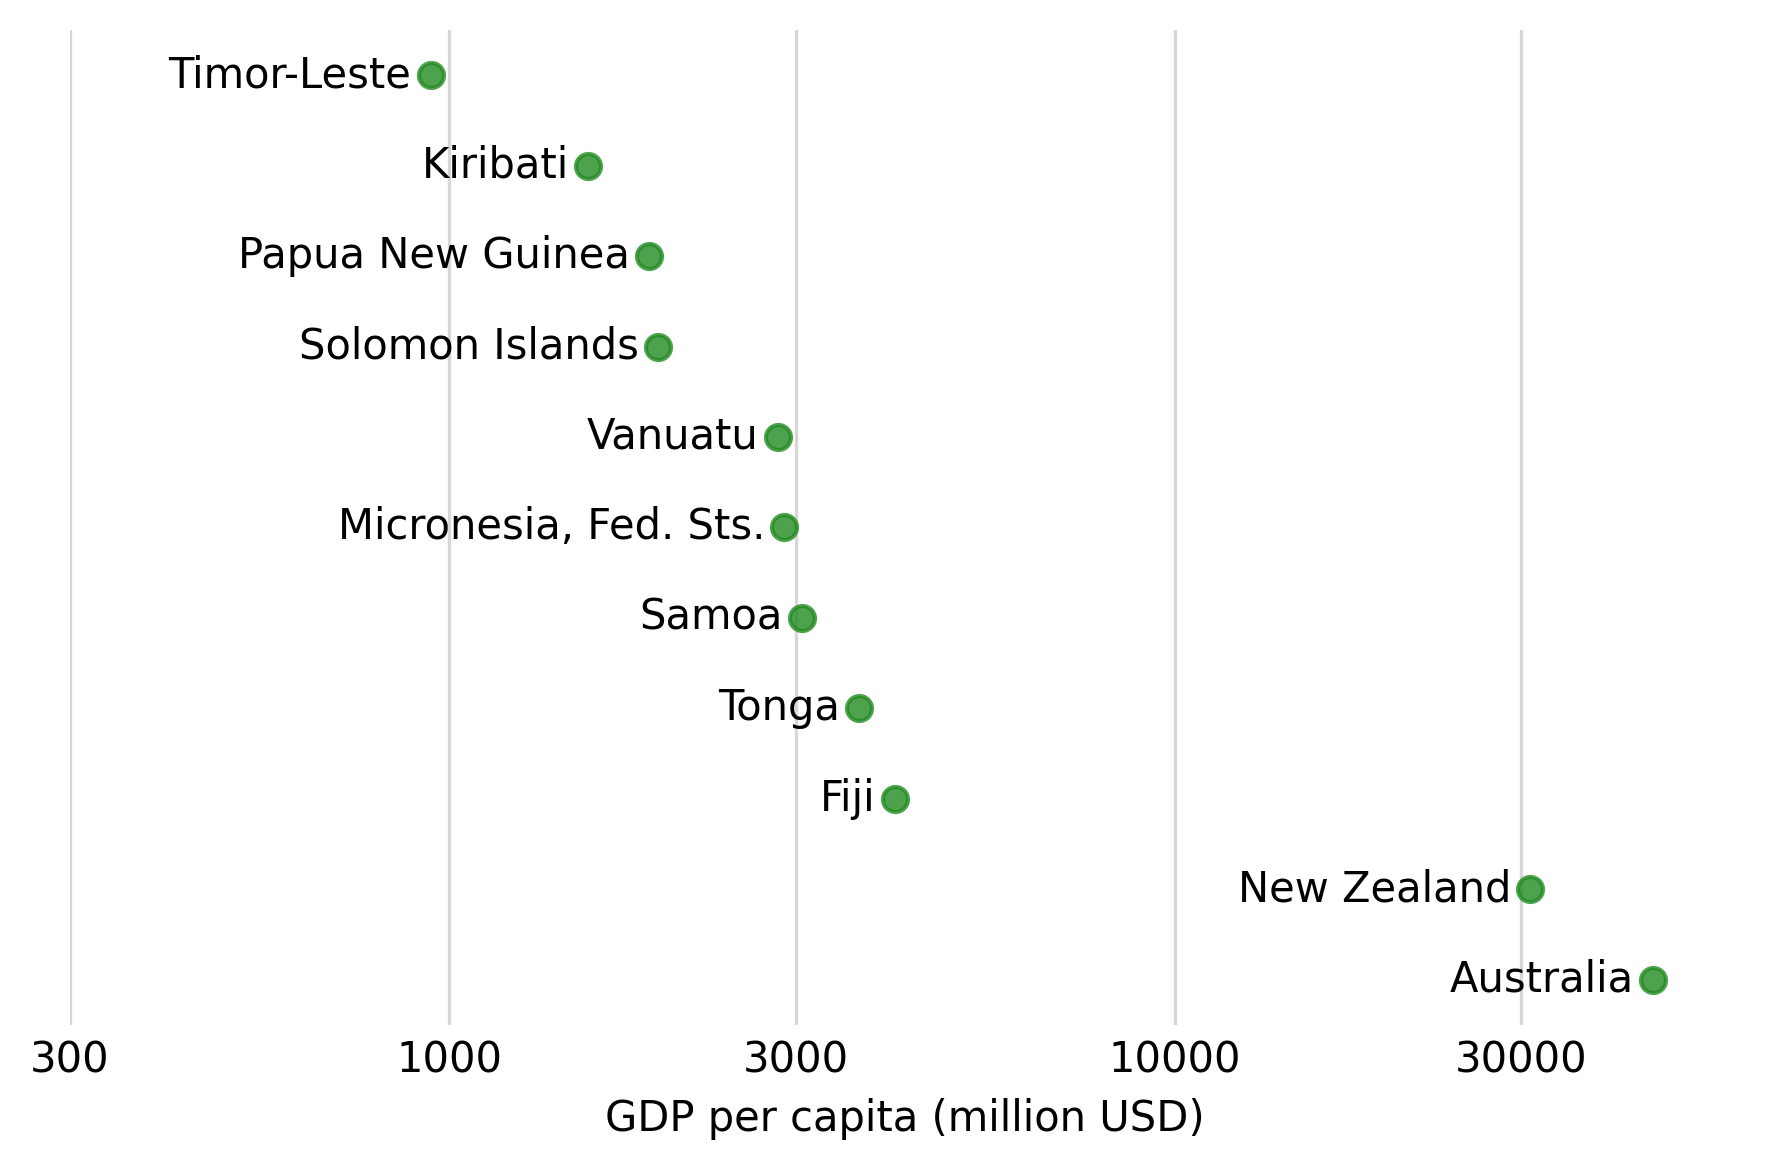

In [16]:
# Set the figure size (halved from original 9, 5.5)
plt.figure(figsize=(6, 4))

# Sort the data by GDP_per_capita
oceania_GDP = oceania_GDP.sort_values('GDP_per_capita', ascending=False)

# Create the scatter plot
plt.scatter(oceania_GDP['GDP_per_capita'],
           oceania_GDP['Country'],
           color='forestgreen',
           alpha=0.8,
           zorder=2)

# Add country labels
for idx, row in oceania_GDP.iterrows():
    plt.text(row['GDP_per_capita'] * 0.94,  # nudge_x equivalent
             row['Country'],
             row['Country'],
             va='center',  # vertical alignment
             ha='right')  # horizontal alignment

# Set x-axis to log scale with limits
plt.xscale('log')
plt.xlim(400, 60000)

# Customize labels and ticks
plt.xlabel('GDP per capita (million USD)')
plt.ylabel('')
plt.yticks([])  # Remove y-axis ticks and labels

# Specify custom tick positions and labels
custom_ticks = [300, 1000, 3000, 10000, 30000]
plt.xticks(custom_ticks, [f'{x:.0f}' for x in custom_ticks])

# Add grid only for x-axis
plt.grid(True, axis='x', alpha=0.5, zorder=1)

# Remove the box and ticks
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(which='both', length=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

## <font color="#B0AD89"><strong>  Practice ᆢ</strong></font>ᆢ
**Issue: In 2010, how different is GDP of Germany compared to the rest of European Union?**

Make a bar plot showing GDP per capita relative to GDP of Germany in log scale. Use `royalblue1` for the fill color.


In [17]:
# Data Preparation
EU_GDP = life_expectancy[
    (life_expectancy['Region'] == 'European Union') &
    (life_expectancy['Year'] == 2010)
][['Country', 'GDP_per_capita']]

# Get Germany's GDP
GDP_Germ = EU_GDP[
    (EU_GDP['Country'] == 'Germany')
]['GDP_per_capita'].iloc[0]  # using iloc[0] to get the scalar value

EU_GDP_diff = (
    EU_GDP
    [['Country', 'GDP_per_capita']]
    .assign(GDP_gain=lambda x: x['GDP_per_capita'] - GDP_Germ)
).sort_values("GDP_gain", ascending=False)

# For a more detailed view of the data
print("\nFirst few rows of the dataset:")
EU_GDP_diff.head()


First few rows of the dataset:


Country  GDP_per_capita  GDP_gain
2185   Luxembourg          106544     68783
2249      Denmark           51173     13412
46         Sweden           48370     10609
452       Ireland           45932      8171
1945  Netherlands           44391      6630

In [18]:
# For basic statistics about the dataset
print("\nBasic statistics:")
EU_GDP_diff.describe()


Basic statistics:


GDP_per_capita      GDP_gain
count       27.000000     27.000000
mean     28827.222222  -8933.777778
std      21026.589014  21026.589014
min       6428.000000 -31333.000000
25%      13137.500000 -24623.500000
50%      21560.000000 -16201.000000
75%      41556.500000   3795.500000
max     106544.000000  68783.000000

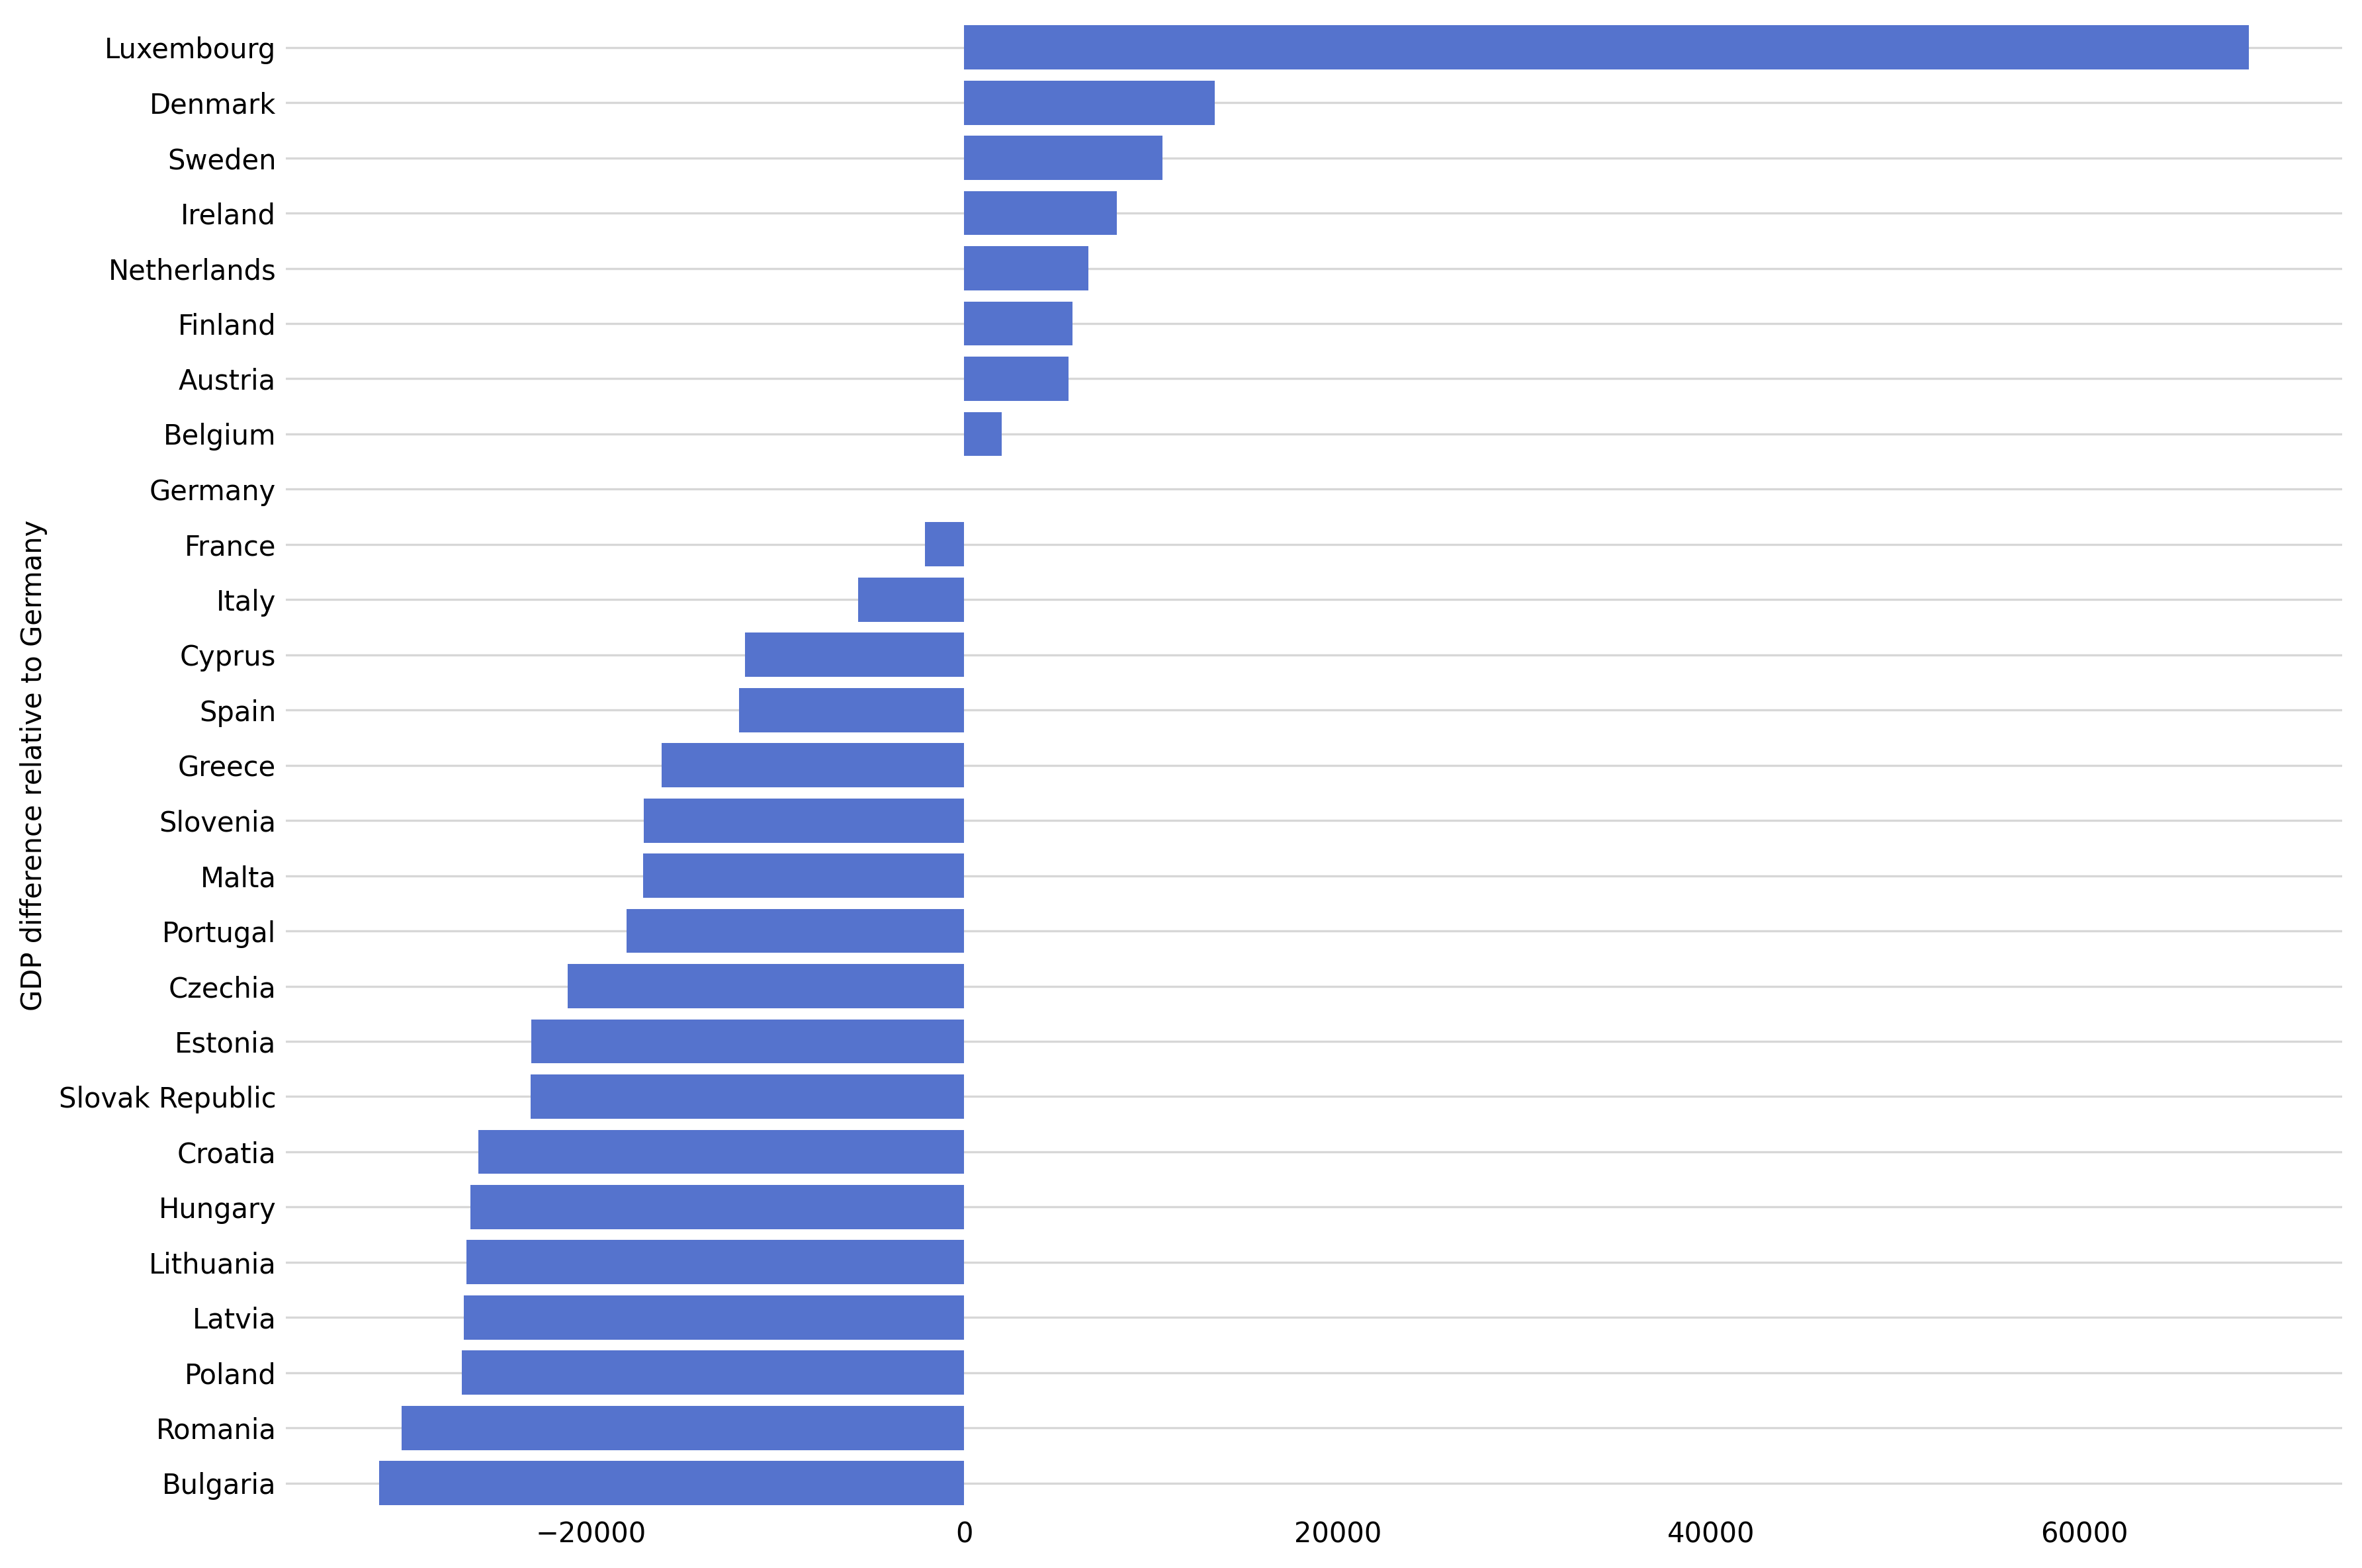

In [19]:
# Set the figure size (halved from original 12, 8)
plt.figure(figsize=(12, 8))

# Create the bar plot
sns.barplot(data=EU_GDP_diff,
           y='Country',
           x='GDP_gain',
           color='royalblue',
           zorder=2)
# plt.xscale("log")

# Customize labels
plt.xlabel('')  # Remove x-axis label
plt.ylabel('GDP difference relative to Germany')

# Add grid only for y-axis
plt.grid(True, axis='y', alpha=0.5, zorder=1)

# Remove the box and ticks
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

## <font color="#B0AD89"><strong>6.2 ⫶ </strong></font>Handling overlapping points

<img src="https://i.imgur.com/hOk9hNs.png" width=1024 />

<img src="https://i.imgur.com/dgE0N3C.png" width=1024 />

### <font color="#B0AD89"><strong>a ⬝ </strong></font>Partial transparency and jittering

<img src="https://i.imgur.com/aKvyO0O.png" width=1024 />

In [20]:
# Data Preparation
schooling_mortality = (
    life_expectancy[
        (life_expectancy['Year'] == 2010) &
        (life_expectancy['Region'].isin(['Asia', 'Africa', 'Middle East']))
    ][['Country', 'Region', 'Schooling', 'Adult_mortality']]
    .assign(Schooling=lambda x: np.round(x['Schooling']))
)

# For a more detailed view of the data
print("\nFirst few rows of the dataset:")
schooling_mortality.head()


First few rows of the dataset:


Country       Region  Schooling  Adult_mortality
50      Brunei Darussalam         Asia        9.0          91.9455
86          Guinea-Bissau       Africa        3.0         287.6200
89                Namibia       Africa        6.0         412.4735
127                Bhutan         Asia        2.0         227.3425
151  United Arab Emirates  Middle East       10.0          74.2960

In [21]:
# For basic statistics about the dataset
print("\nBasic statistics:")
schooling_mortality.describe()


Basic statistics:


Schooling  Adult_mortality
count  92.000000        92.000000
mean    6.141304       229.566712
std     2.873071       117.501303
min     1.000000        58.746000
25%     4.000000       134.874750
50%     6.000000       222.186000
75%     8.000000       289.732750
max    13.000000       548.496500

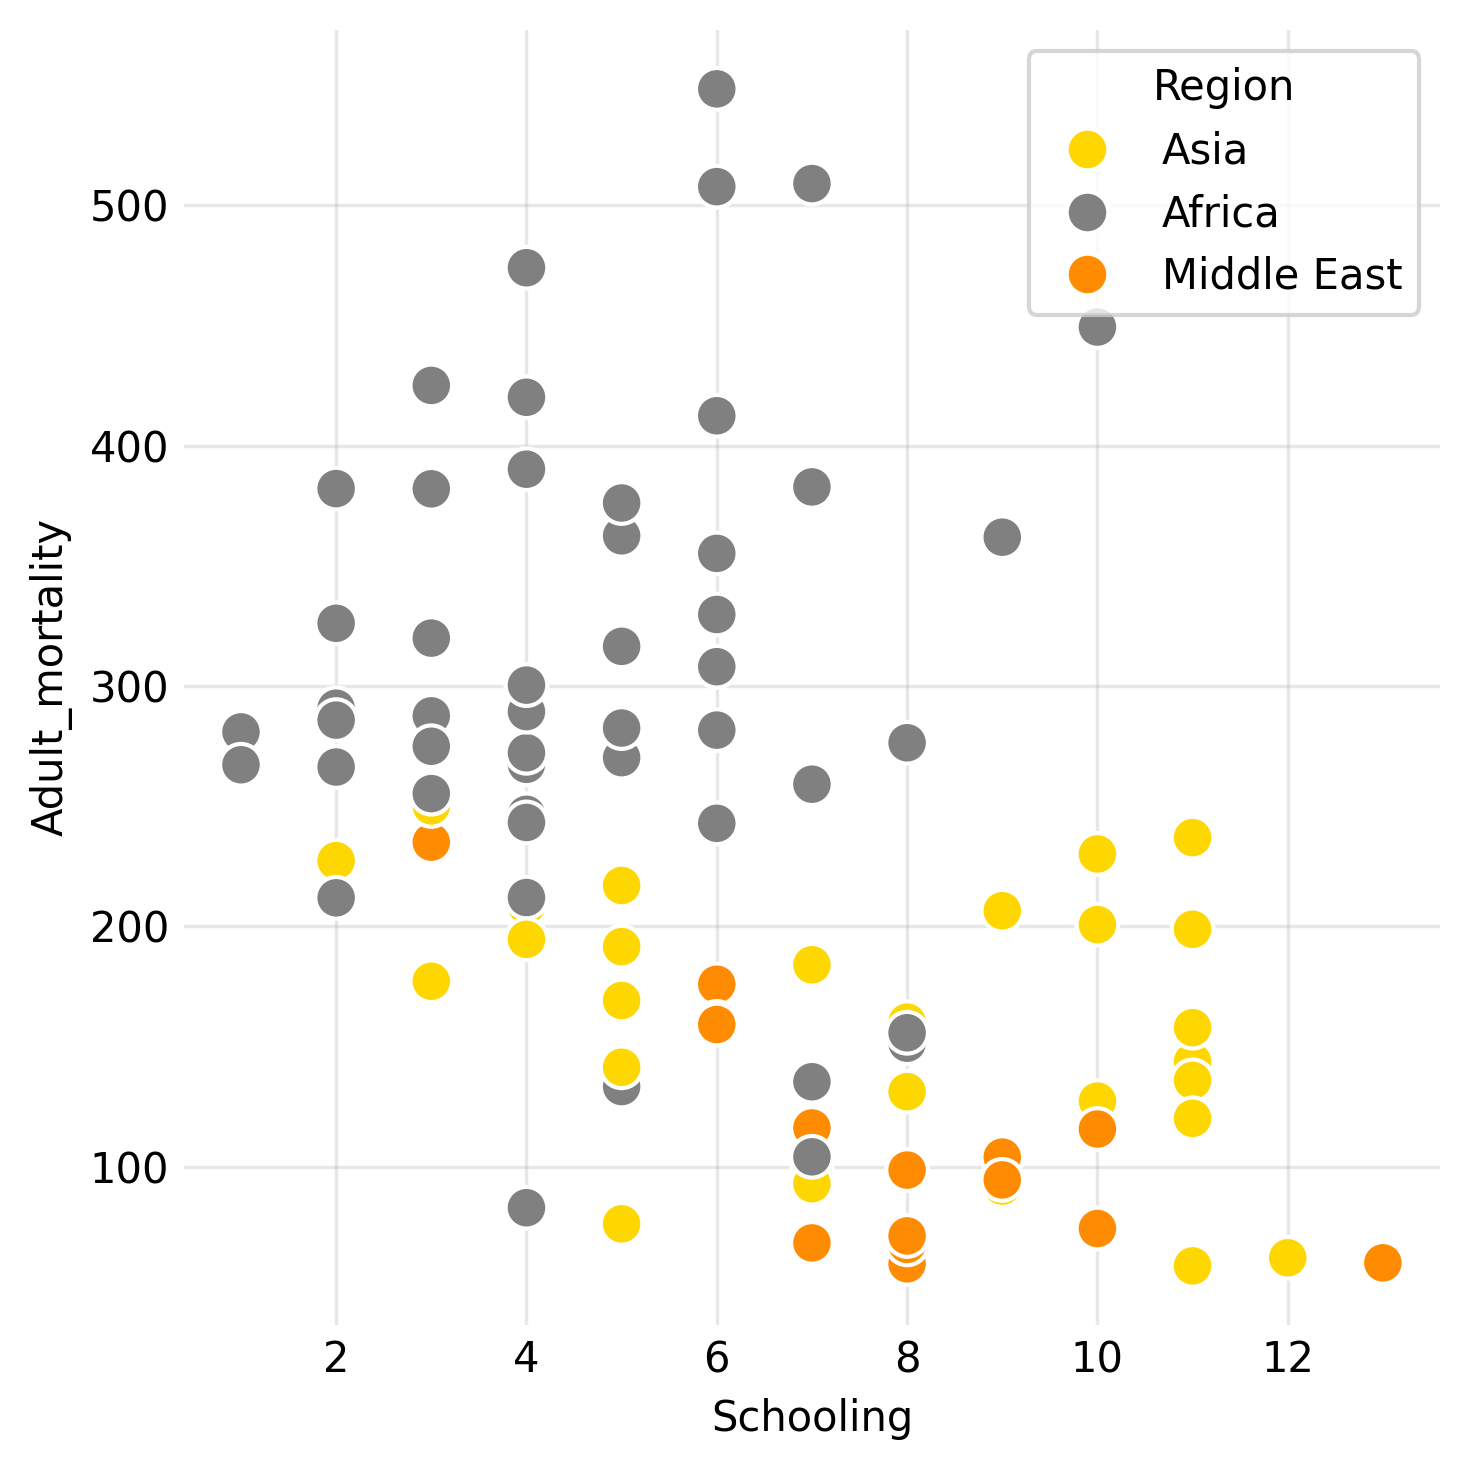

In [22]:
# Set the figure size
plt.figure(figsize=(5, 5))

# Create scatter plot with seaborn
sns.scatterplot(data=schooling_mortality,
               x='Schooling',
               y='Adult_mortality',
               hue='Region',
               palette={'Africa': 'grey',
                       'Asia': 'gold',
                       'Middle East': 'darkorange'},
               s=100,
               edgecolor='white',
               linewidth=1,
               zorder=2)

# Add grid
plt.grid(True, alpha=0.3, zorder=1)

# Remove the box and ticks
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/vC1yQNH.png" width=1024 />

<img src="https://i.imgur.com/KYbA7ye.png" width=1024 />

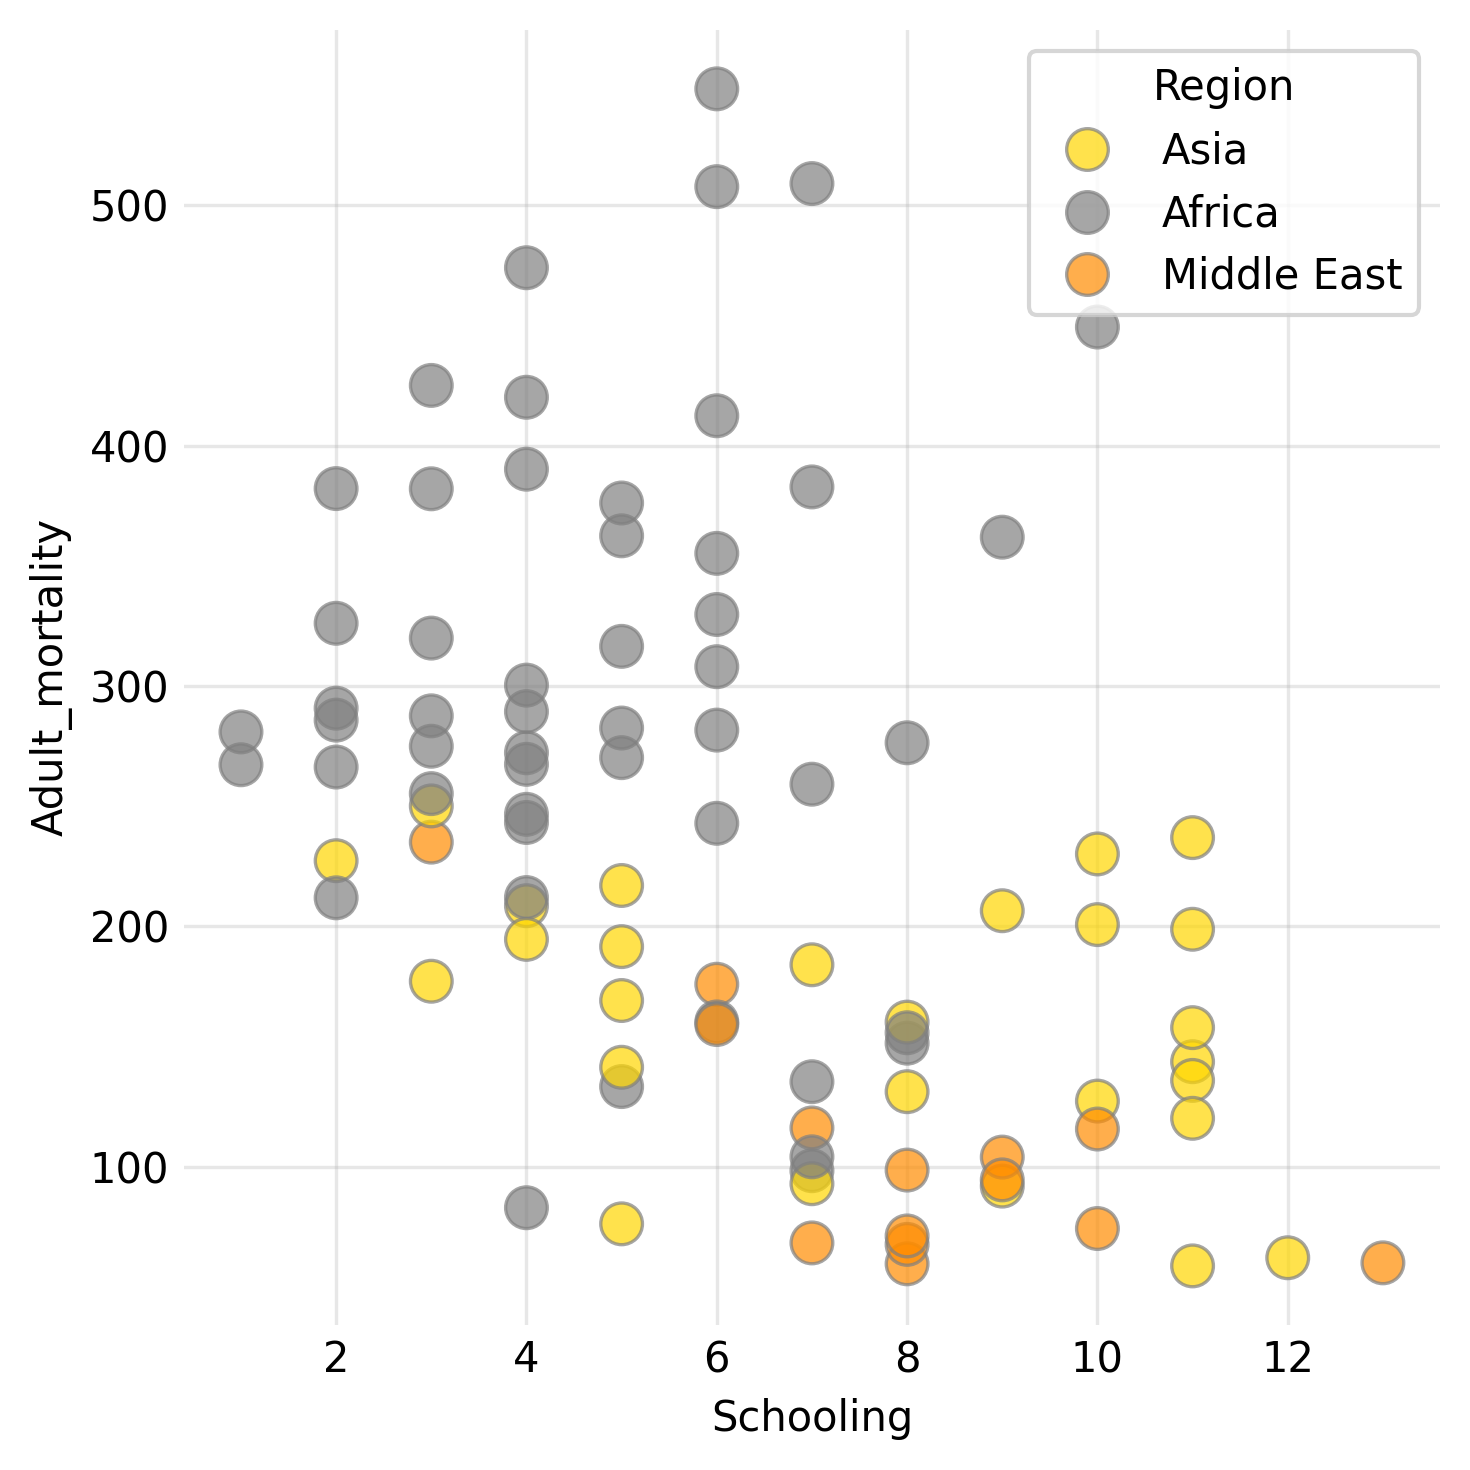

In [23]:
plt.figure(figsize=(5, 5))

sns.scatterplot(data=schooling_mortality,
               x='Schooling',
               y='Adult_mortality',
               hue='Region',
               palette={'Africa': 'grey',
                       'Asia': 'gold',
                       'Middle East': 'darkorange'},
               s=100,
               alpha=0.7,
               edgecolor='gray',
               zorder=2)

plt.grid(True, alpha=0.3, zorder=1)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/YjoxDxI.png" width=1024 />

<img src="https://i.imgur.com/ReeGsl2.png" width=1024 />

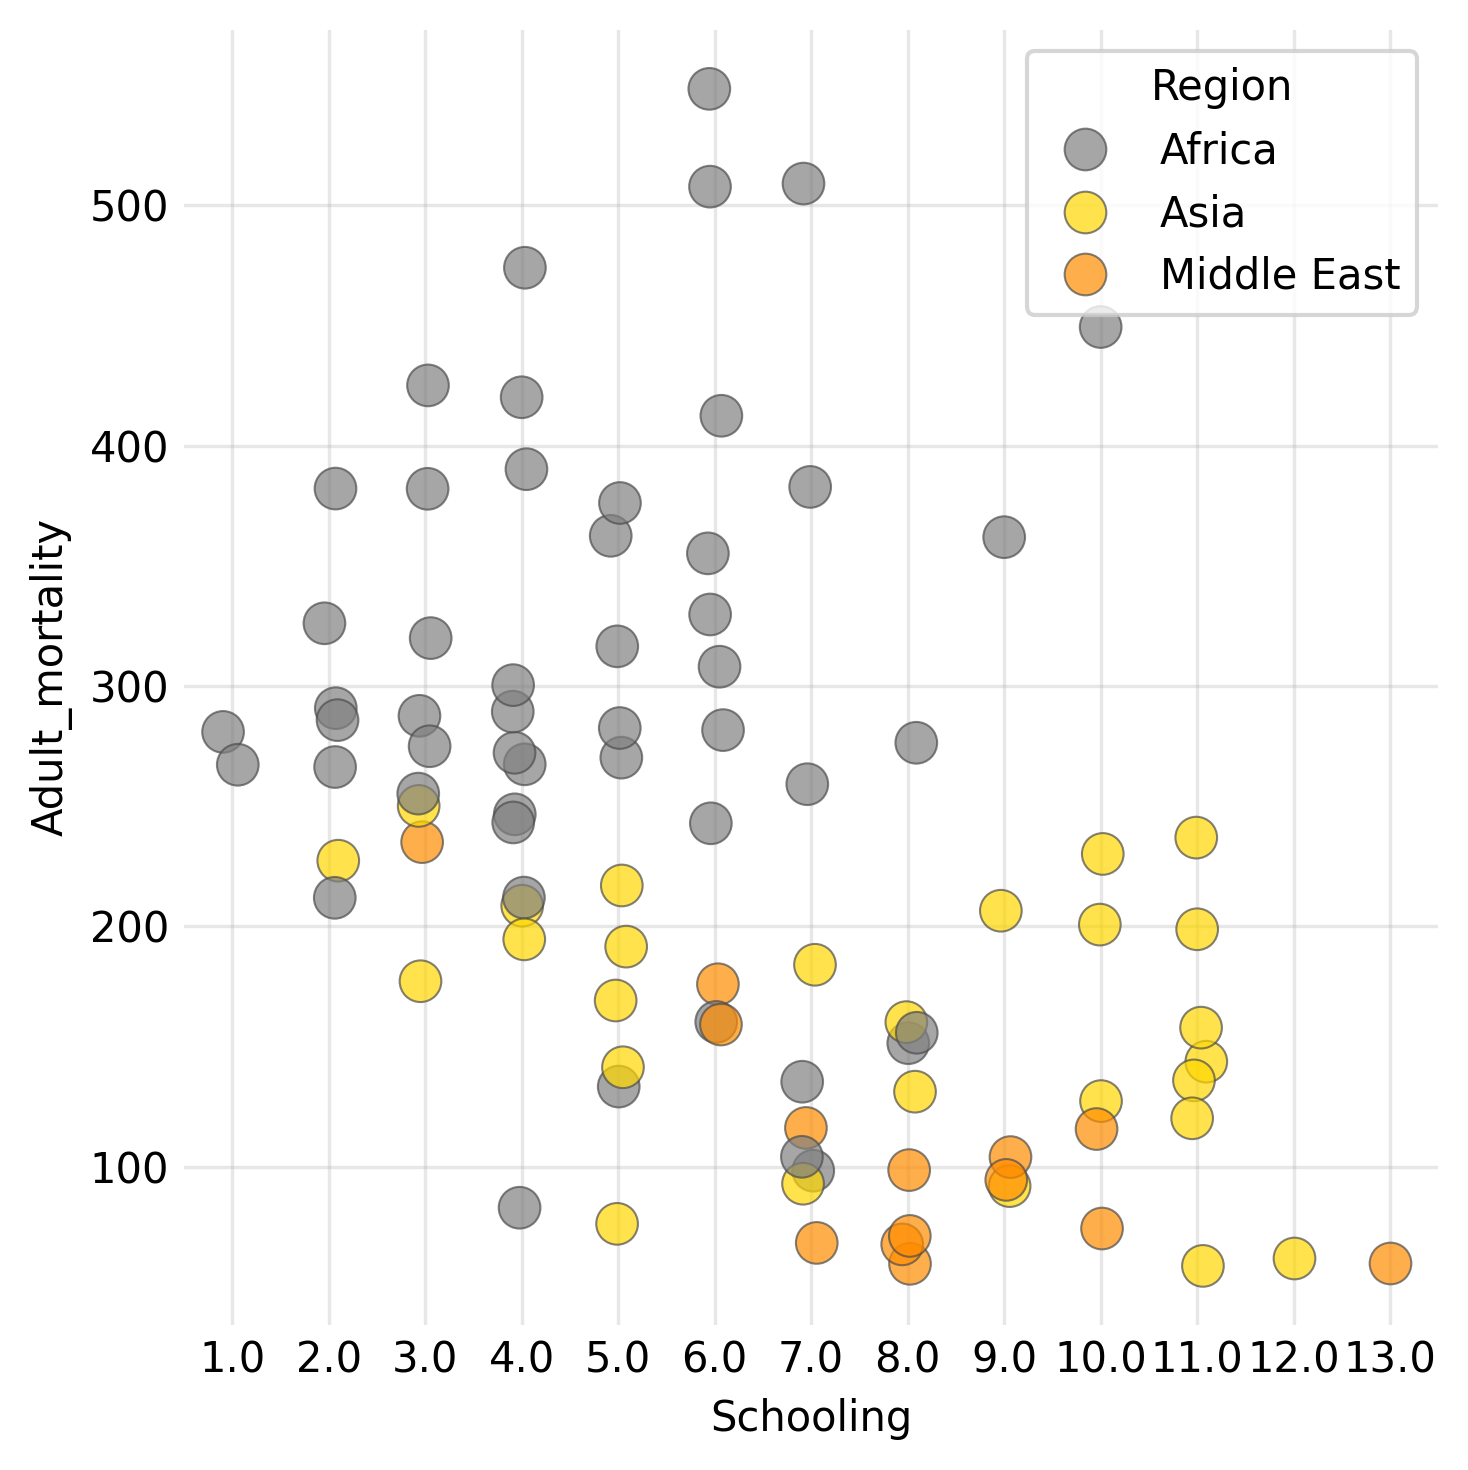

In [24]:
plt.figure(figsize=(5, 5))

sns.stripplot(data=schooling_mortality,
               x='Schooling',
               y='Adult_mortality',
               hue='Region',
               palette={'Africa': 'grey',
                       'Asia': 'gold',
                       'Middle East': 'darkorange'},
               s=10,
               alpha=0.7,
               jitter=True,
               linewidth=0.5,
               zorder=2)

plt.grid(True, alpha=0.3, zorder=1)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/4bjAFHV.png" width=1024 />

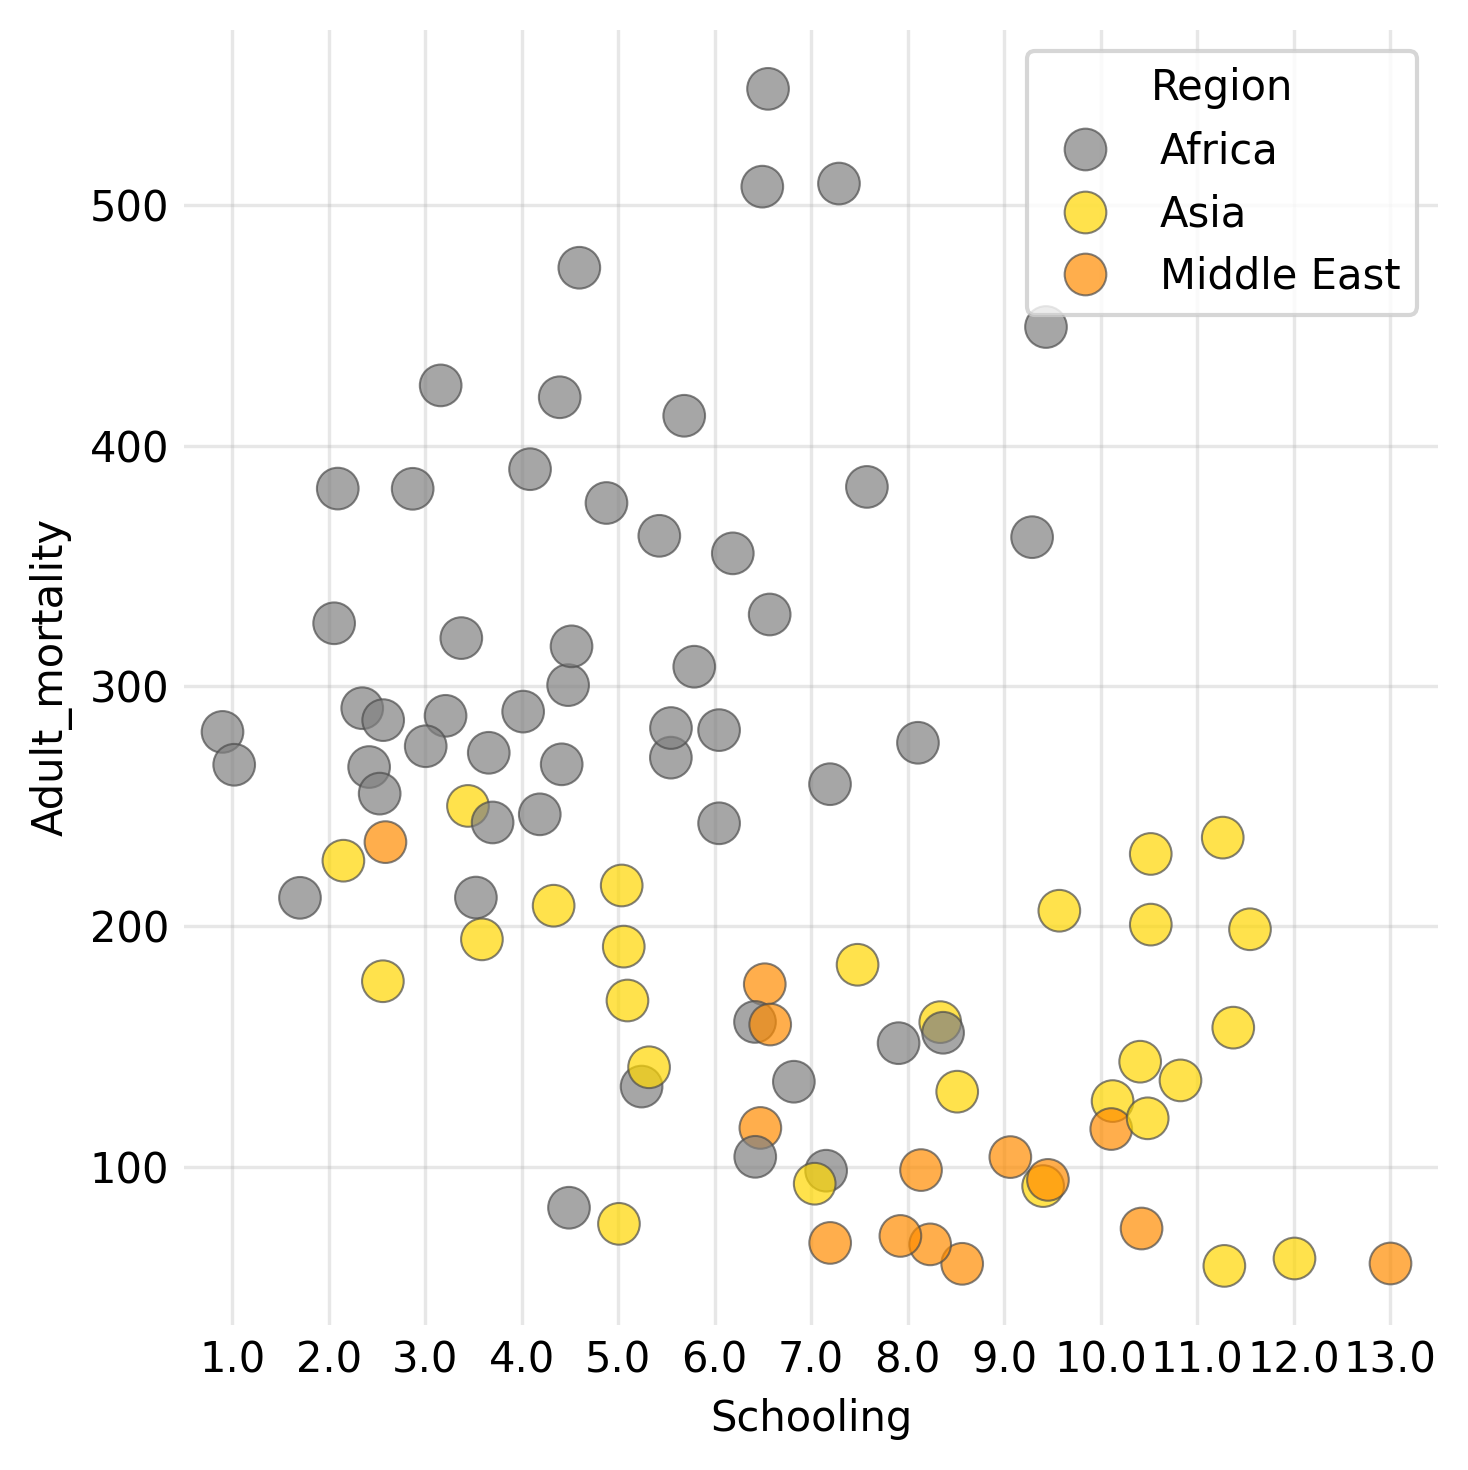

In [25]:
plt.figure(figsize=(5, 5))

sns.stripplot(data=schooling_mortality,
               x='Schooling',
               y='Adult_mortality',
               hue='Region',
               palette={'Africa': 'grey',
                       'Asia': 'gold',
                       'Middle East': 'darkorange'},
               s=10,
               alpha=0.7,
               jitter=0.6,
               linewidth=0.5,
               zorder=2)

plt.grid(True, alpha=0.3, zorder=1)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.tight_layout()
plt.show()

### <font color="#B0AD89"><strong>b ⬝ </strong></font>2D histograms


<img src="https://i.imgur.com/w0Duiik.png" width=1024 />

In [26]:
# Data Preparation
schooling_mortality_world = (
   life_expectancy[life_expectancy['Year'] == 2010]
   [['Country', 'Region', 'Schooling', 'Adult_mortality']]
)

print("\nShape:", schooling_mortality_world.shape)

schooling_mortality_world.head()


Shape: (179, 4)


Country                         Region  Schooling  \
31        Switzerland                 Rest of Europe       13.3   
35            Germany                 European Union       13.8   
45             Belize  Central America and Caribbean       10.5   
46             Sweden                 European Union       12.3   
50  Brunei Darussalam                           Asia        8.8   

    Adult_mortality  
31          56.9105  
35          77.6040  
45         181.5840  
46          57.4920  
50          91.9455

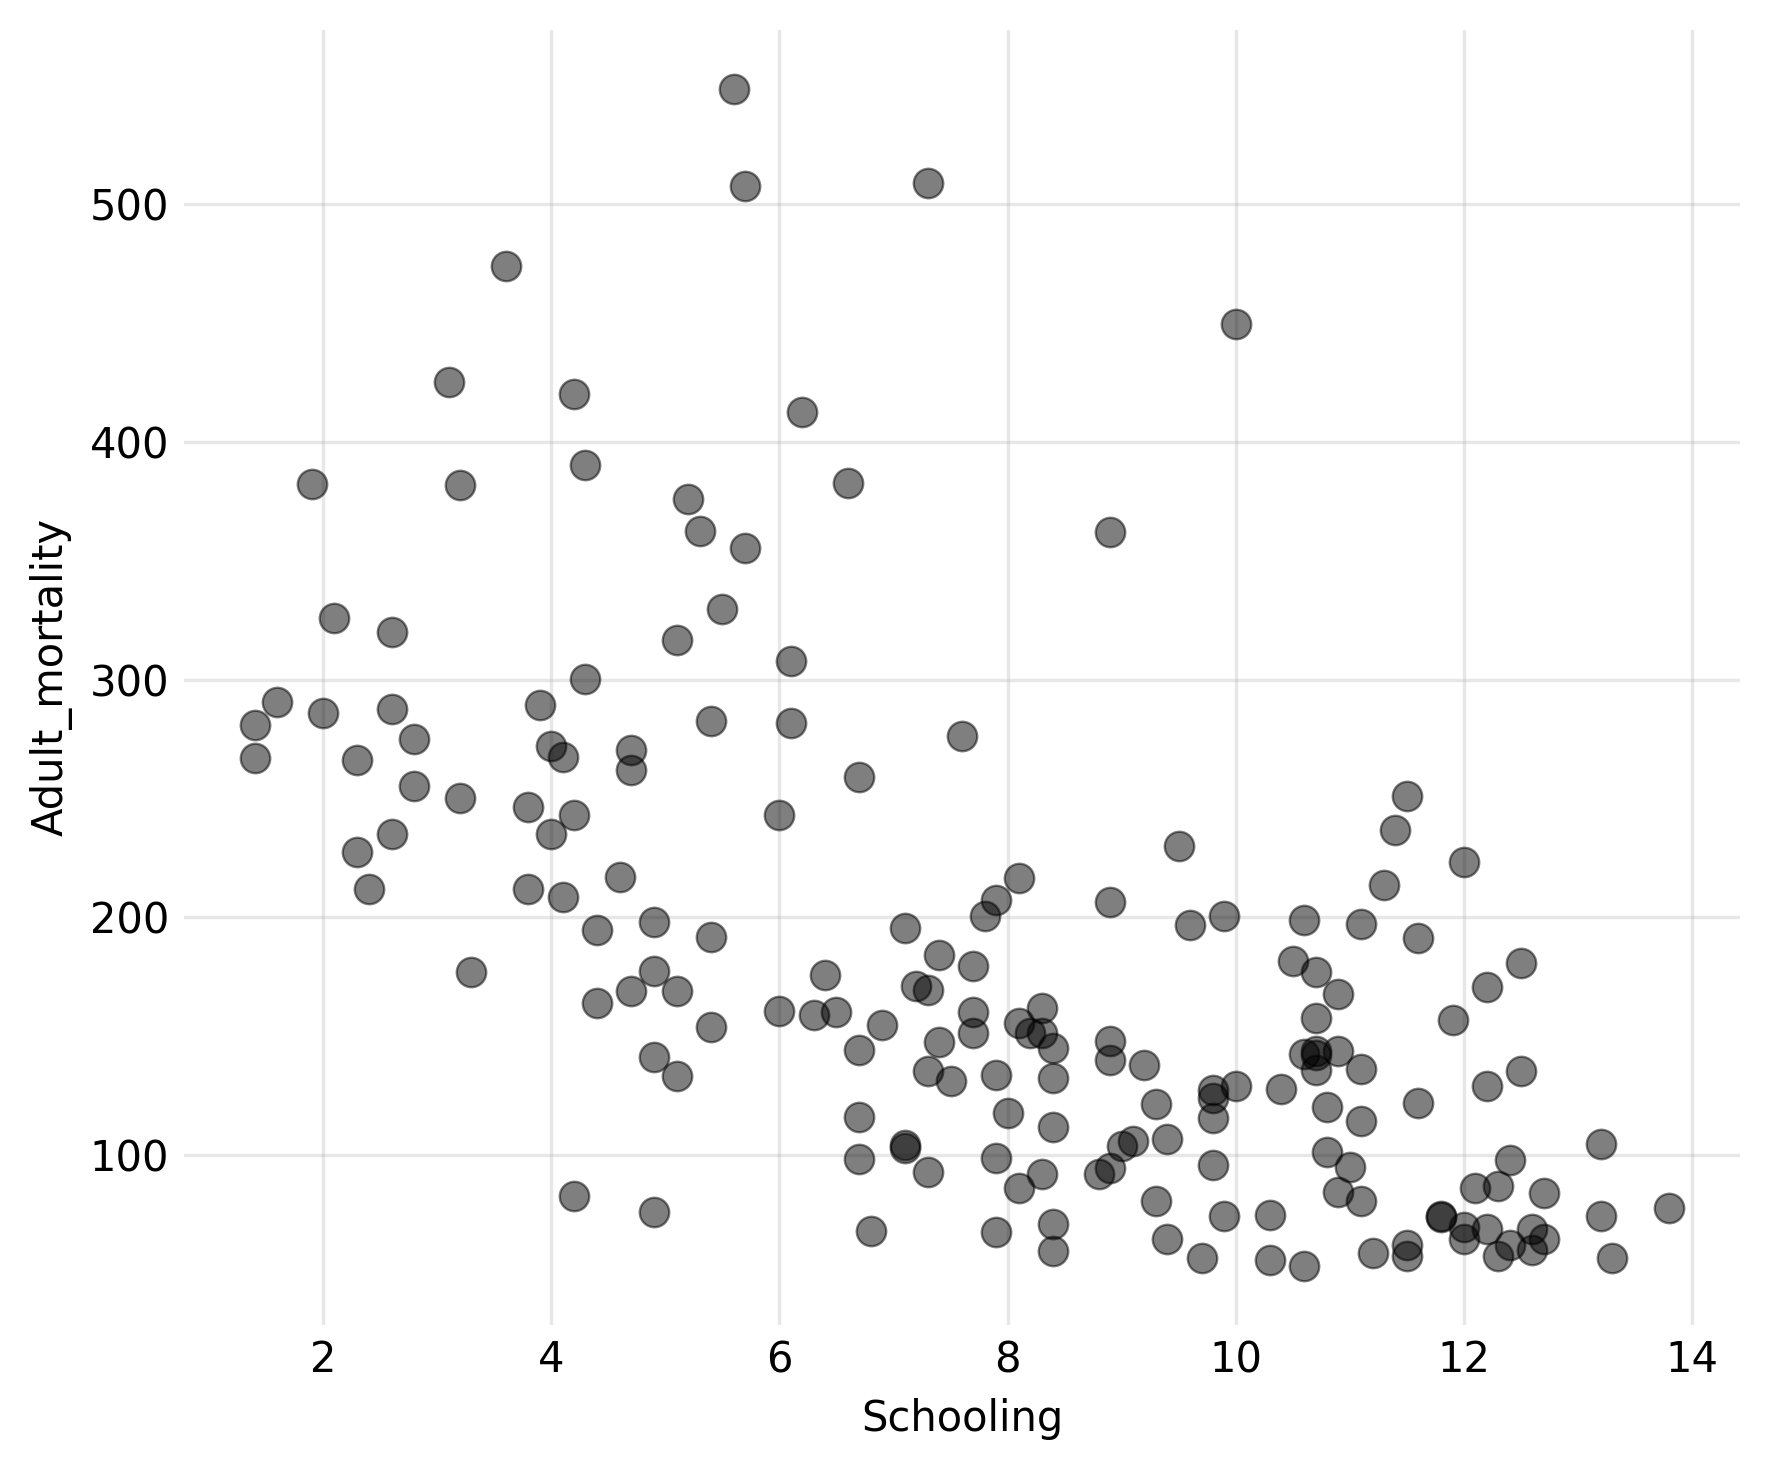

In [27]:
plt.figure(figsize=(6, 5))

sns.scatterplot(data=schooling_mortality_world,
               x='Schooling',
               y='Adult_mortality',
               color='black',
               s=50,
               alpha=0.5,
               edgecolor='black',
               zorder=2)

plt.grid(True, alpha=0.3, zorder=1)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/TpKGeE8.png" width=1024 />

<img src="https://i.imgur.com/w2EGWIF.png" width=1024 />

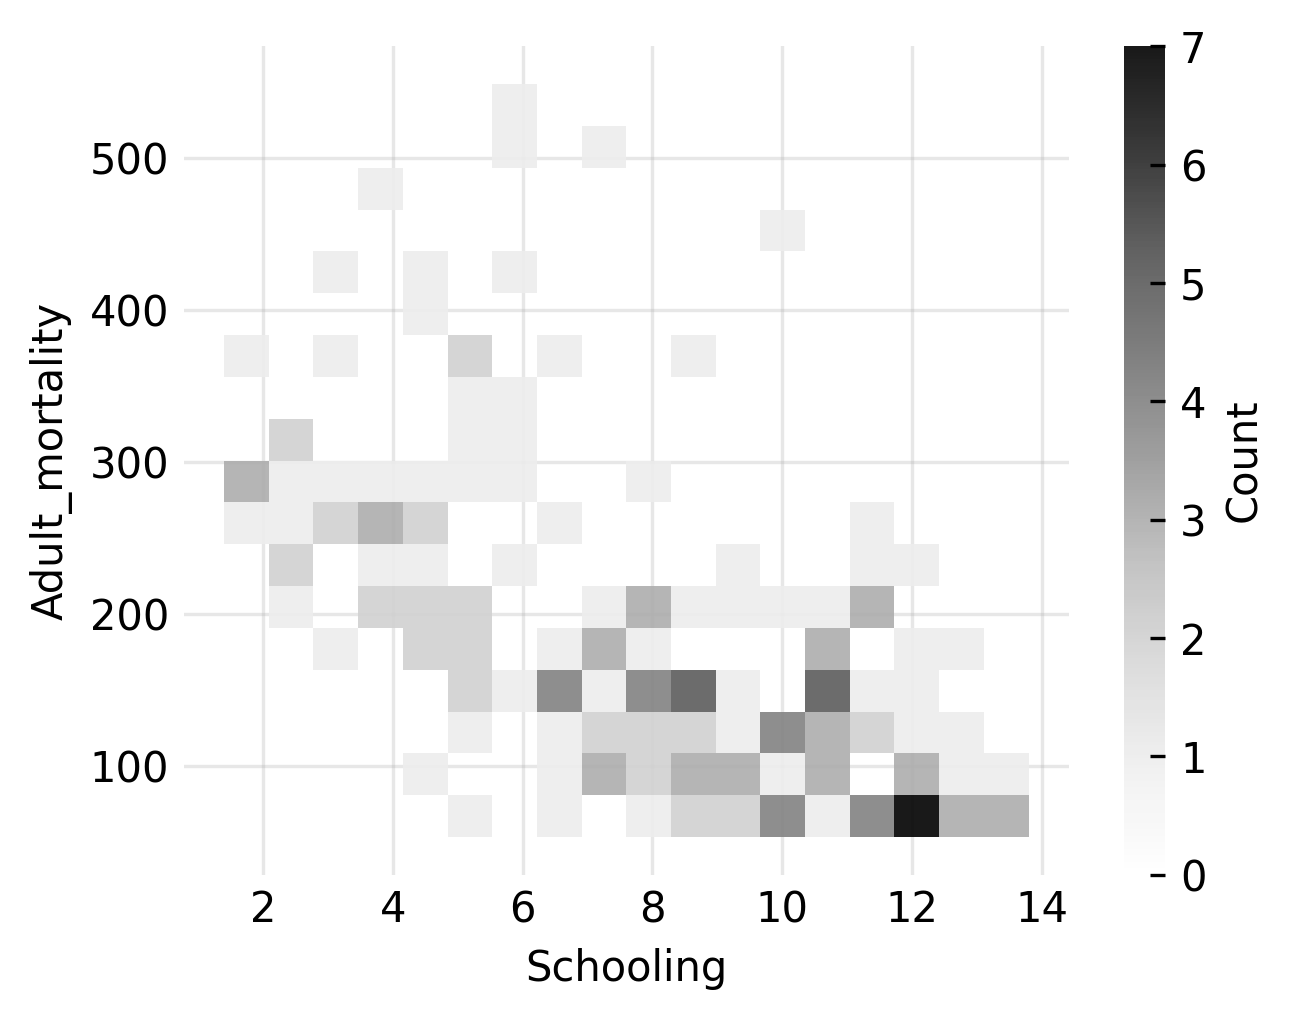

In [28]:
plt.figure(figsize=(4.5, 3.5))

# Create 2D histogram plot
hist = sns.histplot(data=schooling_mortality_world,
                    x='Schooling',
                    y='Adult_mortality',
                    bins=18,
                    cmap='Greys',
                    alpha=0.9,
                    cbar_kws={'label': 'Count'},
                    zorder=2)

# Add colorbar
cbar = plt.colorbar(hist.collections[0], label='Count')

# Remove the black outline from the colorbar
cbar.outline.set_visible(False)
cbar.ax.tick_params(direction='in')

plt.grid(True, alpha=0.3, zorder=1)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/QgT6H6q.png" width=1024 />

<img src="https://i.imgur.com/g747kIg.png" width=1024 />

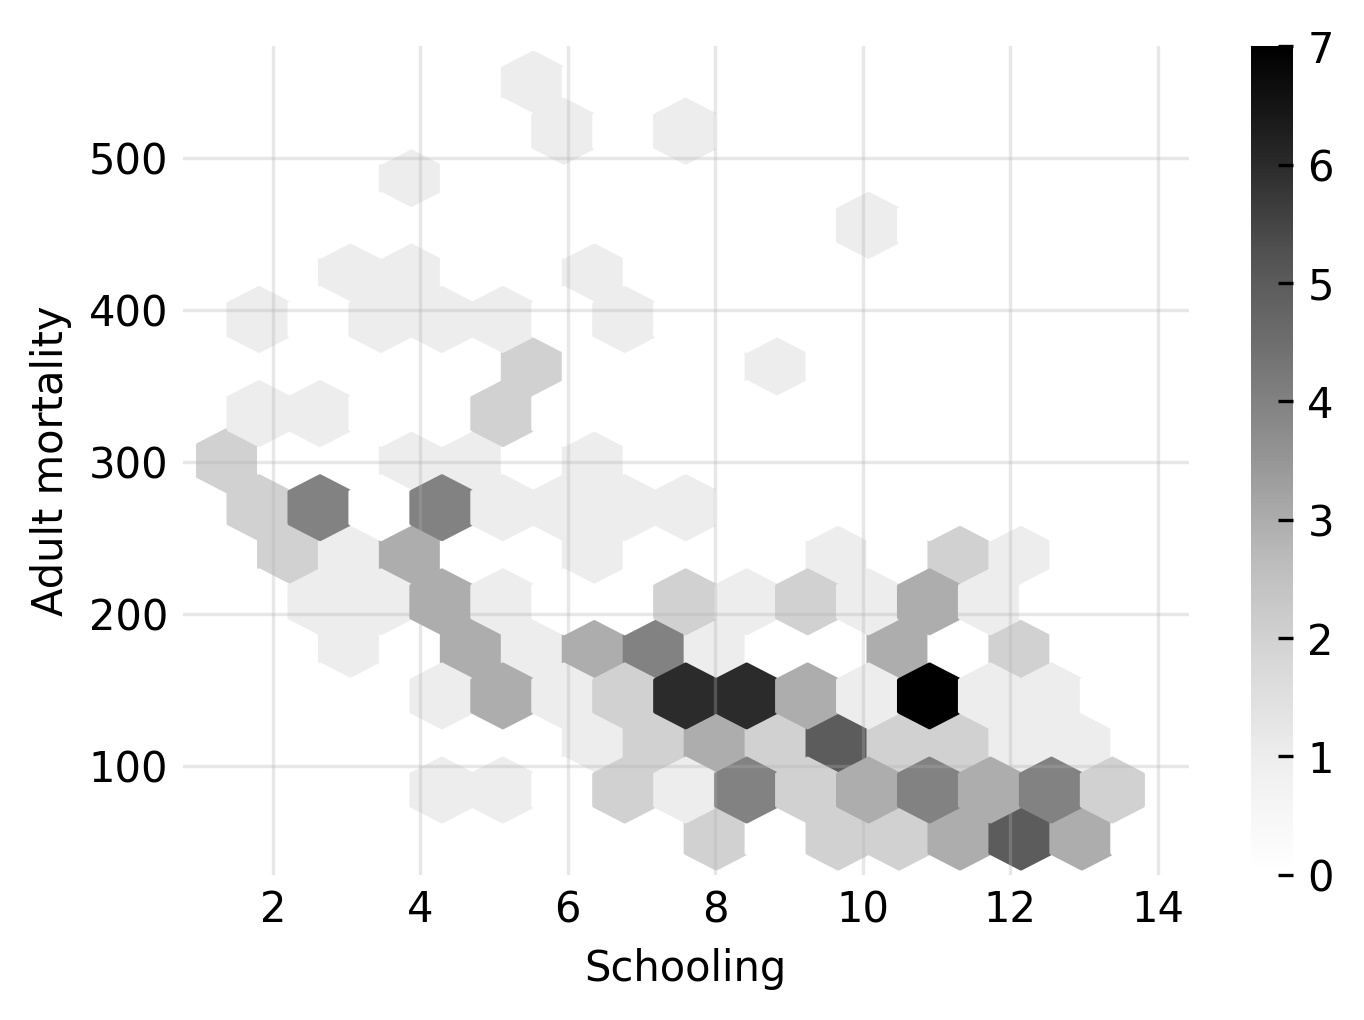

In [29]:
plt.figure(figsize=(5, 3.5))

plt.hexbin(schooling_mortality_world['Schooling'],
         schooling_mortality_world['Adult_mortality'],
         gridsize=15,
         cmap='Greys')

# Add colorbar
cbar = plt.colorbar()

# Remove the black outline from the colorbar
cbar.outline.set_visible(False)
cbar.ax.tick_params(direction='in')

plt.grid(True, alpha=0.3, zorder=1)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.xlabel('Schooling')
plt.ylabel('Adult mortality')
plt.tight_layout()
plt.show()

### <font color="#B0AD89"><strong>c ⬝ </strong></font>Contour lines

<img src="https://i.imgur.com/uGFjGmN.png" width=1024 />

<img src="https://i.imgur.com/nBS4sEe.png" width=1024 />


In [30]:
schooling_mortality = (
   life_expectancy[
       (life_expectancy['Year'] == 2010) &
       (life_expectancy['Region'].isin(['Asia', 'Africa', 'Middle East']))
   ][['Country', 'Region', 'Schooling', 'Adult_mortality']]
)

print("\nShape:", schooling_mortality.shape)
schooling_mortality


Shape: (92, 4)


Country       Region  Schooling  Adult_mortality
50           Brunei Darussalam         Asia        8.8          91.9455
86               Guinea-Bissau       Africa        2.6         287.6200
89                     Namibia       Africa        6.2         412.4735
127                     Bhutan         Asia        2.3         227.3425
151       United Arab Emirates  Middle East        9.9          74.2960
...                        ...          ...        ...              ...
2801                  Zimbabwe       Africa        7.3         509.0880
2805                      Togo       Africa        4.3         300.3970
2813          Congo, Dem. Rep.       Africa        5.4         282.5420
2835                     Gabon       Africa        7.6         276.4095
2841  Central African Republic       Africa        3.6         474.0650

[92 rows x 4 columns]

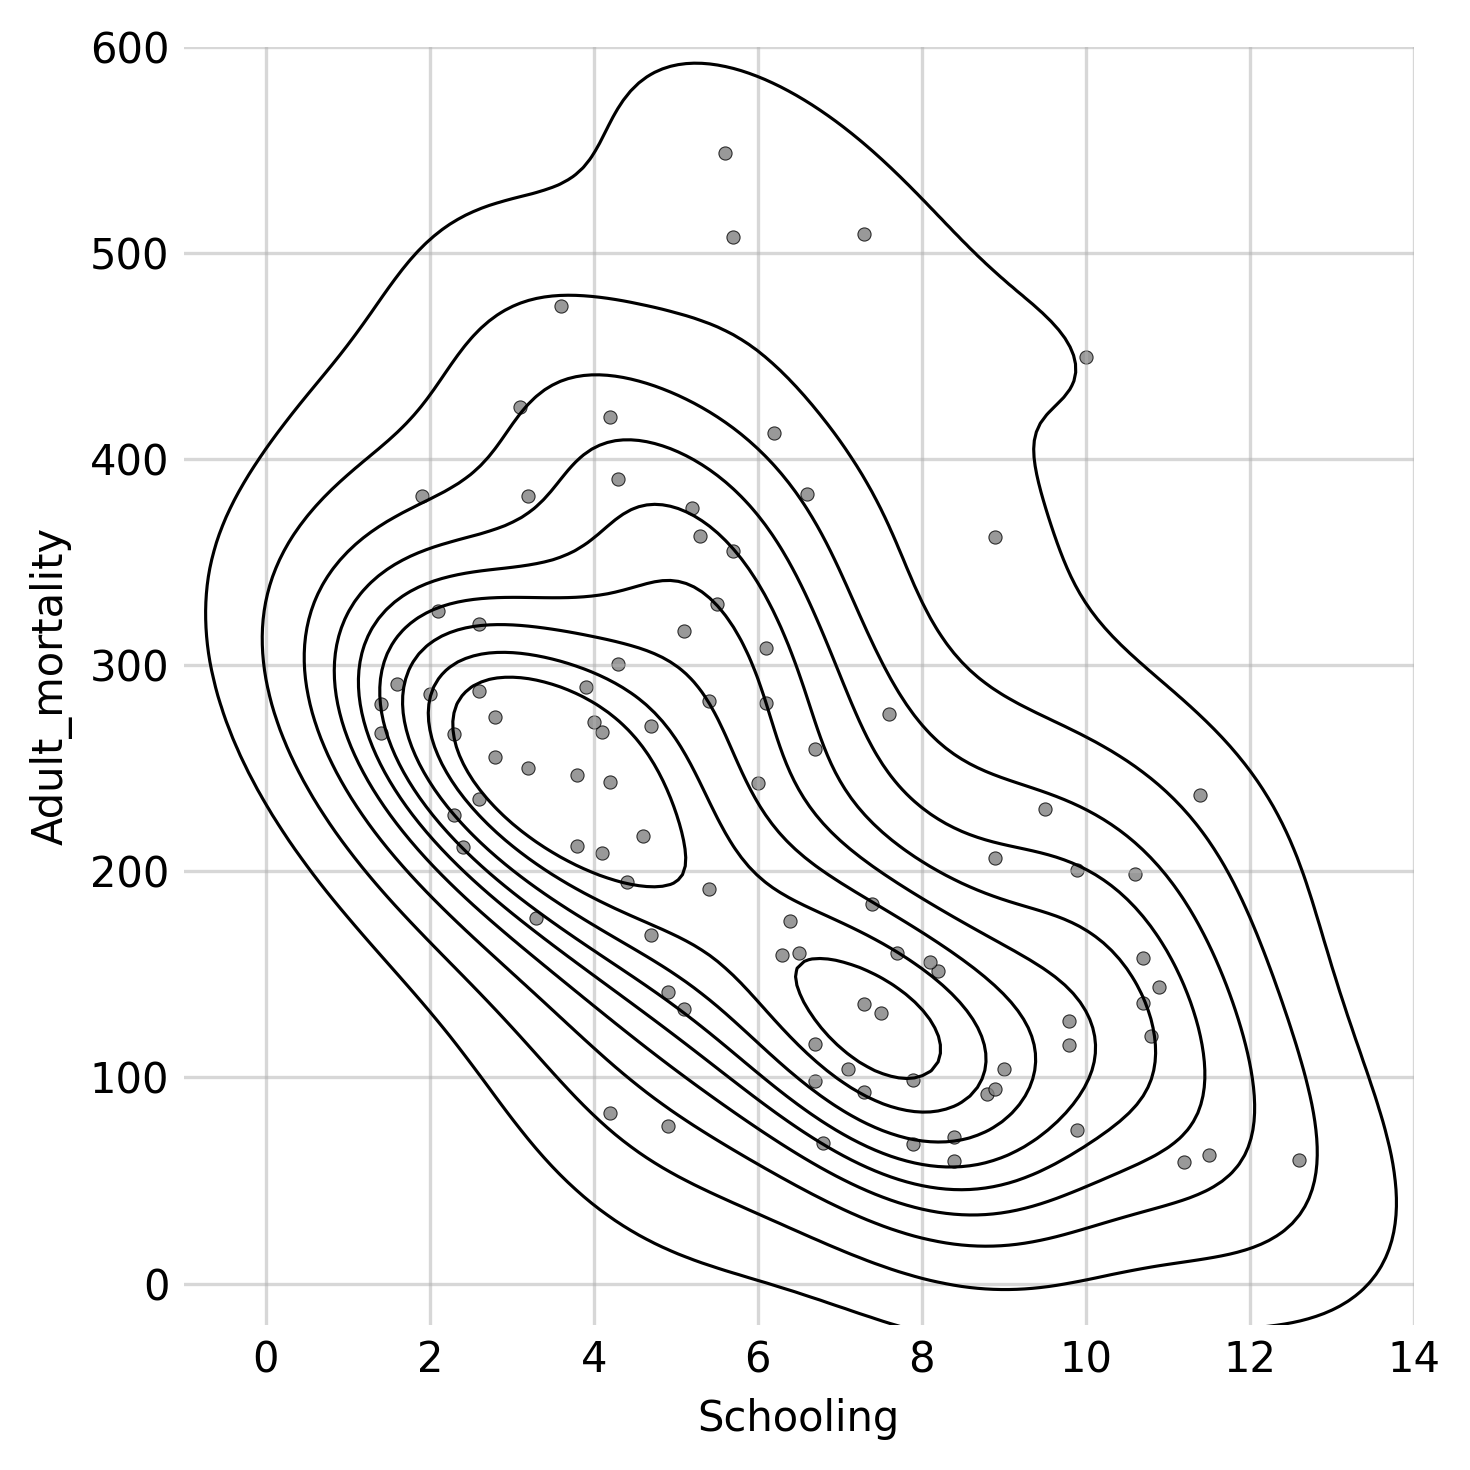

In [31]:
plt.figure(figsize=(5,5))

# Create density contours
sns.kdeplot(data=schooling_mortality,
           x='Schooling',
           y='Adult_mortality',
           levels=10,
           color='black',
           linewidths=0.75)

# Add scatter points using seaborn
sns.scatterplot(data=schooling_mortality,
                x='Schooling',
                y='Adult_mortality',
                s=10,
                color='grey',
                edgecolor='black',
                alpha=0.8)

# Set limits
plt.ylim(-20, 600)
plt.xlim(-1, 14)

plt.grid(True, alpha=0.5, zorder=1)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/gLrLChJ.png" width=1024 />


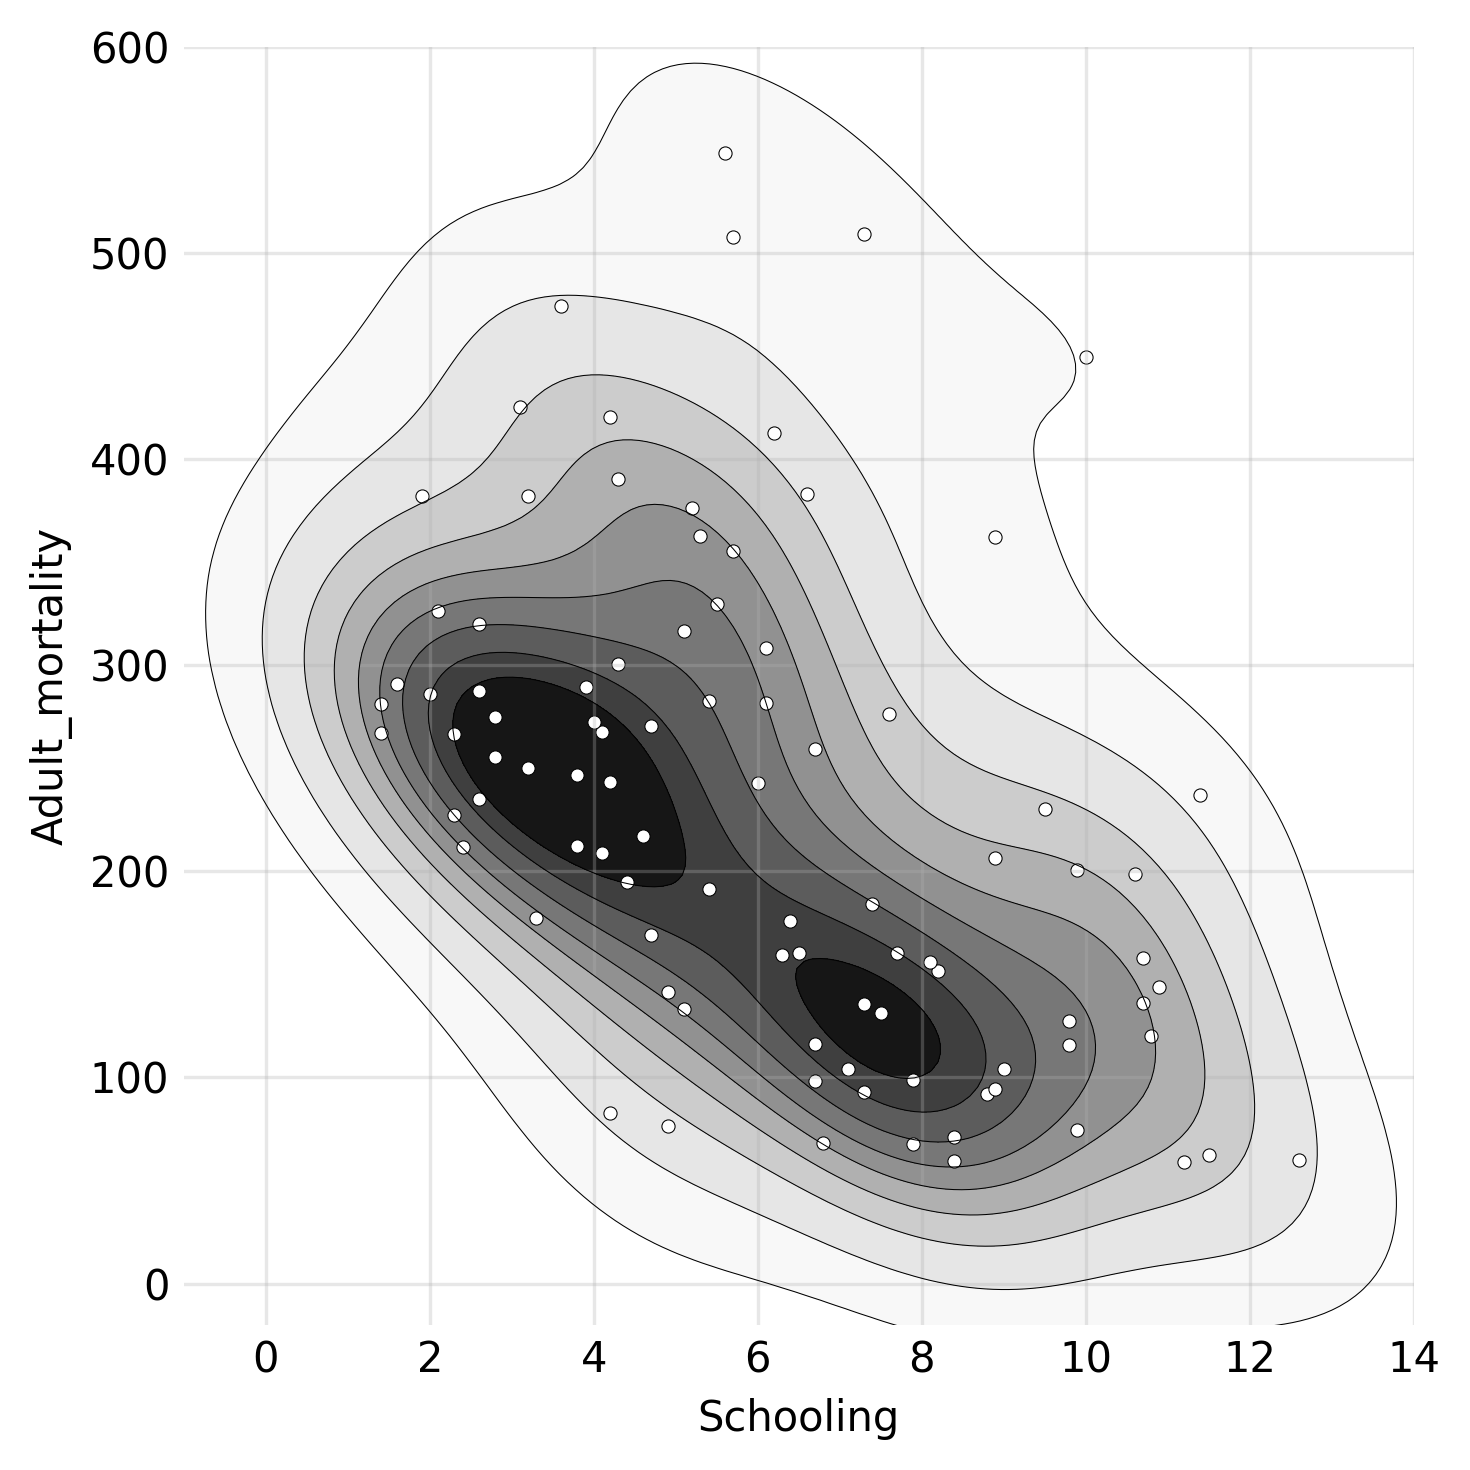

In [32]:
plt.figure(figsize=(5, 5))

# Create filled density contours
sns.kdeplot(data=schooling_mortality,
           x='Schooling',
           y='Adult_mortality',
           levels=10,
           fill=True,
           cmap='Greys')

# Create density contours
sns.kdeplot(data=schooling_mortality,
           x='Schooling',
           y='Adult_mortality',
           levels=10,
           color='black',
           linewidths=0.25)

# Add scatter points using seaborn
sns.scatterplot(data=schooling_mortality,
                x='Schooling',
                y='Adult_mortality',
                s=10,
                color='white',
                edgecolor='black')

plt.ylim(-20, 600)
plt.xlim(-1, 14)
plt.grid(True, alpha=0.3, zorder=1)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/egf3nw3.png" width=1024 />


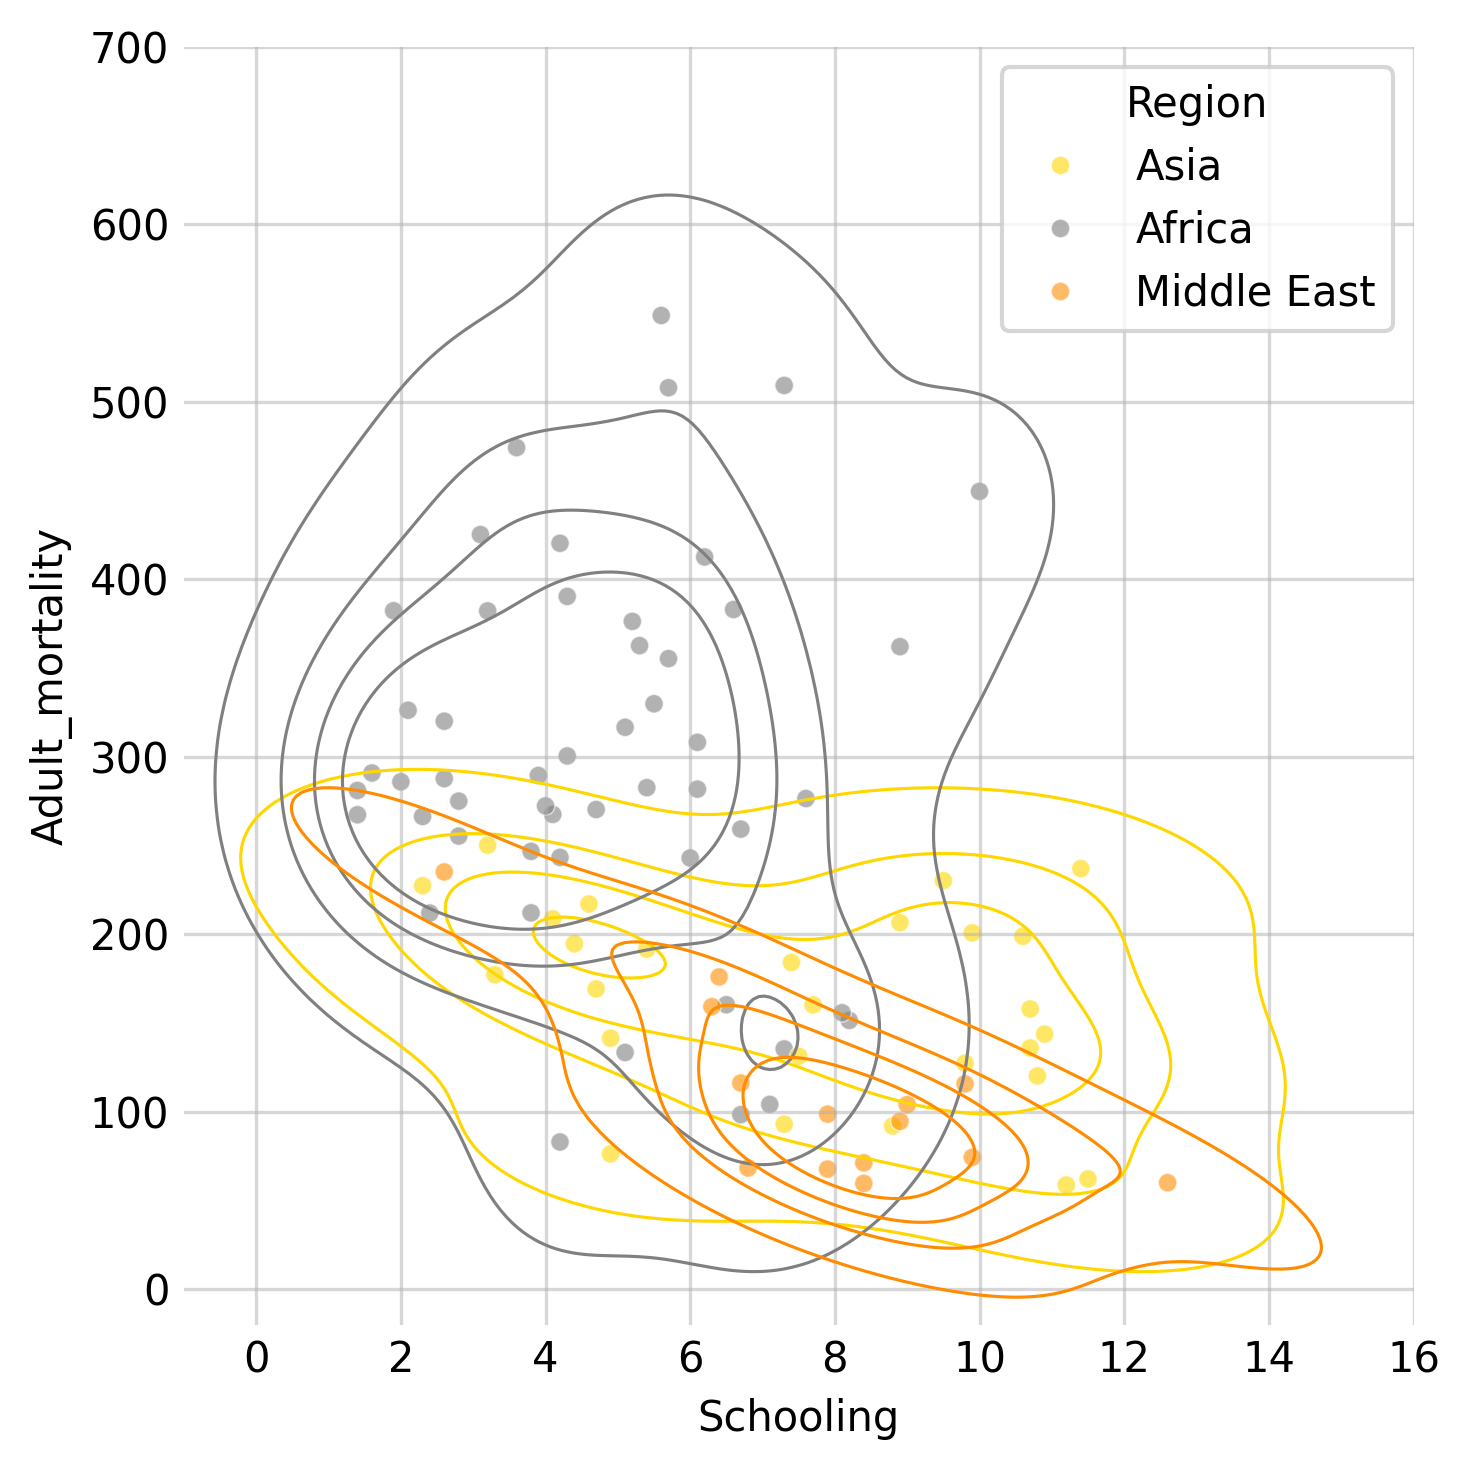

In [33]:
plt.figure(figsize=(5, 5))

# Plot density contours by region
sns.kdeplot(data=schooling_mortality,
            x='Schooling',
            y='Adult_mortality',
            levels=5,
            hue='Region',
            palette={'Africa': 'grey',
                     'Asia': 'gold',
                     'Middle East': 'darkorange'},
            linewidths=0.75)
# Add scatter points
sns.scatterplot(data=schooling_mortality,
               x='Schooling',
               y='Adult_mortality',
               hue='Region',
               palette={'Africa': 'grey',
                       'Asia': 'gold',
                       'Middle East': 'darkorange'},
               alpha=0.6,
               s=20)

plt.ylim(-20, 700)
plt.xlim(-1, 16)
plt.grid(True, alpha=0.5, zorder=1)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/5e6oSq7.png" width=1024 />


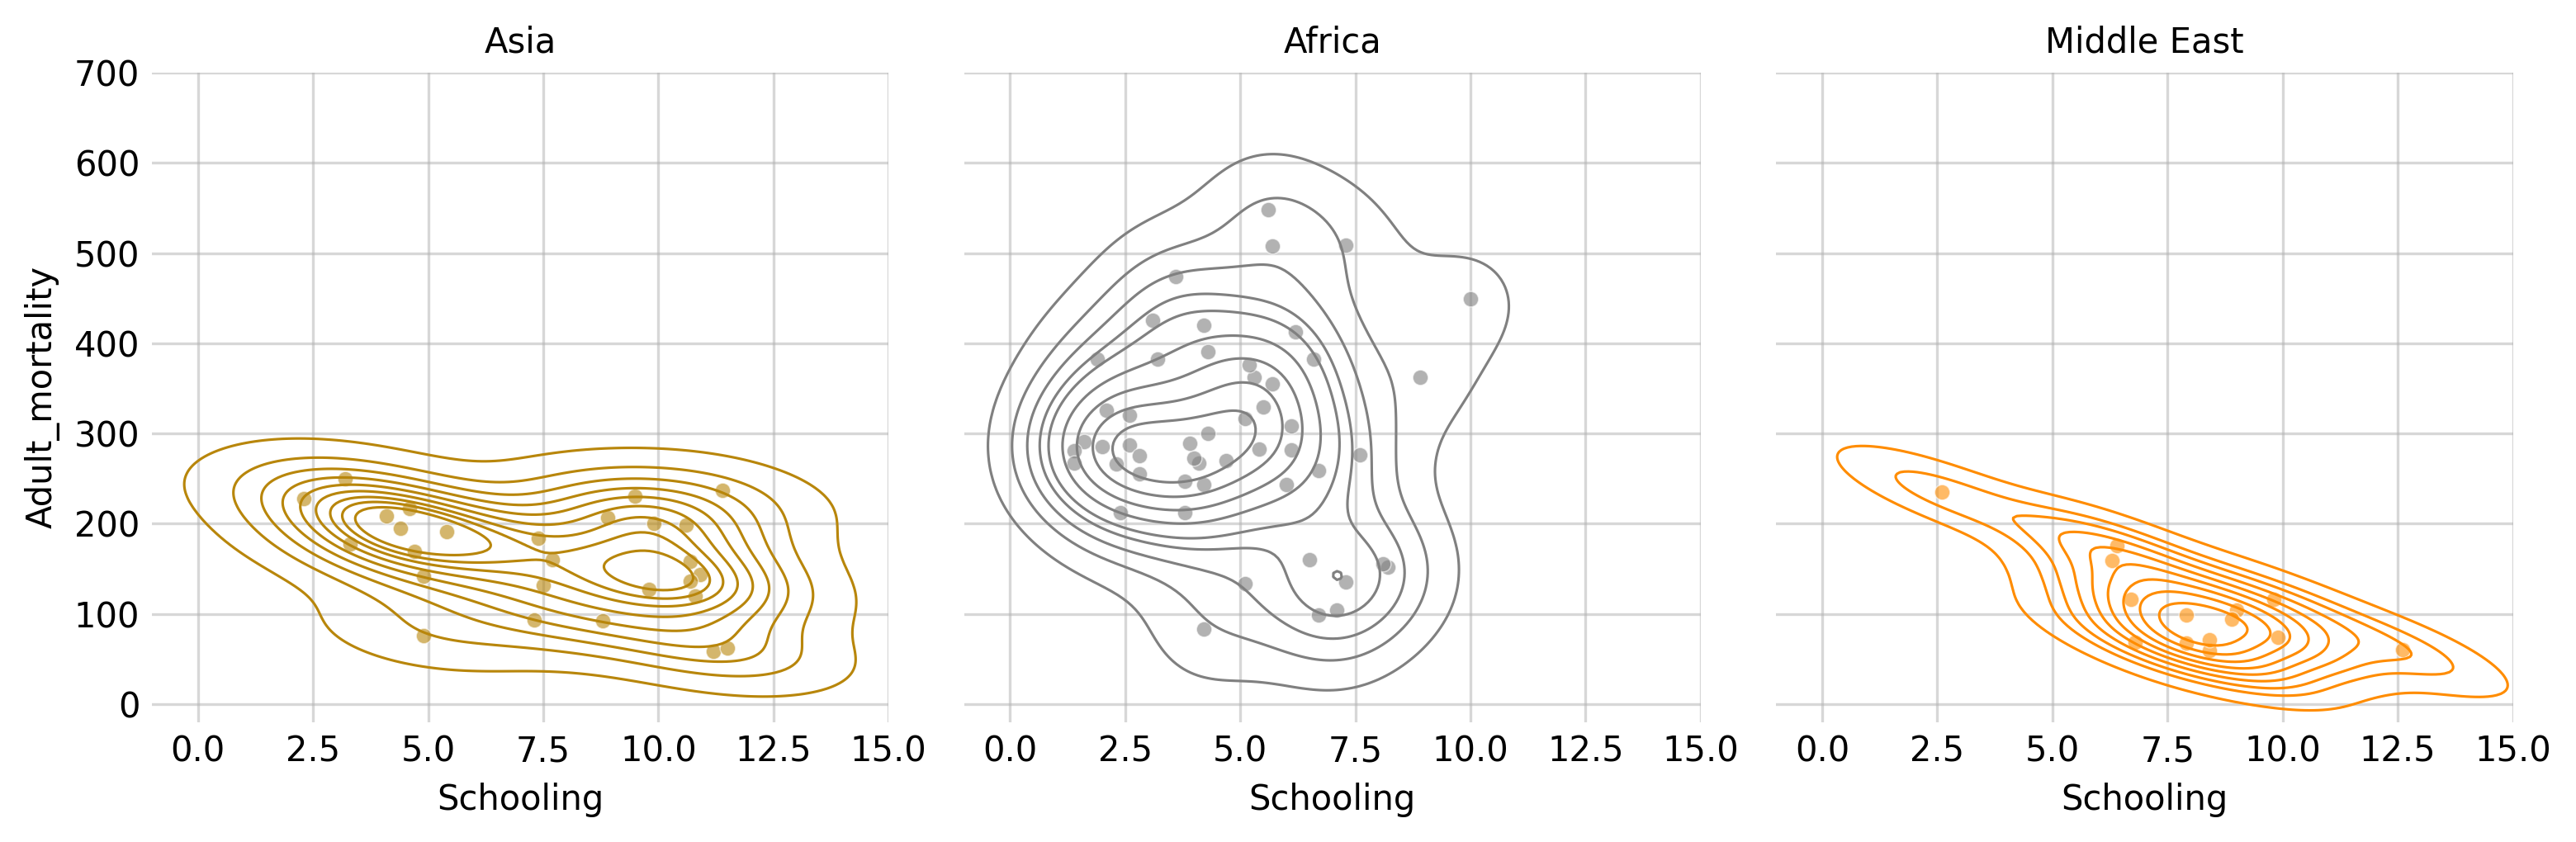

In [34]:
# Create a FacetGrid
g = sns.FacetGrid(schooling_mortality,
                  col='Region',
                  hue='Region',
                  palette={'Africa': 'grey',
                       'Asia': 'darkgoldenrod',
                       'Middle East': 'darkorange'},
                  height=3.5, aspect=1)

# Map the density contours and scatter points to each subplot
g.map(sns.kdeplot, 'Schooling', 'Adult_mortality', levels=10, linewidths=0.75, zorder=3)
g.map(sns.scatterplot, 'Schooling', 'Adult_mortality', s=20, alpha=0.6, zorder=2)

# Set limits and customize each subplot
g.set(ylim=(-20, 700), xlim=(-1, 15))
g.set_titles("{col_name}")

# Add grid and customize spines and ticks
for ax in g.axes.flat:
    ax.grid(True, alpha=0.5)
    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
    ax.tick_params(length=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

<img src="https://i.imgur.com/QBXT7f7.png" width=1024 />


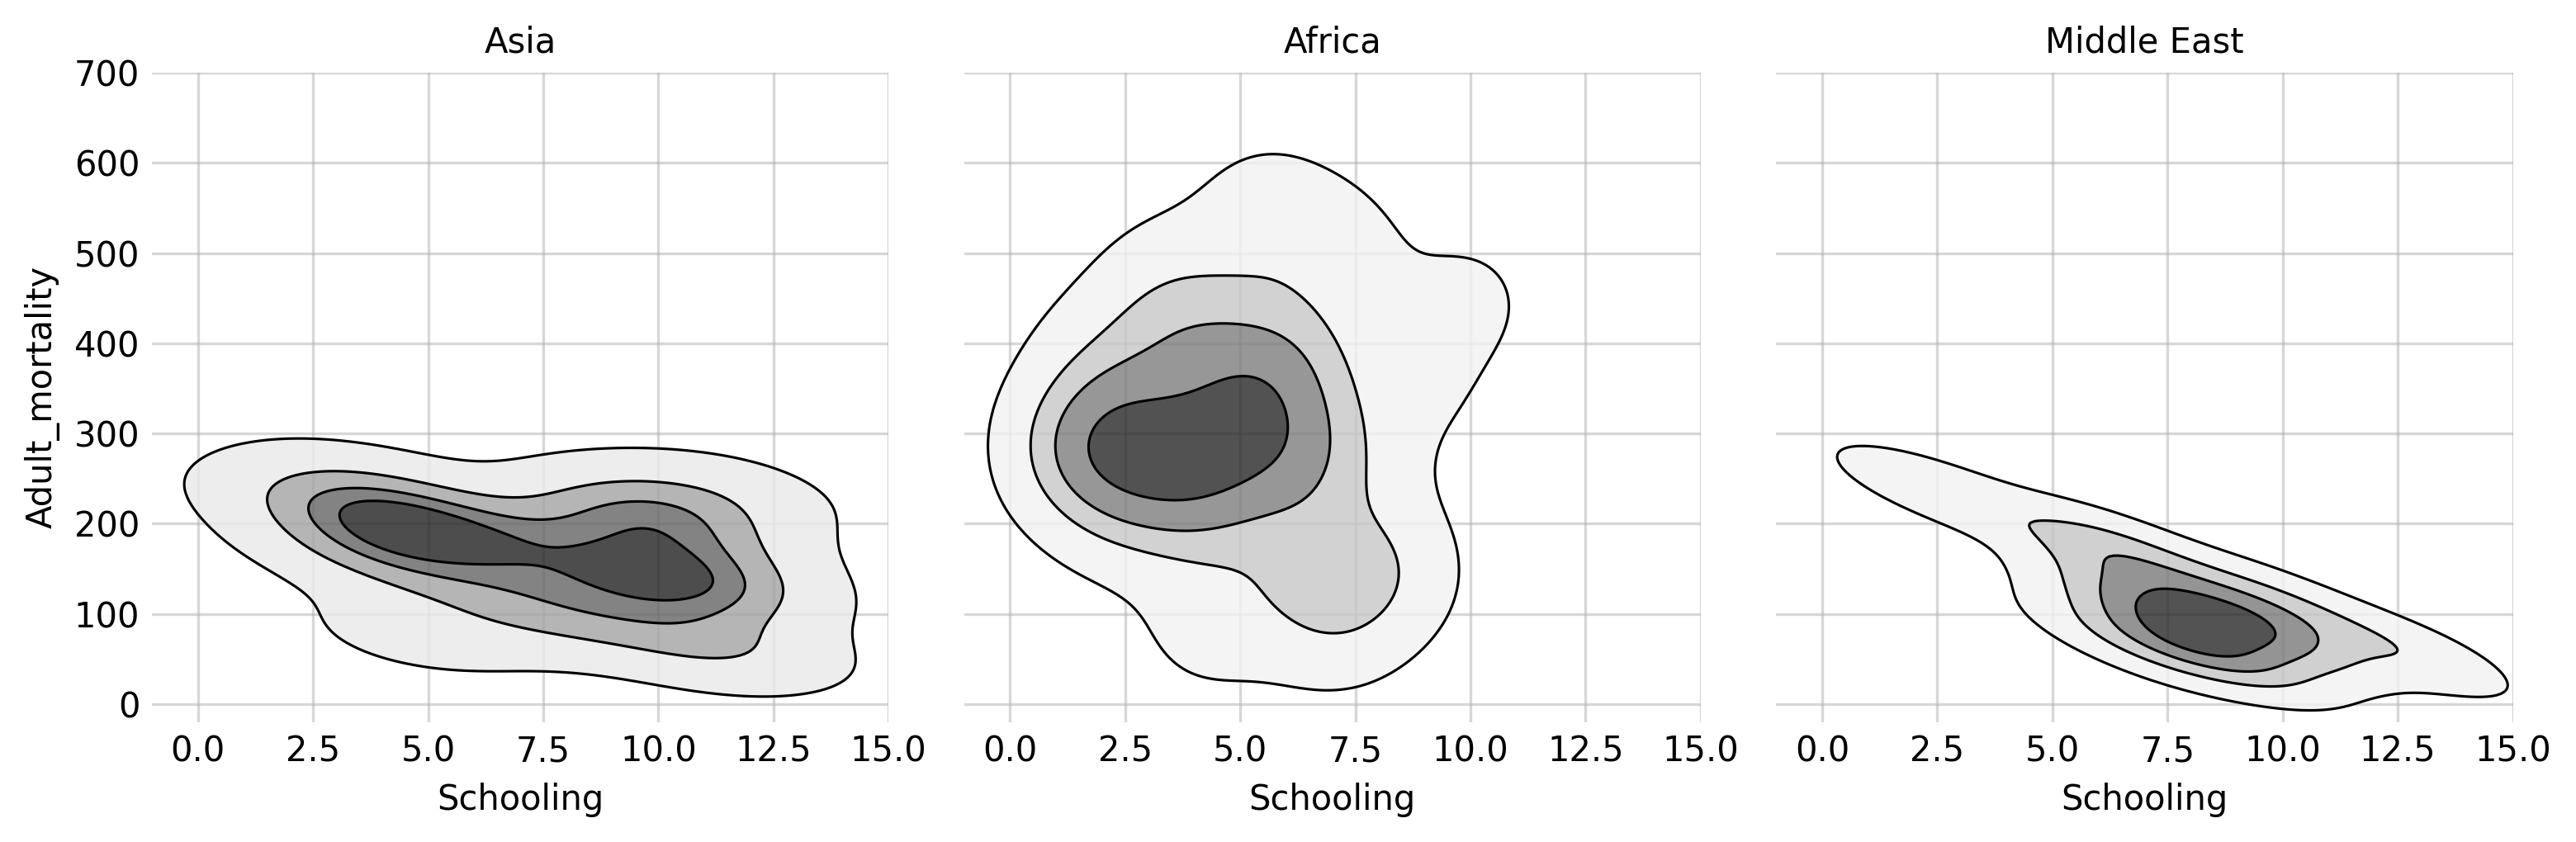

In [35]:
# Create a FacetGrid
g = sns.FacetGrid(schooling_mortality,
                  col='Region',
                  height=3.5, aspect=1)

# Map the density contours and scatter points to each subplot
g.map(sns.kdeplot, 'Schooling', 'Adult_mortality', levels=5, color='black', linewidths=0.75, zorder=3)
g.map(sns.kdeplot, 'Schooling', 'Adult_mortality', levels=5, fill=True, cmap='Greys', alpha=0.8, zorder=2)

# Set limits and customize each subplot
g.set(ylim=(-20, 700), xlim=(-1, 15))
g.set_titles("{col_name}")

# Add grid and customize spines and ticks
for ax in g.axes.flat:
    ax.grid(True, alpha=0.5)
    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
    ax.tick_params(length=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

## <font color="#B0AD89"><strong>  Practice A ᆢ</strong></font>ᆢ
**Issue: Are the case of Polio and Diphtheria related in African and South American countries?**

From the following dataset, make a scatter plot for `Polio` vs `Diphtheria`, with color represents the regions.


In [36]:
# Data Preparation
polio_diphteria = (
   life_expectancy[life_expectancy['Year'] == 2010]
   [['Country', 'Region', 'Polio', 'Diphtheria']]
)

print("\nShape:", polio_diphteria.shape)
polio_diphteria.head()


Shape: (179, 4)


Country                         Region  Polio  Diphtheria
31        Switzerland                 Rest of Europe     96          95
35            Germany                 European Union     94          95
45             Belize  Central America and Caribbean     96          96
46             Sweden                 European Union     98          98
50  Brunei Darussalam                           Asia     99          95

In [37]:
# Filter for Africa and South America
filtered_data = polio_diphteria[
   polio_diphteria['Region'].isin(['Africa', 'South America'])
].copy()

filtered_data

Country         Region  Polio  Diphtheria
86               Guinea-Bissau         Africa     82          83
89                     Namibia         Africa     83          83
230                    Tunisia         Africa     98          98
359                       Peru  South America     92          93
379                   Ethiopia         Africa     69          61
...                        ...            ...    ...         ...
2805                      Togo         Africa     83          83
2813          Congo, Dem. Rep.         Africa     76          60
2825                    Guyana  South America     95          95
2835                     Gabon         Africa     68          67
2841  Central African Republic         Africa     46          45

[63 rows x 4 columns]

Make a 2d histogram using the whole dataset.

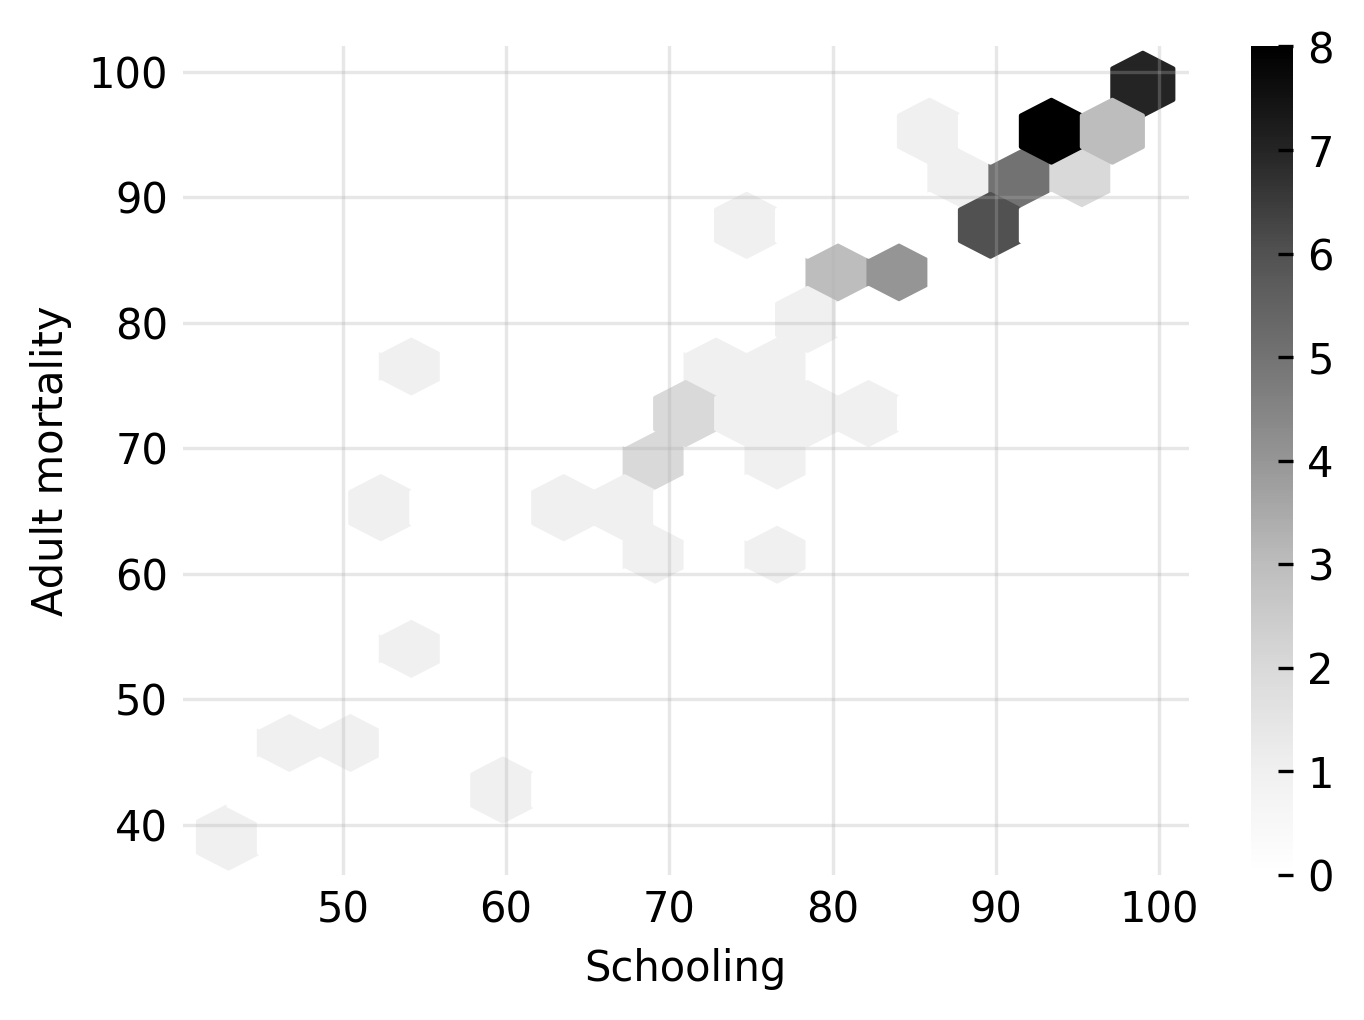

In [38]:
plt.figure(figsize=(5, 3.5))

# chose hexagons because I think it's prettier

plt.hexbin(filtered_data['Polio'],
         filtered_data['Diphtheria'],
         gridsize=15,
         cmap='Greys')

# Add colorbar
cbar = plt.colorbar()

# Remove the black outline from the colorbar
cbar.outline.set_visible(False)
cbar.ax.tick_params(direction='in')

plt.grid(True, alpha=0.3, zorder=1)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.xlabel('Schooling')
plt.ylabel('Adult mortality')
plt.tight_layout()
plt.show()

## <font color="#B0AD89"><strong>  Practice B ᆢ</strong></font>ᆢ
Make a scatter plot with contour lines for the same issue as Practice A. Choose appropriate level so it won't give warnings.


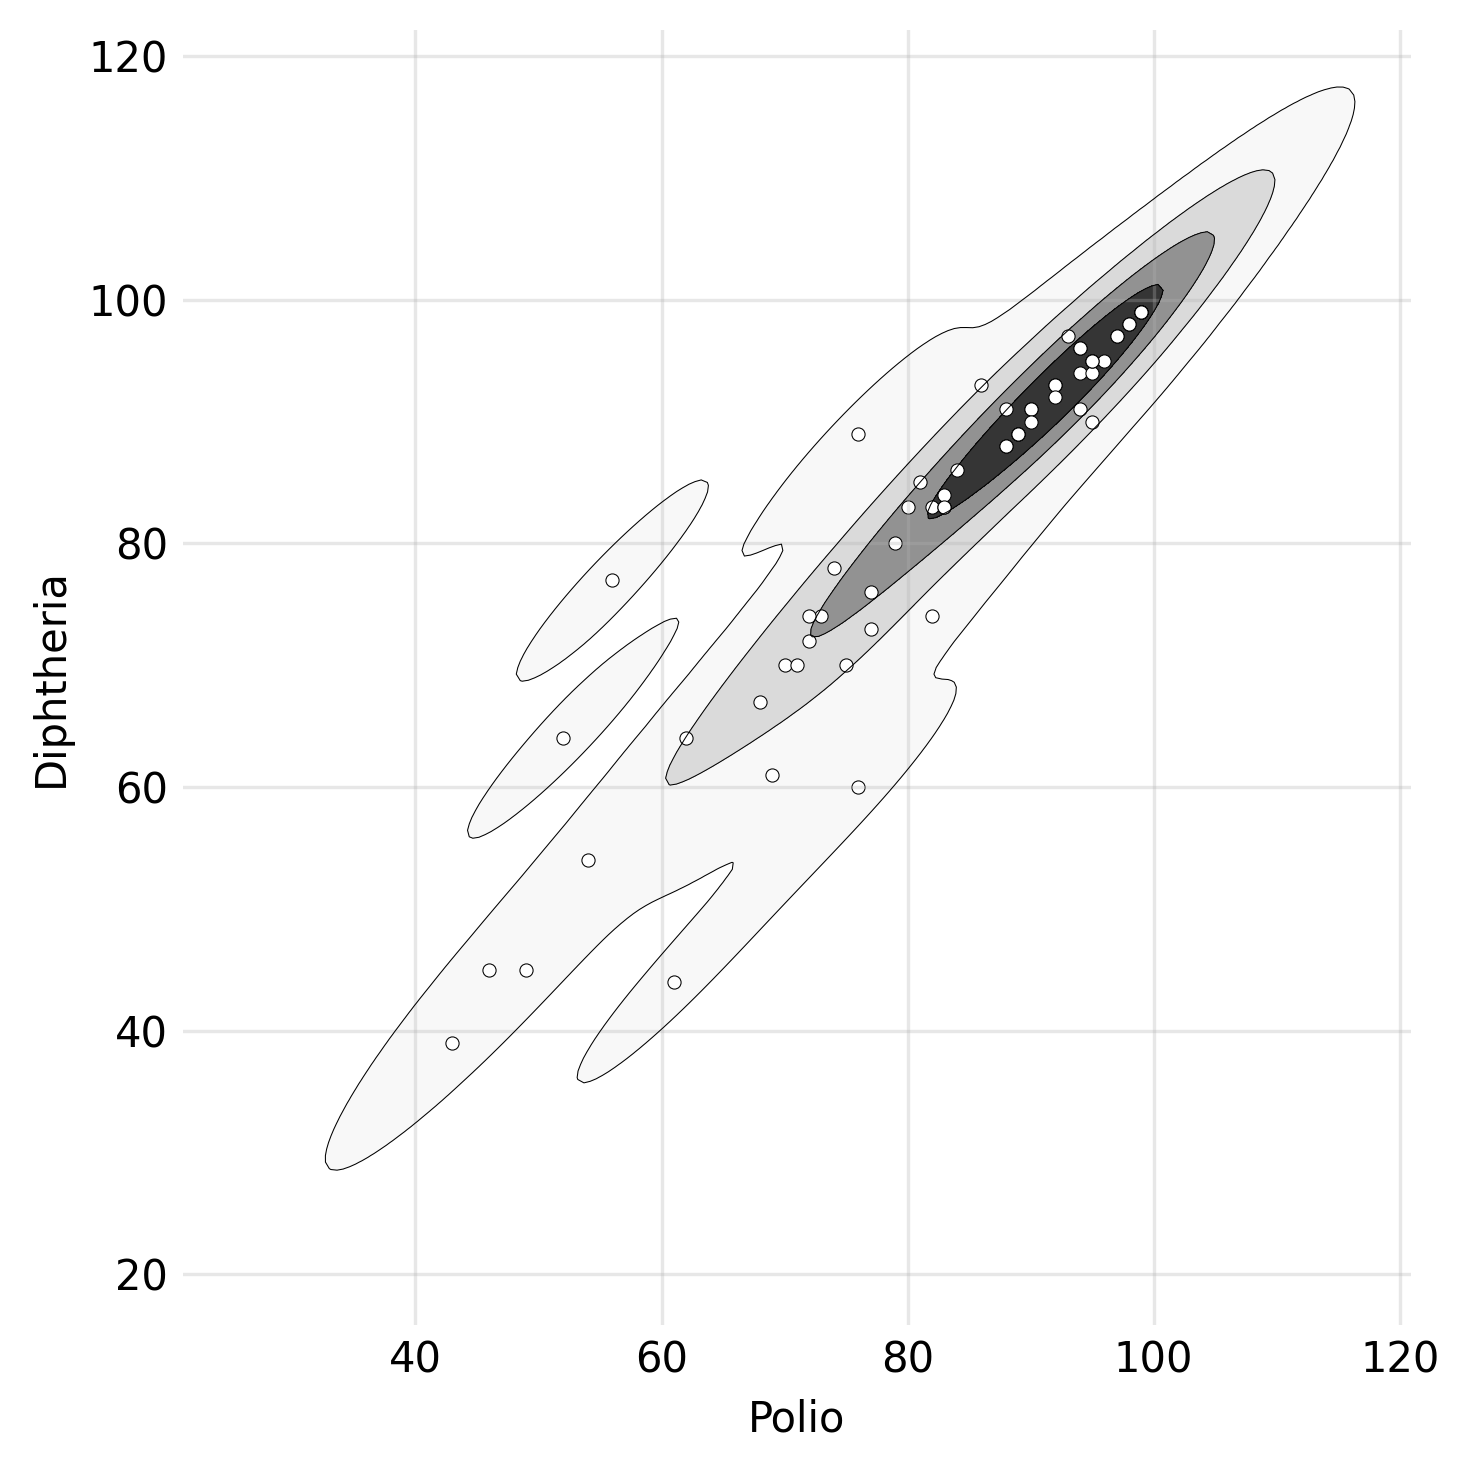

In [39]:
plt.figure(figsize=(5, 5))

# Create filled density contours
sns.kdeplot(data=filtered_data,
           x='Polio',
           y='Diphtheria',
           levels=5,
           fill=True,
           cmap='Greys')

# Create density contours
sns.kdeplot(data=filtered_data,
           x='Polio',
           y='Diphtheria',
           levels=5,
           color='black',
           linewidths=0.25)

# Add scatter points using seaborn
sns.scatterplot(data=filtered_data,
                x='Polio',
                y='Diphtheria',
                s=10,
                color='white',
                edgecolor='black')

plt.grid(True, alpha=0.3, zorder=1)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.tight_layout()
plt.show()

Separate that plot into two plots: one for Africa, one for South America:

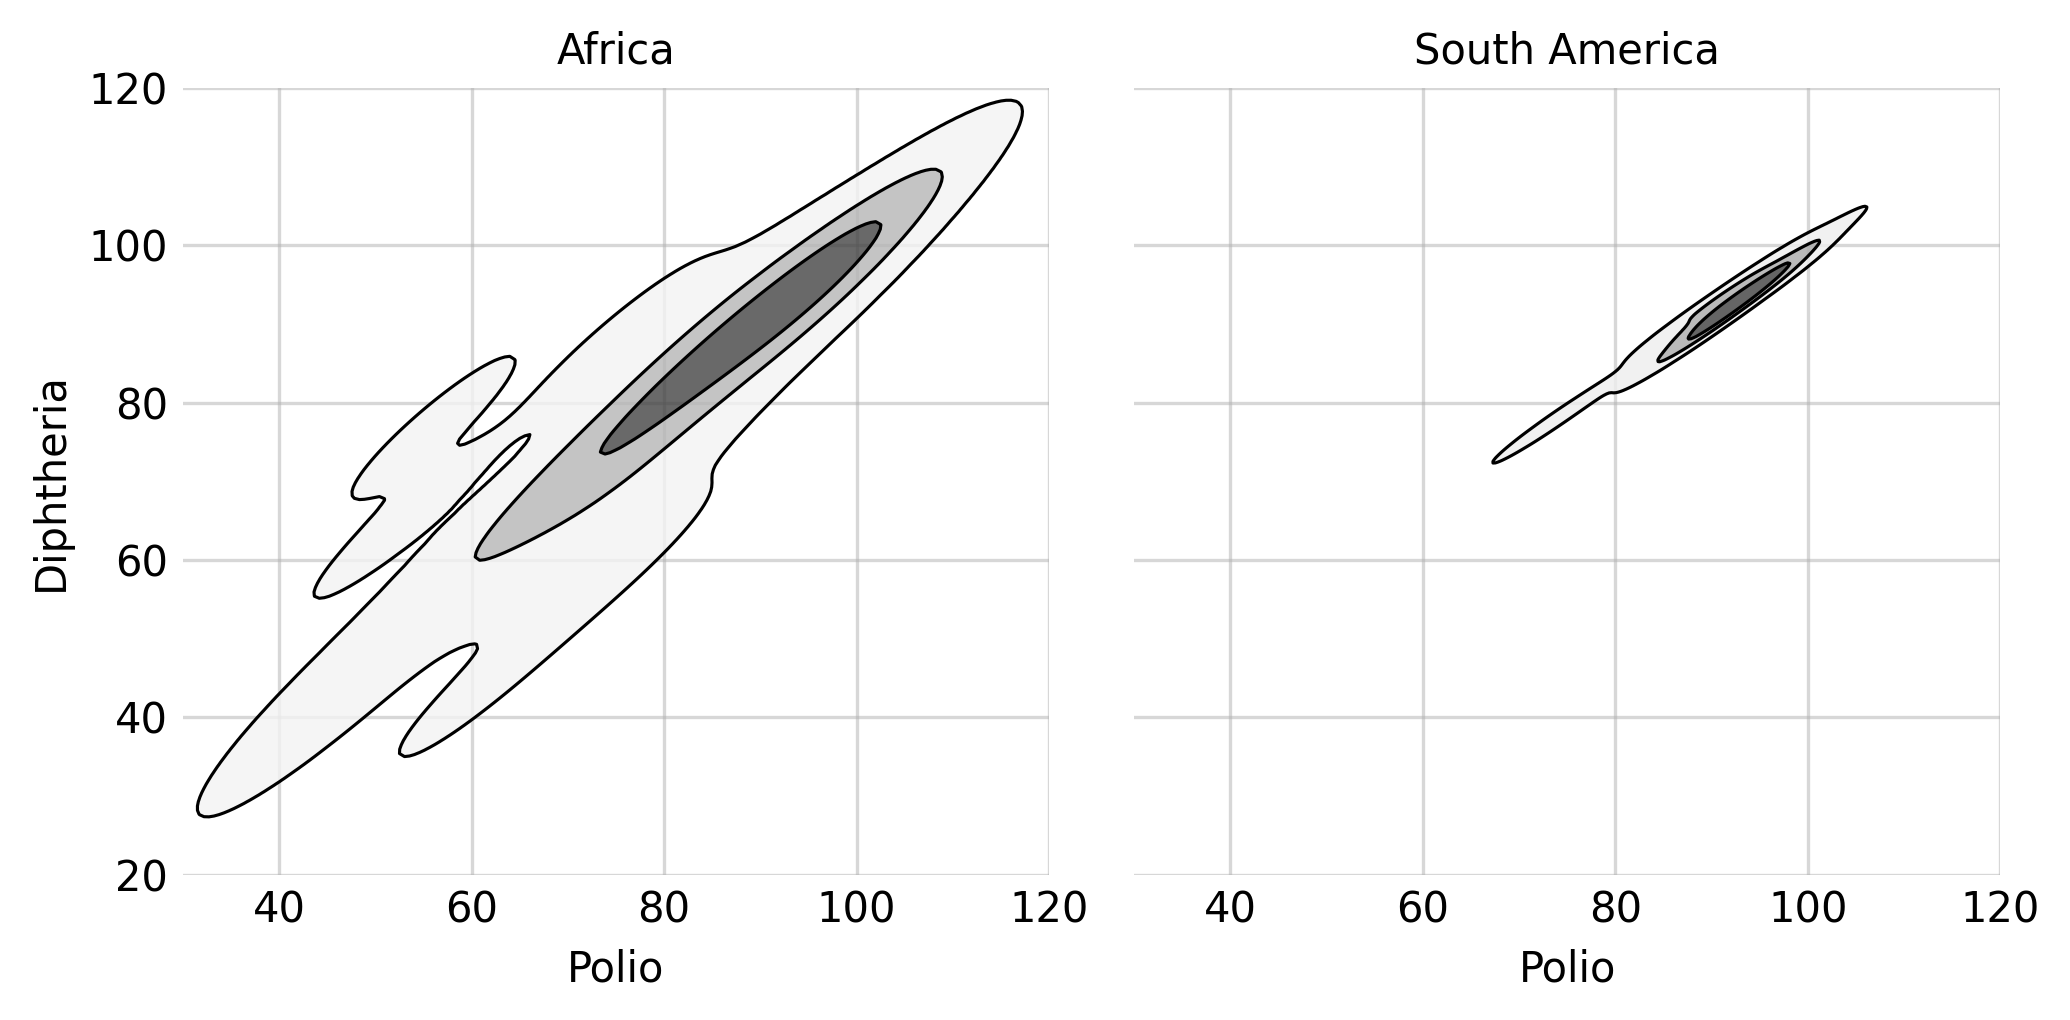

In [40]:
# Create a FacetGrid
g = sns.FacetGrid(filtered_data,
                  col='Region',
                  hue='Region',
                  palette={'Africa': 'darkorange', 'South America': 'green'},
                  height=3.5, aspect=1)

# Map the density contours and scatter points to each subplot
g.map(sns.kdeplot, 'Polio', 'Diphtheria', levels=4, color='black',linewidths=0.75, zorder=3)
g.map(sns.kdeplot, 'Polio', 'Diphtheria', levels=4, fill=True, cmap='Greys', alpha=0.8, zorder=2)

# Set limits and customize each subplot
g.set(ylim=(20, 120), xlim=(30, 120))
g.set_titles("{col_name}")

# Add grid and customize spines and ticks
for ax in g.axes.flat:
    ax.grid(True, alpha=0.5)
    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
    ax.tick_params(length=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

## <font color="#B0AD89"><strong>6.3 ⫶ </strong></font>Common pitfalls of color use

<img src="https://i.imgur.com/CtgW2If.png" width=1024 />

<img src="https://i.imgur.com/VurGtRG.png" width=1024 />


### <font color="#B0AD89"><strong>a ⬝ </strong></font>Encoding too much or irrelevant information

<img src="https://i.imgur.com/kOdXdXr.png" width=1024 />


In [41]:
life_exp_adult_mort = (
   life_expectancy[life_expectancy['Year'] == 2010]
   [['Country', 'Region', 'Life_expectancy', 'Adult_mortality']]
)

print("\nShape:", life_exp_adult_mort.shape)
life_exp_adult_mort.head()


Shape: (179, 4)


Country                         Region  Life_expectancy  \
31        Switzerland                 Rest of Europe             82.2   
35            Germany                 European Union             80.0   
45             Belize  Central America and Caribbean             72.1   
46             Sweden                 European Union             81.5   
50  Brunei Darussalam                           Asia             74.7   

    Adult_mortality  
31          56.9105  
35          77.6040  
45         181.5840  
46          57.4920  
50          91.9455

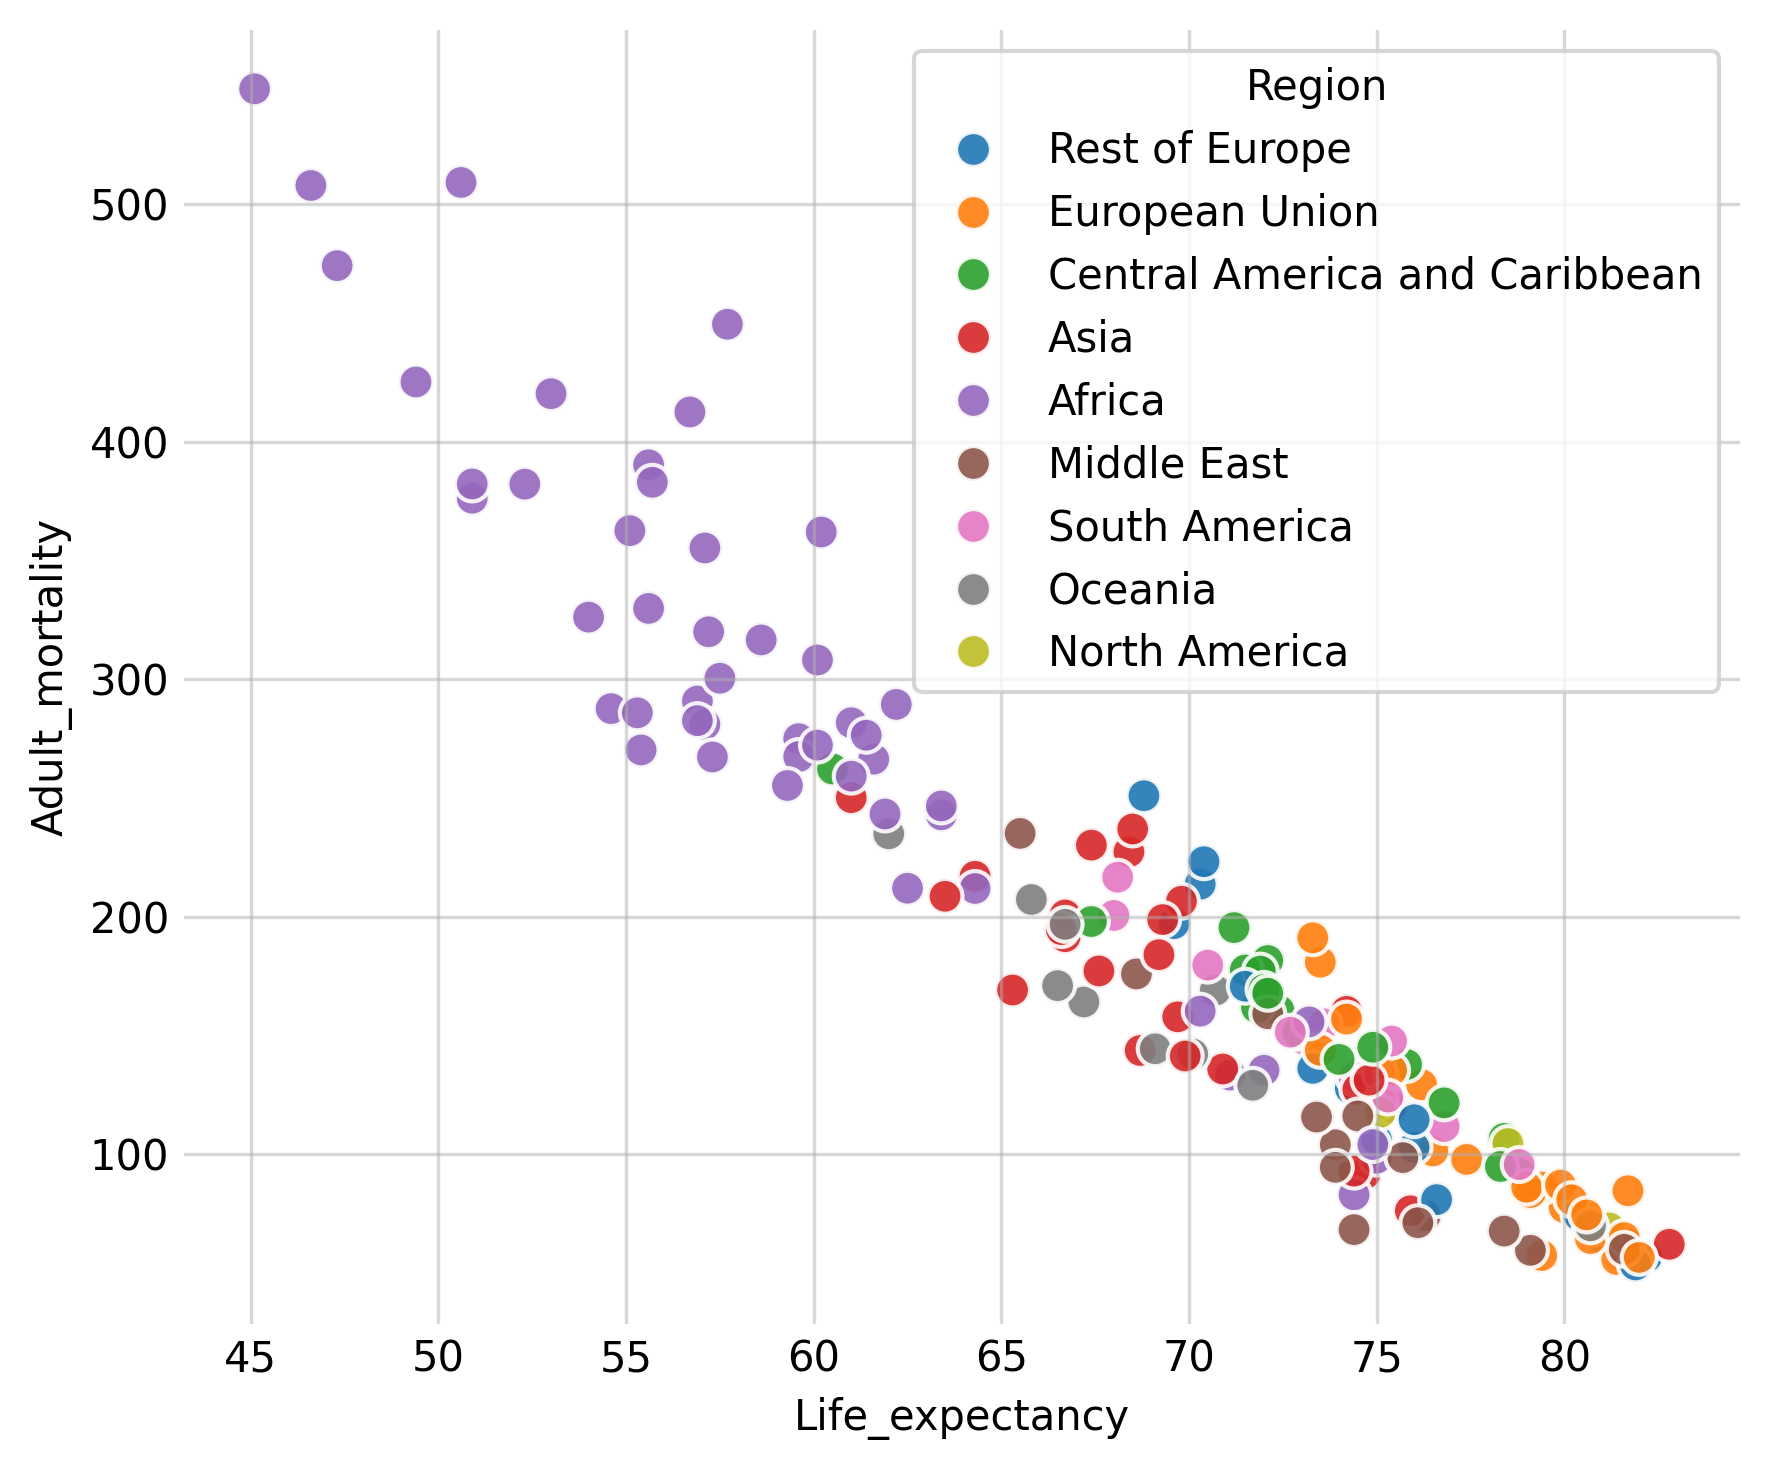

In [42]:
plt.figure(figsize=(6, 5))

sns.scatterplot(data=life_exp_adult_mort,
               x='Life_expectancy',
               y='Adult_mortality',
               hue='Region',
               s=70,
               edgecolor='white',
               linewidth=1,
               alpha=0.9)

plt.grid(True, alpha=0.5, zorder=1)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/ASZvryy.png" width=1024 />


In [43]:
life_exp_adult_mort_EU_AF = (
   life_expectancy[life_expectancy['Year'] == 2010]
   [['Country', 'Region', 'Life_expectancy', 'Adult_mortality']]
   .assign(Region=lambda x: x['Region'].map({
       'European Union': 'Europe',
       'Rest of Europe': 'Europe',
       'Africa': 'Africa',
       'North America': 'Others',
       'Central America and Caribbean': 'Others',
       'South America': 'Others',
       'Middle East': 'Others',
       'Asia': 'Others',
       'Oceania': 'Others'
   }).fillna(x['Region']))
)

life_exp_adult_mort_EU_AF.head()

Country  Region  Life_expectancy  Adult_mortality
31        Switzerland  Europe             82.2          56.9105
35            Germany  Europe             80.0          77.6040
45             Belize  Others             72.1         181.5840
46             Sweden  Europe             81.5          57.4920
50  Brunei Darussalam  Others             74.7          91.9455

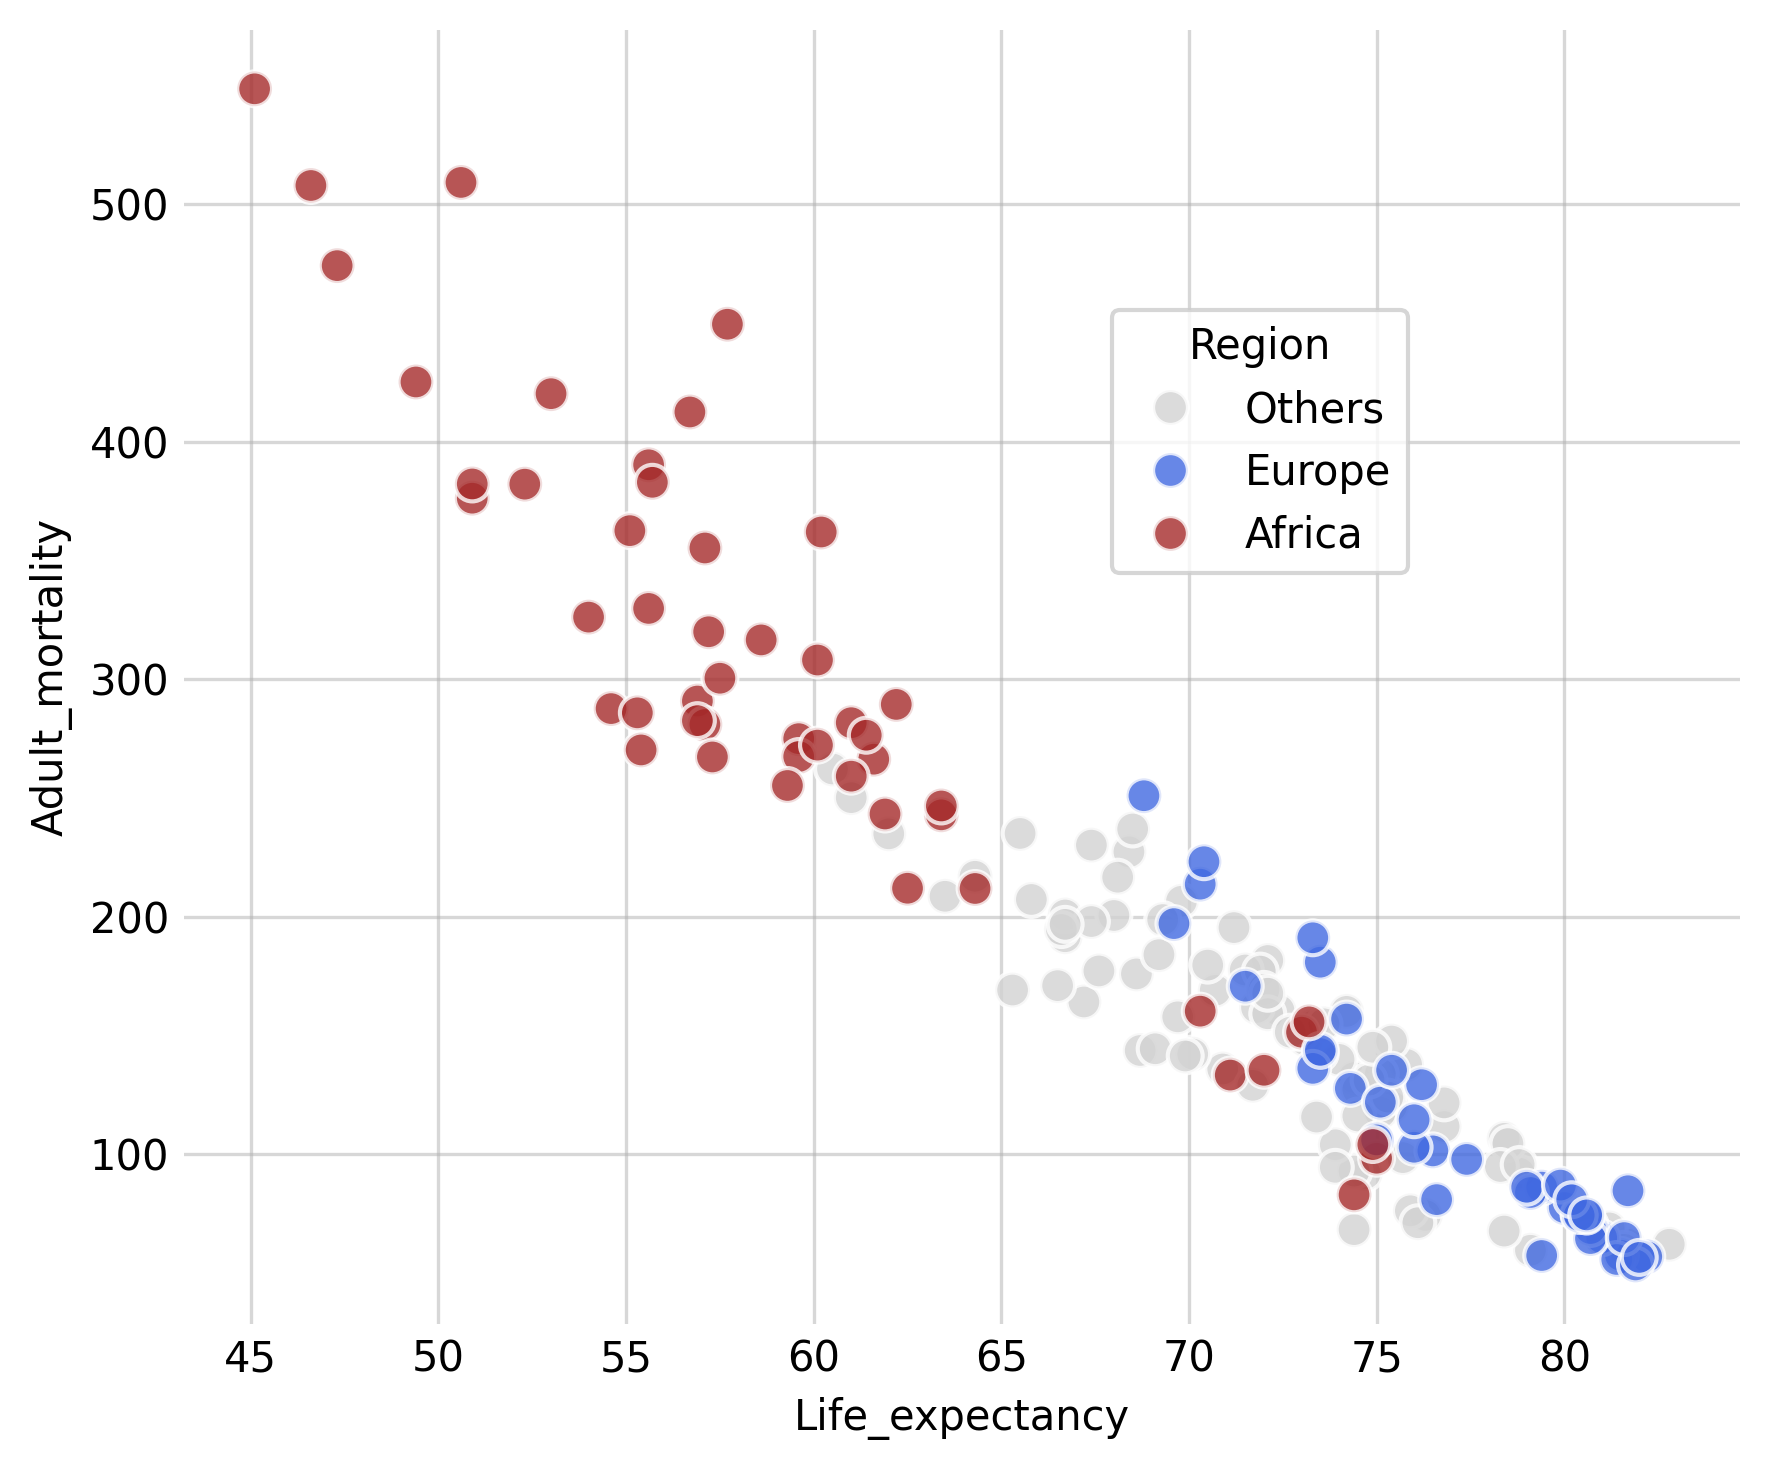

In [44]:
plt.figure(figsize=(6, 5))

# Set color scheme
region_colors = {
   'Europe': 'royalblue',
   'Africa': 'brown',
   'Others': 'lightgrey'
}

# Plot points - Others first, then Europe and Africa
others_data = life_exp_adult_mort_EU_AF[life_exp_adult_mort_EU_AF['Region'] == 'Others']
main_data = life_exp_adult_mort_EU_AF[life_exp_adult_mort_EU_AF['Region'] != 'Others']

sns.scatterplot(data=others_data,
               x='Life_expectancy',
               y='Adult_mortality',
               hue='Region',
               palette=region_colors,
               s=70,
               edgecolor='white',
               linewidth=1,
               alpha=0.8,
                zorder=2)

sns.scatterplot(data=main_data,
               x='Life_expectancy',
               y='Adult_mortality',
               hue='Region',
               palette=region_colors,
               s=70,
               edgecolor='white',
               linewidth=1,
               alpha=0.8,
               zorder=3)

plt.legend(title='Region', bbox_to_anchor=(0.8, 0.8))
plt.grid(True, alpha=0.5, zorder=1)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/hUvYbnv.png" width=1024 />


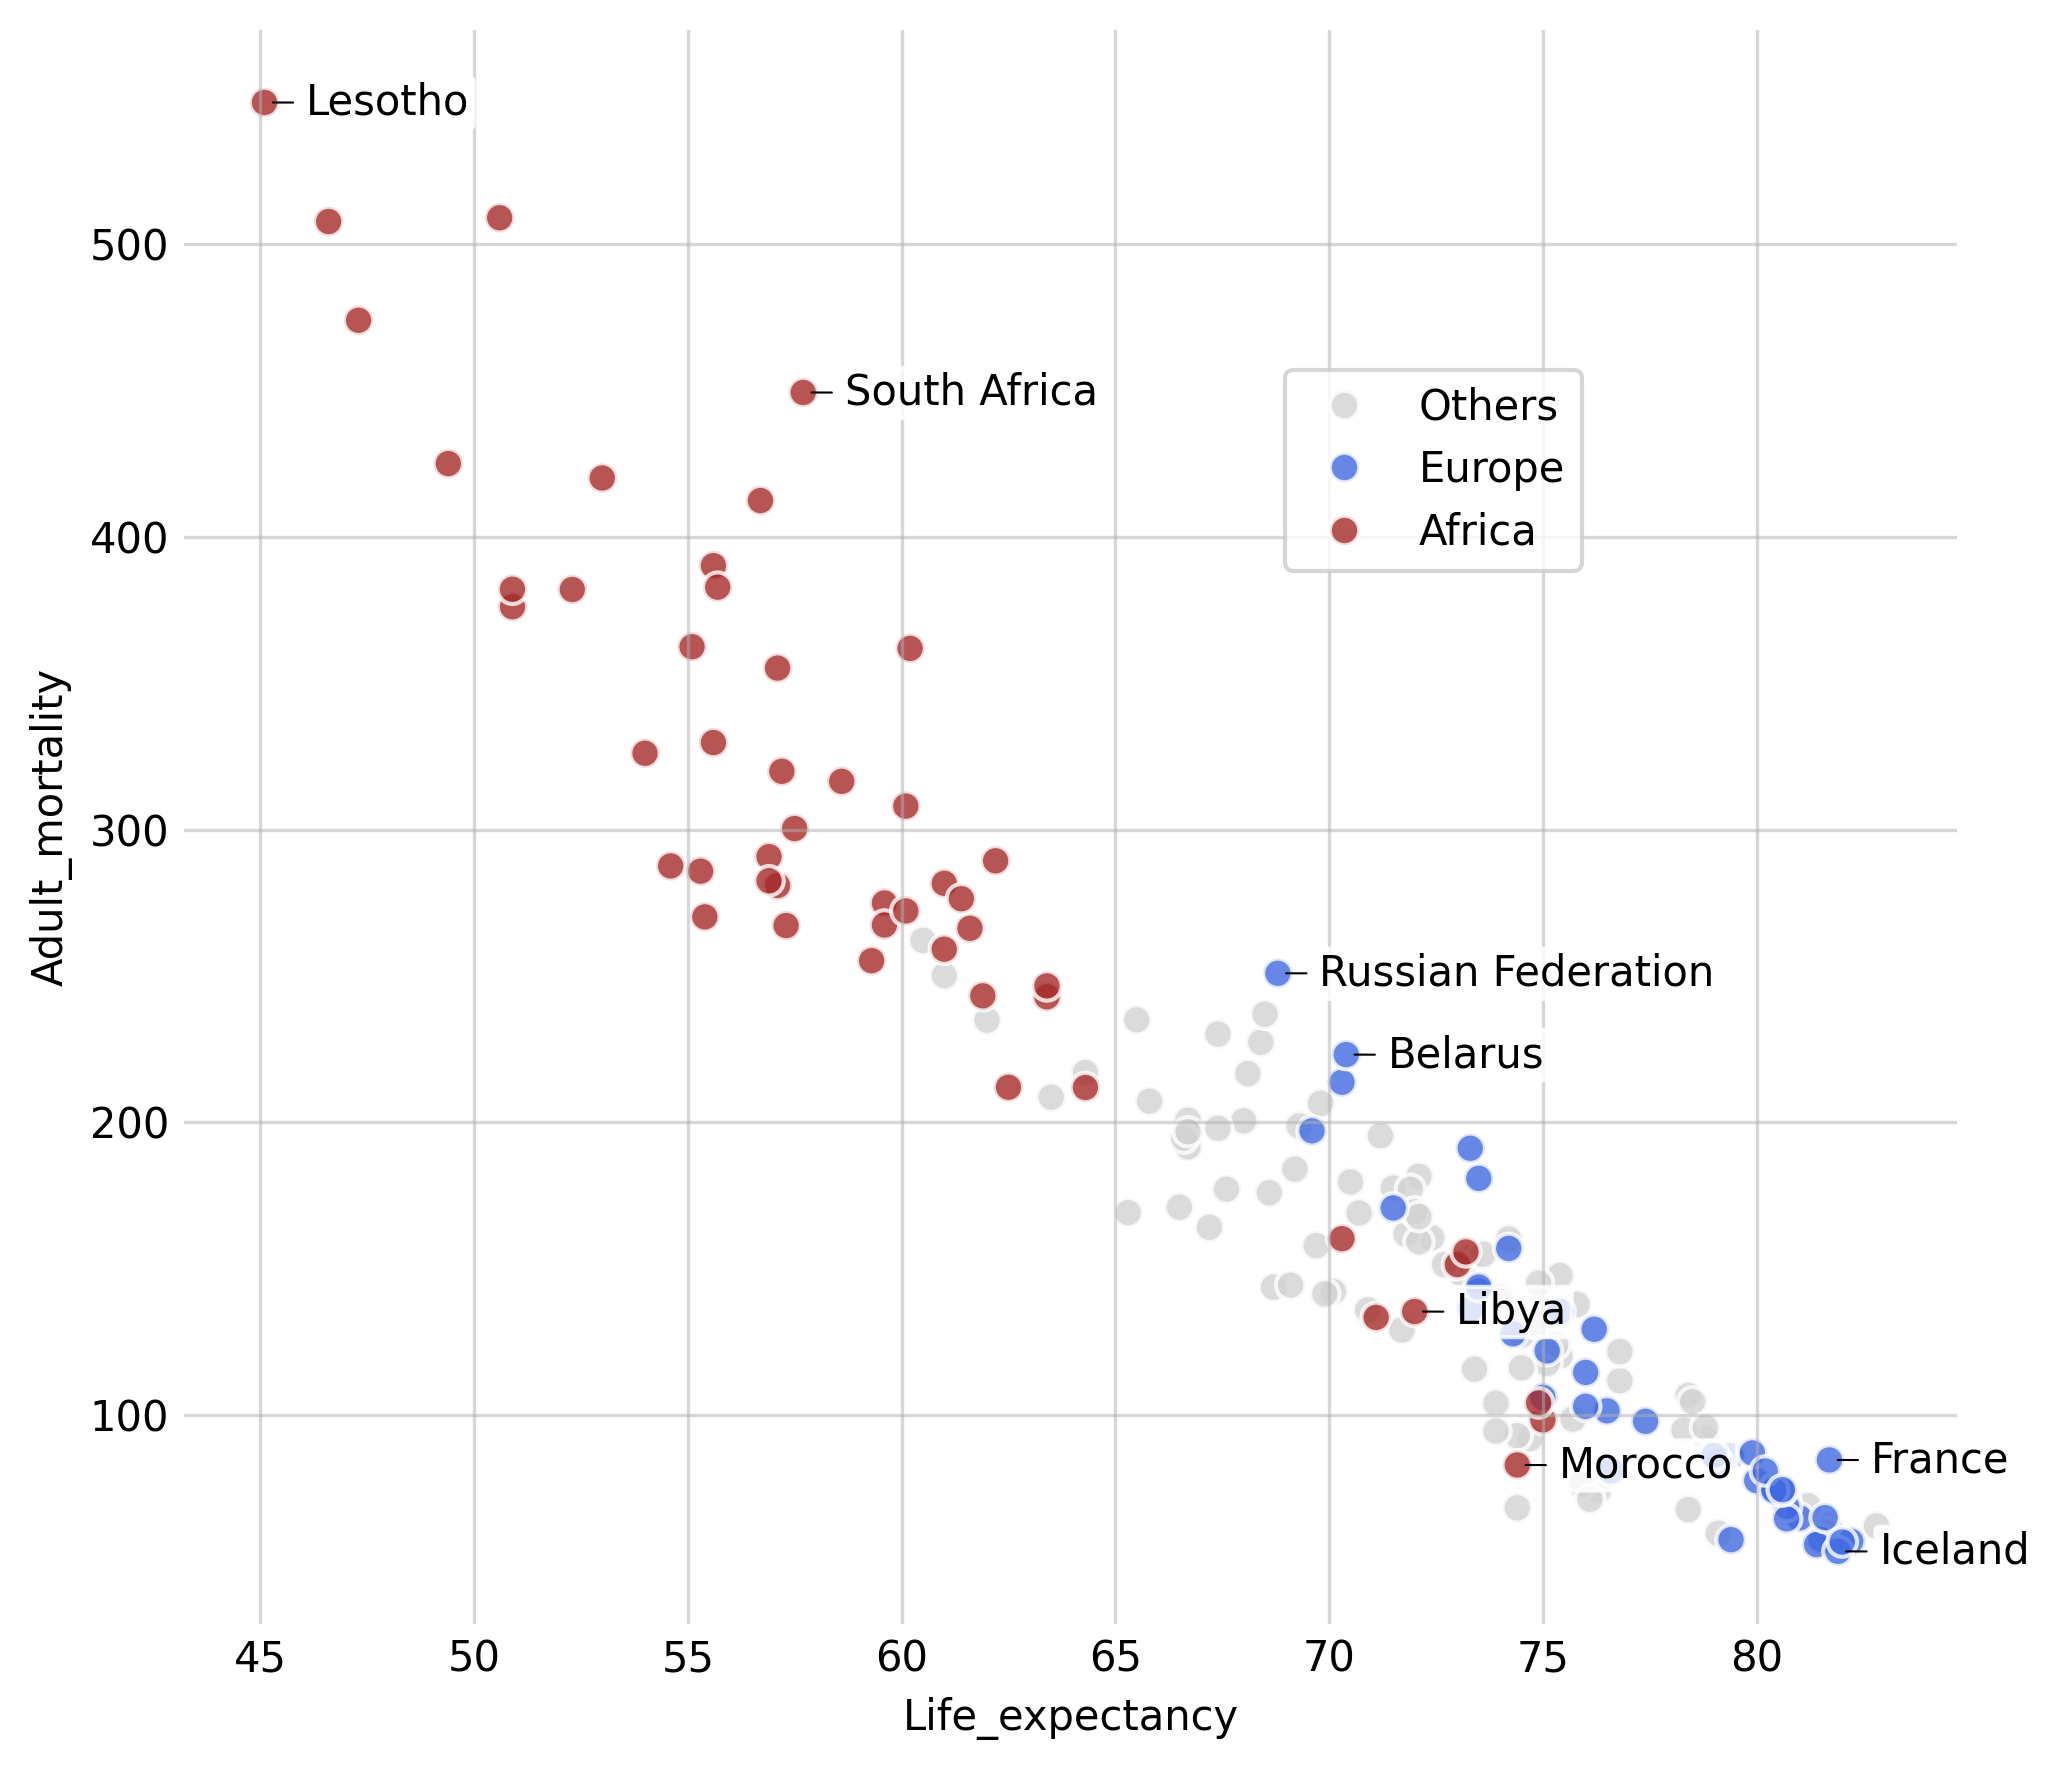

In [45]:
plt.figure(figsize=(7, 6))

selected_countries = ["South Africa", "Libya", "Lesotho", "Morocco",
                    "Russian Federation", "Iceland", "Belarus", "France"]

region_colors = {
   'Europe': 'royalblue',
   'Africa': 'brown',
   'Others': 'lightgrey'
}

# Plot points - Others first, then Europe and Africa
others_data = life_exp_adult_mort_EU_AF[life_exp_adult_mort_EU_AF['Region'] == 'Others']
main_data = life_exp_adult_mort_EU_AF[life_exp_adult_mort_EU_AF['Region'] != 'Others']

# Plot base scatter points
sns.scatterplot(data=others_data,
               x='Life_expectancy',
               y='Adult_mortality',
               hue='Region',
               palette=region_colors,
               s=50,
               edgecolor='white',
               linewidth=1,
               alpha=0.8)

sns.scatterplot(data=main_data,
               x='Life_expectancy',
               y='Adult_mortality',
               hue='Region',
               palette=region_colors,
               s=50,
               edgecolor='white',
               linewidth=1,
               alpha=0.8)

# Add annotations for selected countries with white boxes and connecting lines
for country in selected_countries:
    country_data = life_exp_adult_mort_EU_AF[life_exp_adult_mort_EU_AF['Country'] == country]
    plt.annotate(country,
                 (country_data['Life_expectancy'].iloc[0],
                  country_data['Adult_mortality'].iloc[0]),
                 xytext=(10, -3),
                 textcoords='offset points',
                 fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.1', edgecolor='white', facecolor='white', alpha=0.8),
                 arrowprops=dict(arrowstyle='-', color='black', lw=0.5))

plt.legend(bbox_to_anchor=(0.8, 0.8))
plt.grid(True, alpha=0.5, zorder=1)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/koKf7GF.png" width=1024 />


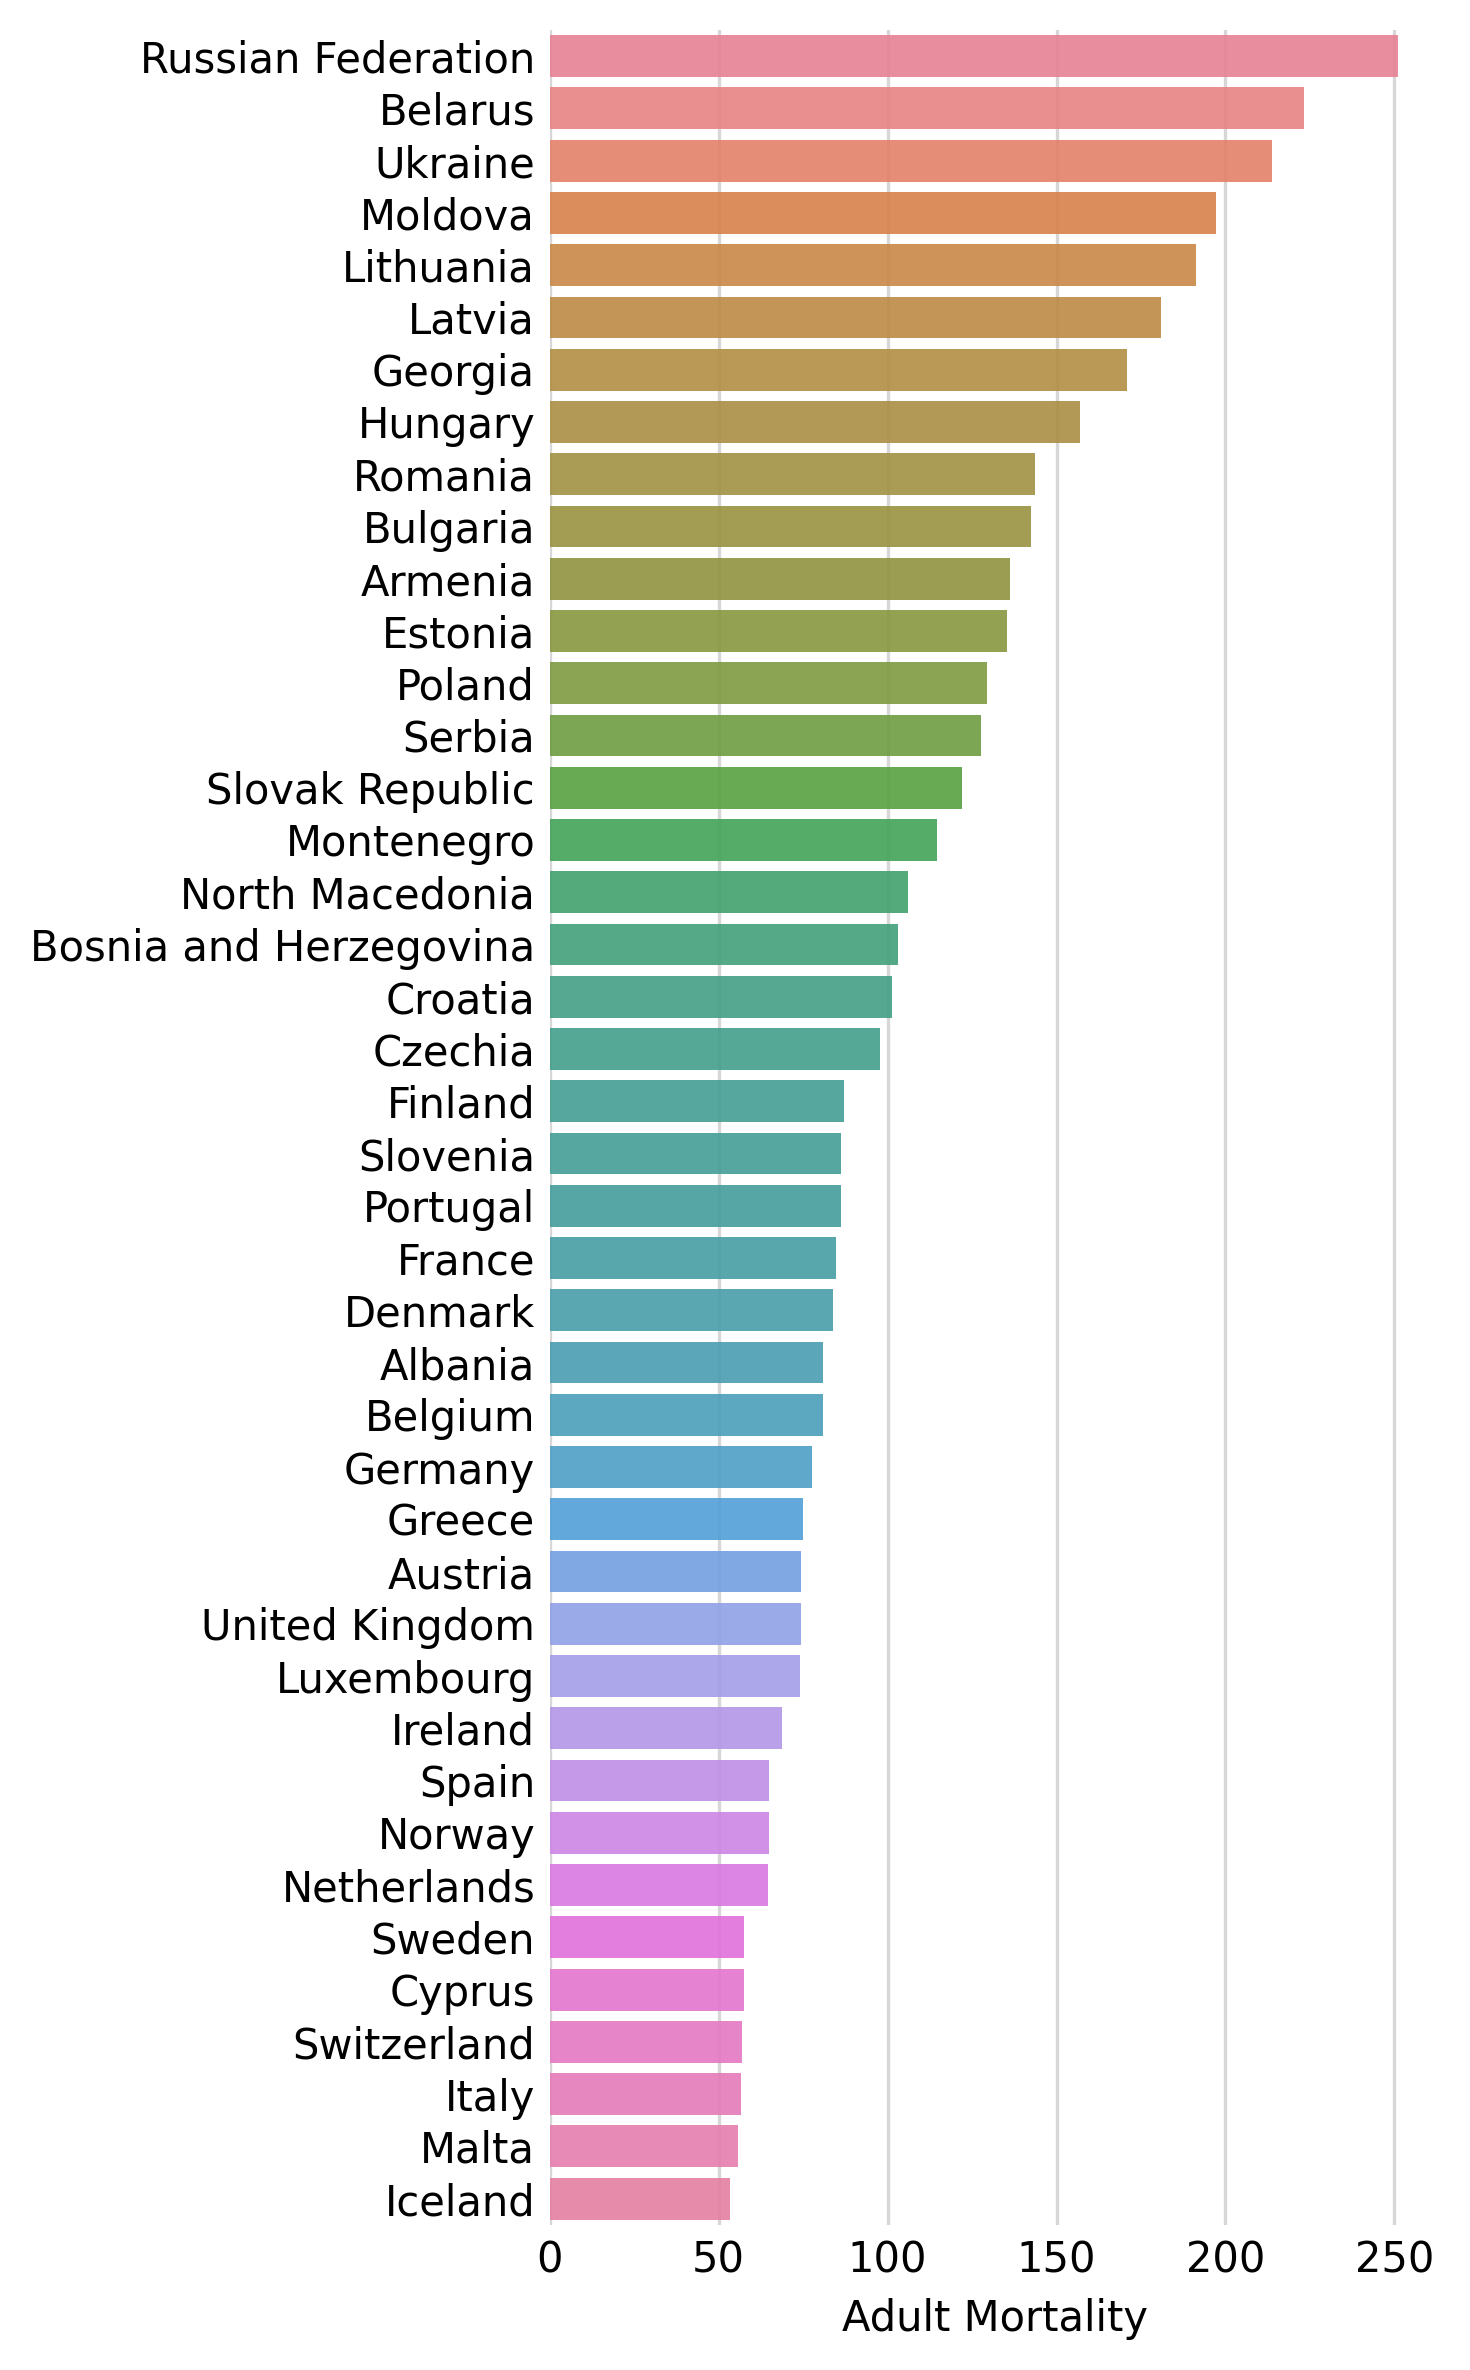

In [46]:
plt.figure(figsize=(5, 8))

# Filter and sort European data
europe_data = (life_exp_adult_mort_EU_AF[life_exp_adult_mort_EU_AF['Region'] == 'Europe']
              .sort_values('Adult_mortality', ascending=False))

# Create horizontal bar plot with seaborn
sns.barplot(data=europe_data,
           x='Adult_mortality',
           y='Country',
           hue='Country',
           alpha=0.9,
           zorder=2)

plt.xlabel('Adult Mortality')
plt.ylabel('')
plt.grid(True, axis='x', alpha=0.5, zorder=1)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

### <font color="#B0AD89"><strong>b ⬝ </strong></font>Using non-monotonic color scales to encode data values

<img src="https://i.imgur.com/8GV06KH.png" width=1024 />

<img src="https://i.imgur.com/wSIGr7K.png" width=1024 />

<img src="https://i.imgur.com/j9EIprW.png" width=1024 />


<img src="https://i.imgur.com/syIbrba.png" width=1024 />



In [47]:
schooling_mortality = (
   life_expectancy[
       (life_expectancy['Year'] == 2010) &
       (life_expectancy['Region'].isin(['Asia', 'Africa', 'Middle East']))
   ][['Country', 'Region', 'Schooling', 'Adult_mortality']]
   .assign(Schooling=lambda x: np.round(x['Schooling']))
)

print("\nShape:", schooling_mortality.shape)
schooling_mortality.head()


Shape: (92, 4)


Country       Region  Schooling  Adult_mortality
50      Brunei Darussalam         Asia        9.0          91.9455
86          Guinea-Bissau       Africa        3.0         287.6200
89                Namibia       Africa        6.0         412.4735
127                Bhutan         Asia        2.0         227.3425
151  United Arab Emirates  Middle East       10.0          74.2960

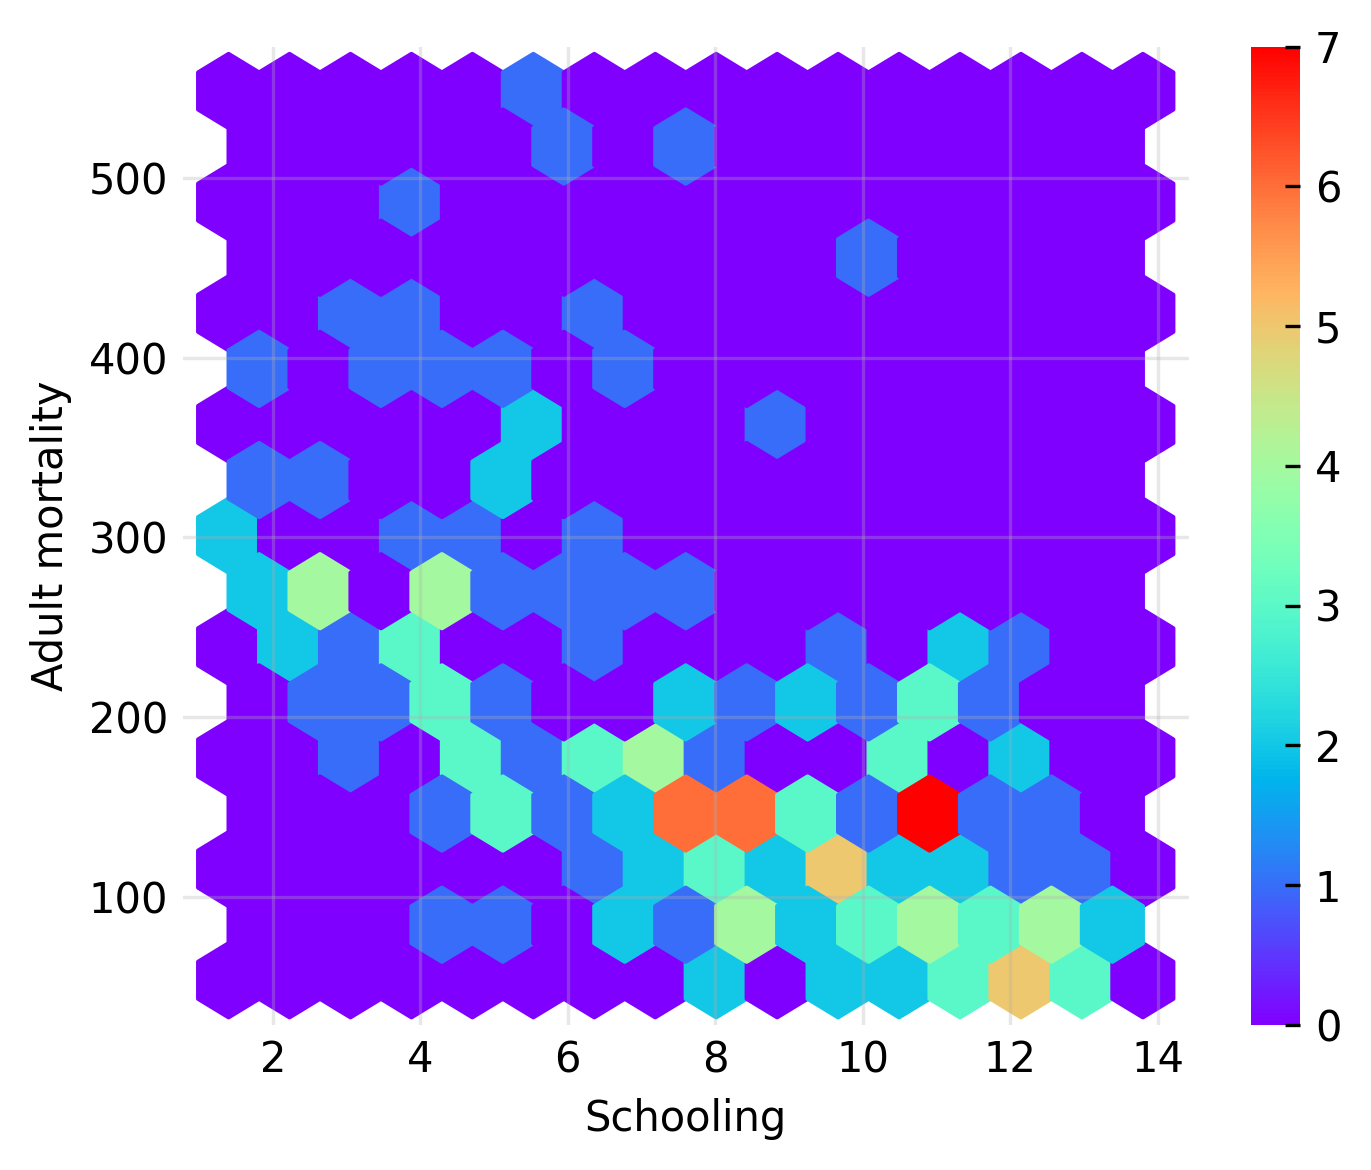

In [48]:
plt.figure(figsize=(5, 4))

plt.hexbin(schooling_mortality_world['Schooling'],
         schooling_mortality_world['Adult_mortality'],
         gridsize=15,
         cmap='rainbow')

# Add colorbar
cbar = plt.colorbar()

# Remove the black outline from the colorbar
cbar.outline.set_visible(False)
cbar.ax.tick_params(direction='in')

plt.grid(True, alpha=0.3, zorder=1)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.xlabel('Schooling')
plt.ylabel('Adult mortality')
plt.tight_layout()
plt.show()

### <font color="#B0AD89"><strong>c ⬝ </strong></font>Not designing for color-vision deficiency

<img src="https://i.imgur.com/7dOYd3r.png" width=1024 />

<img src="https://i.imgur.com/1NQIZgR.png" width=1024 />

<img src="https://i.imgur.com/KXCLCNf.png" width=1024 />

<img src="https://i.imgur.com/DstpyZY.png" width=1024 />

<img src="https://i.imgur.com/GJmSEq8.png" width=1024 />





















## <font color="#B0AD89"><strong>  Practice ᆢ</strong></font>ᆢ
**Issue: What is the relation between Life expectancy and Adult Mortality in America compared to the rest of the world? Where is United States, Brazil, Canada, and Chile in comparison to that?**

Use the dataset from the lecture and figure out what kind of color/type of graphs best answers the issue.

In [49]:
life_exp_adult_mort_AM = (
   life_expectancy[life_expectancy['Year'] == 2010]
   [['Country', 'Region', 'Life_expectancy', 'Adult_mortality']]
   .assign(Region=lambda x: x['Region'].map({
       'European Union': 'Others',
       'Rest of Europe': 'Others',
       'Africa': 'Others',
       'North America': 'America',
       'Central America and Caribbean': 'America',
       'South America': 'America',
       'Middle East': 'Others',
       'Asia': 'Others',
       'Oceania': 'Others'
   }).fillna(x['Region']))
)

life_exp_adult_mort_AM.head()

Country   Region  Life_expectancy  Adult_mortality
31        Switzerland   Others             82.2          56.9105
35            Germany   Others             80.0          77.6040
45             Belize  America             72.1         181.5840
46             Sweden   Others             81.5          57.4920
50  Brunei Darussalam   Others             74.7          91.9455

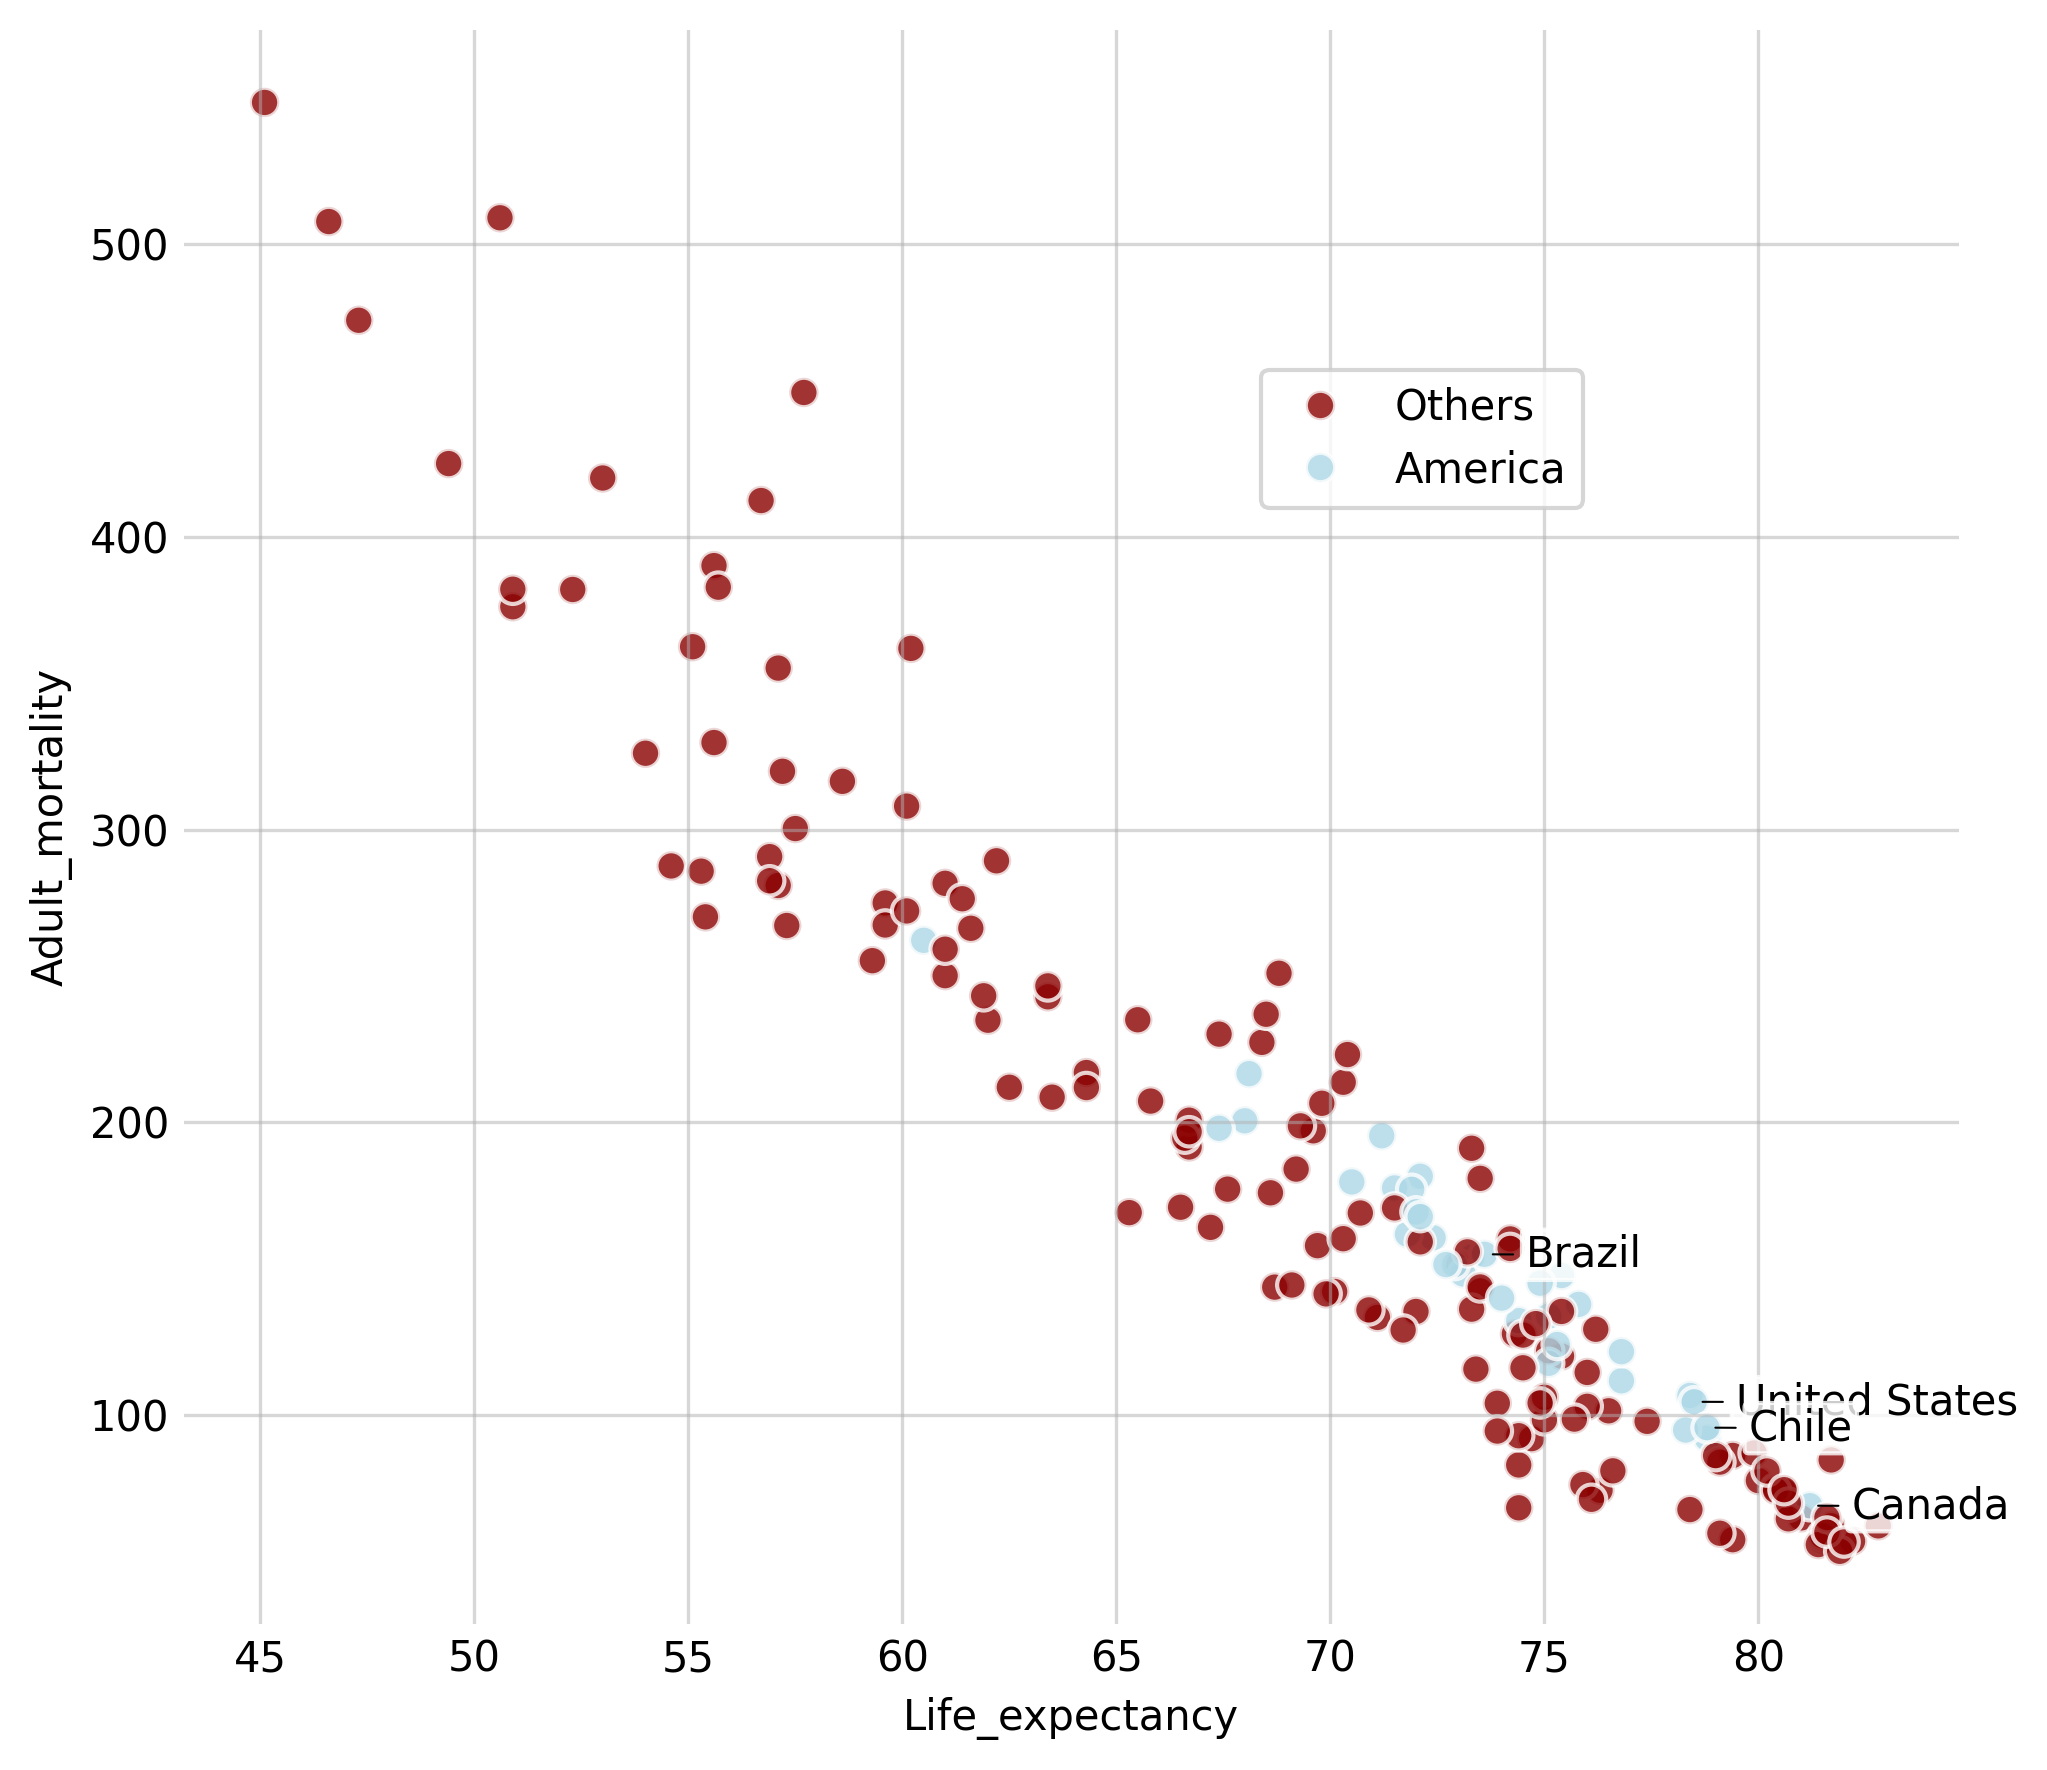

In [ ]:
plt.figure(figsize=(7, 6))

selected_countries = ["United States", "Brazil", "Canada", "Chile"]

region_colors = {
   'America': 'lightblue',
   'Others': 'darkred'
}	# large luminance difference better for colorblindness

# Plot points - Others first, then Europe and Africa
others_data = life_exp_adult_mort_AM[life_exp_adult_mort_AM['Region'] == 'Others']
main_data = life_exp_adult_mort_AM[life_exp_adult_mort_AM['Region'] != 'Others']

# Plot base scatter points
sns.scatterplot(data=life_exp_adult_mort_AM,
               x='Life_expectancy',
               y='Adult_mortality',
               hue='Region',
               palette=region_colors,
               s=50,
               edgecolor='white',
               linewidth=1,
               alpha=0.8)

# Add annotations for selected countries with white boxes and connecting lines
for country in selected_countries:
    country_data = life_exp_adult_mort_AM[life_exp_adult_mort_AM['Country'] == country]
    plt.annotate(country,
                 (country_data['Life_expectancy'].iloc[0],
                  country_data['Adult_mortality'].iloc[0]),
                 xytext=(10, -3),
                 textcoords='offset points',
                 fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.1', edgecolor='white', facecolor='white', alpha=0.8),
                 arrowprops=dict(arrowstyle='-', color='black', lw=0.5))

plt.legend(bbox_to_anchor=(0.8, 0.8))
plt.grid(True, alpha=0.5, zorder=1)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.tight_layout()
plt.show()

## <font color="#B0AD89"><strong>6.4 ⫶ </strong></font>Redundant coding

<img src="https://i.imgur.com/78KmyS9.png" width=1024 />

<img src="https://i.imgur.com/CeeWsvR.png" width=1024 />




### <font color="#B0AD89"><strong>a ⬝ </strong></font>Legends with redundant coding in scatterplot

<img src="https://i.imgur.com/8M6bjDj.png" width=1024 />

<img src="https://i.imgur.com/spbhIet.png" width=1024 />

In [54]:
alcohol_BMI = (
   life_expectancy[
       (life_expectancy['Year'] == 2010) &
       (life_expectancy['Region'].isin(['South America', 'European Union', 'Middle East']))
   ][['Country', 'Region', 'Alcohol_consumption', 'BMI']]
)

print("\nShape:", alcohol_BMI.shape)
alcohol_BMI.head()


Shape: (53, 4)


Country          Region  Alcohol_consumption   BMI
35                Germany  European Union                11.58  26.3
46                 Sweden  European Union                 7.38  25.8
118              Slovenia  European Union                10.33  26.1
151  United Arab Emirates     Middle East                 1.69  28.0
359                  Peru   South America                 5.23  26.0

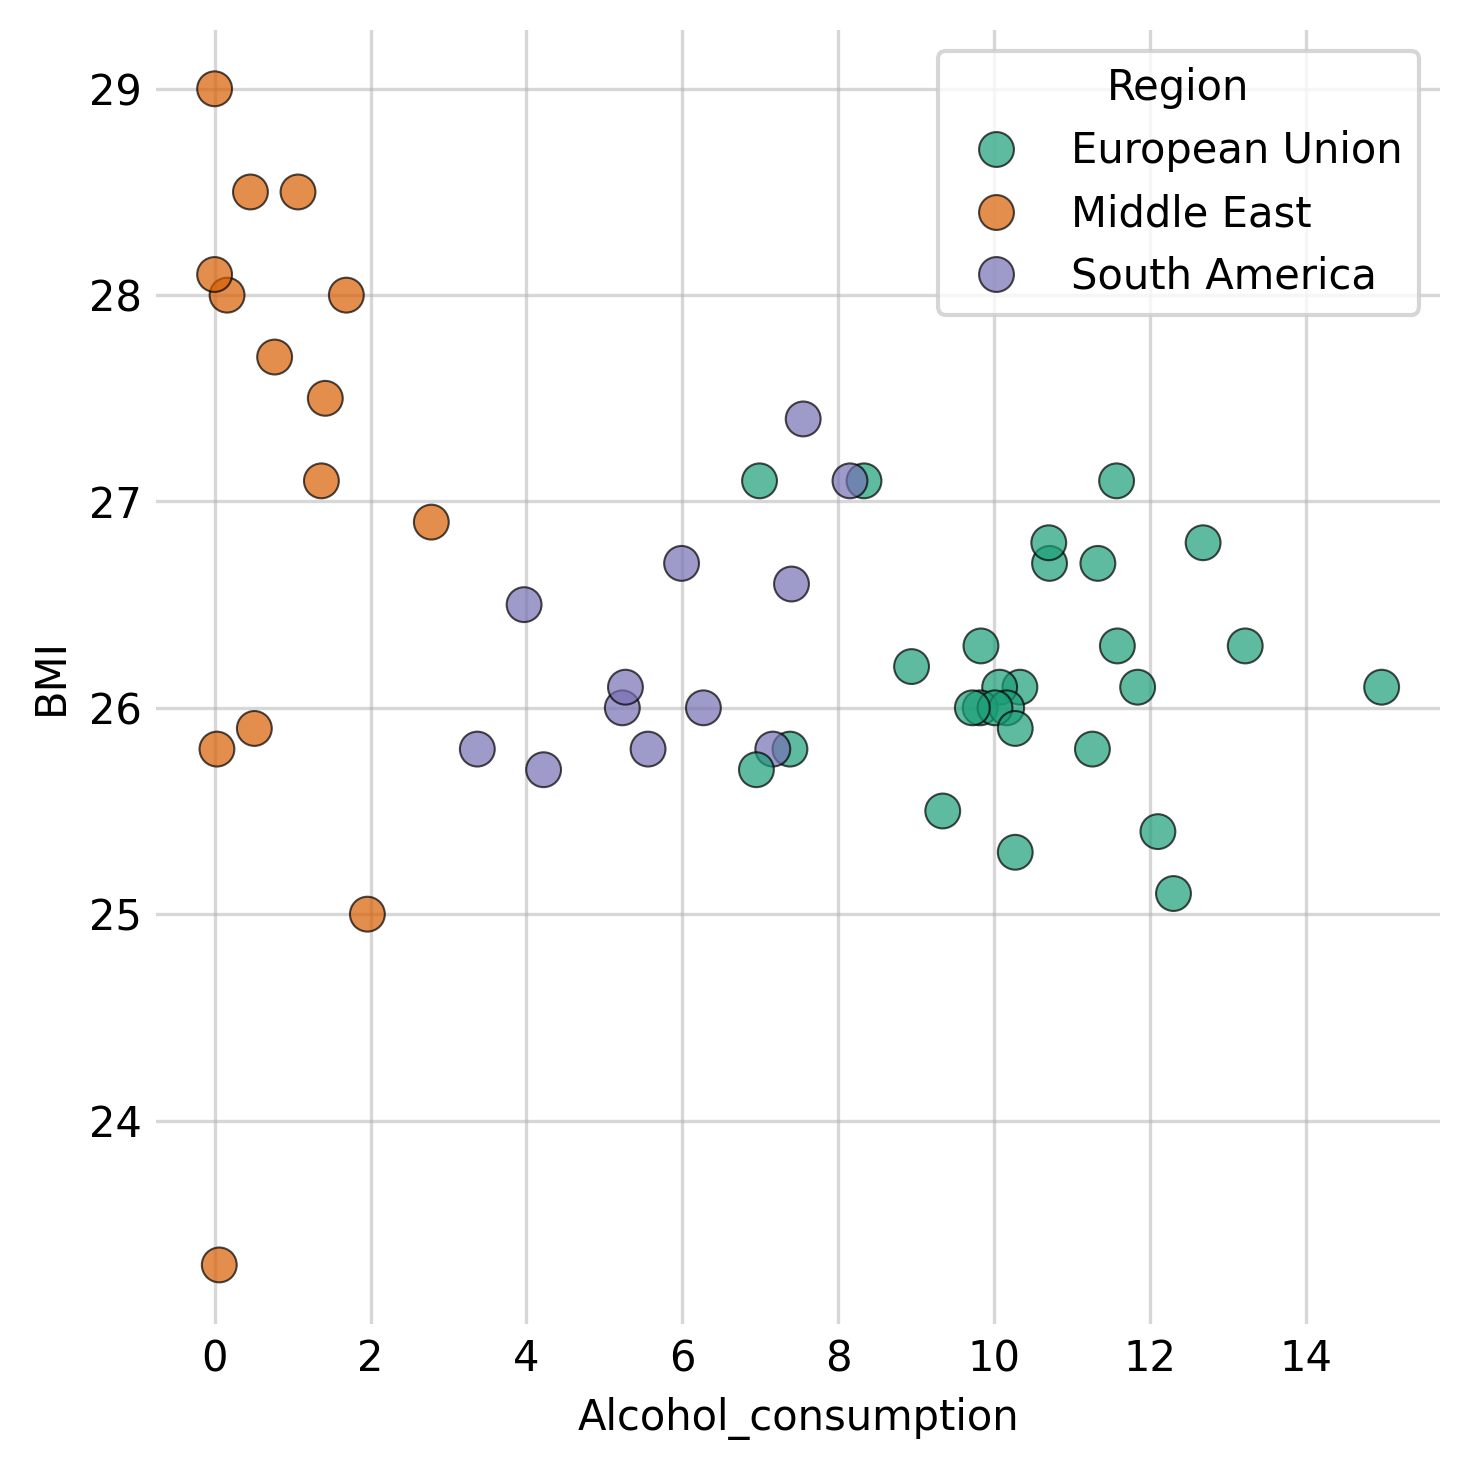

In [55]:
plt.figure(figsize=(5, 5))

sns.scatterplot(data=alcohol_BMI,
               x='Alcohol_consumption',
               y='BMI',
               hue='Region',
               palette='Dark2',
               alpha=0.7,
               s=70,
               linewidth=0.5,
               edgecolor='black',
               zorder=2)

plt.grid(True, alpha=0.5, zorder=1)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/CxwD9Sx.png" width=1024 />

<img src="https://i.imgur.com/zi6UnWz.png" width=1024 />


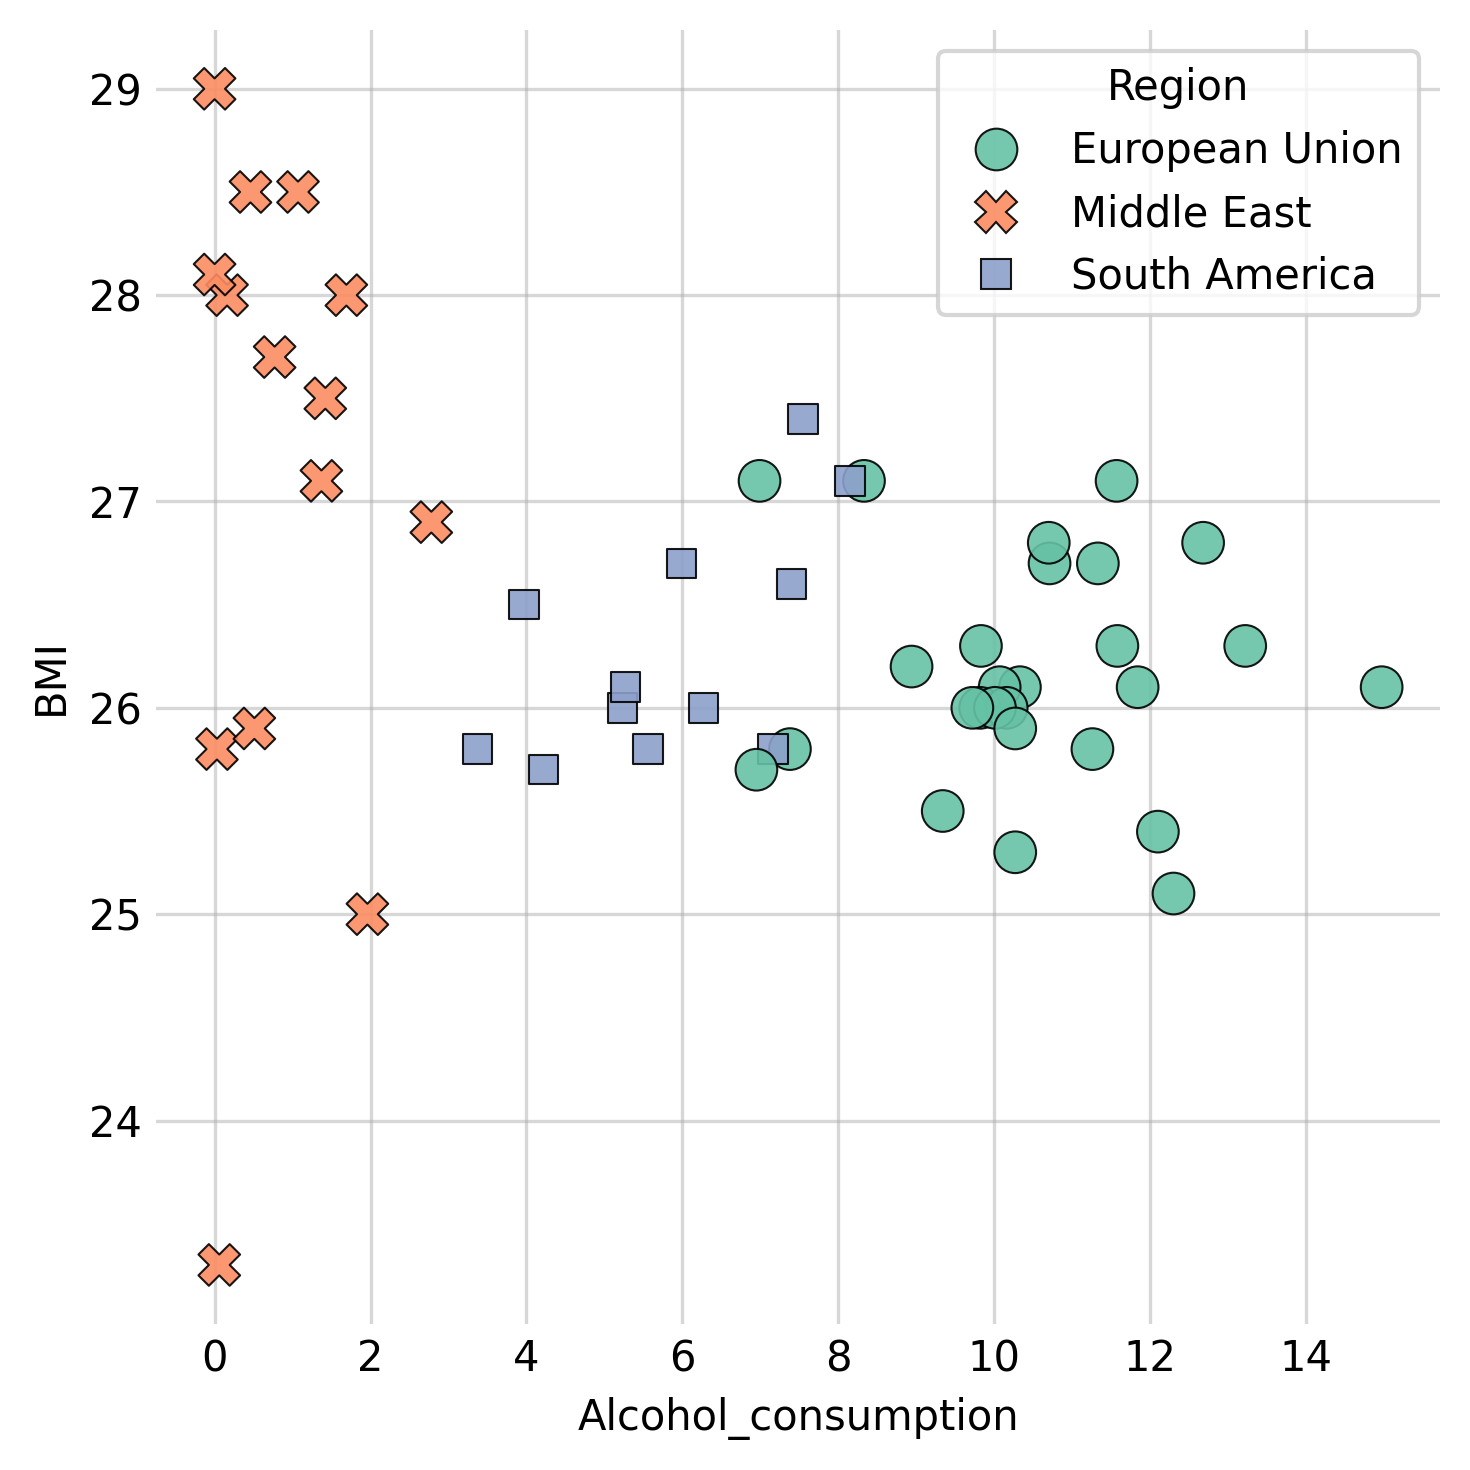

In [56]:
plt.figure(figsize=(5, 5))

sns.scatterplot(data=alcohol_BMI,
               x='Alcohol_consumption',
               y='BMI',
               hue='Region',
               style='Region',
               palette='Set2',
               alpha=0.9,
               s=100,
               linewidth=0.5,
               edgecolor='black',
               zorder=2)

plt.grid(True, alpha=0.5, zorder=1)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.tight_layout()
plt.show()

### <font color="#B0AD89"><strong>b ⬝ </strong></font>Legends with redundant coding in lineplot

<img src="https://i.imgur.com/CPS5kWi.png" width=1024 />

In [58]:
# Define color scheme
region_colors = {
   'Africa': 'grey',
   'South America': 'violet',
   'European Union': 'royalblue',
   'Middle East': 'orange'
}

# Create life expectancy gain dataframe
life_expectancy_gain = (
   life_expectancy[life_expectancy['Region'].isin(['Africa', 'South America', 'European Union', 'Middle East'])]
   .groupby(['Region', 'Year'])['Life_expectancy']
   .mean()
   .reset_index(name='Avg_Life_exp')
)

# Calculate difference from year 2000
base_values = (life_expectancy_gain[life_expectancy_gain['Year'] == 2000]
              [['Region', 'Avg_Life_exp']]
              .rename(columns={'Avg_Life_exp': 'Base_Life_exp'}))

life_expectancy_gain = (
   life_expectancy_gain.merge(base_values, on='Region')
   .assign(Life_expectancy_diff=lambda x: x['Avg_Life_exp'] - x['Base_Life_exp'])
)

life_expectancy_gain.head()

Region  Year  Avg_Life_exp  Base_Life_exp  Life_expectancy_diff
0  Africa  2000     54.137255      54.137255              0.000000
1  Africa  2001     54.358824      54.137255              0.221569
2  Africa  2002     54.594118      54.137255              0.456863
3  Africa  2003     54.964706      54.137255              0.827451
4  Africa  2004     55.450980      54.137255              1.313725

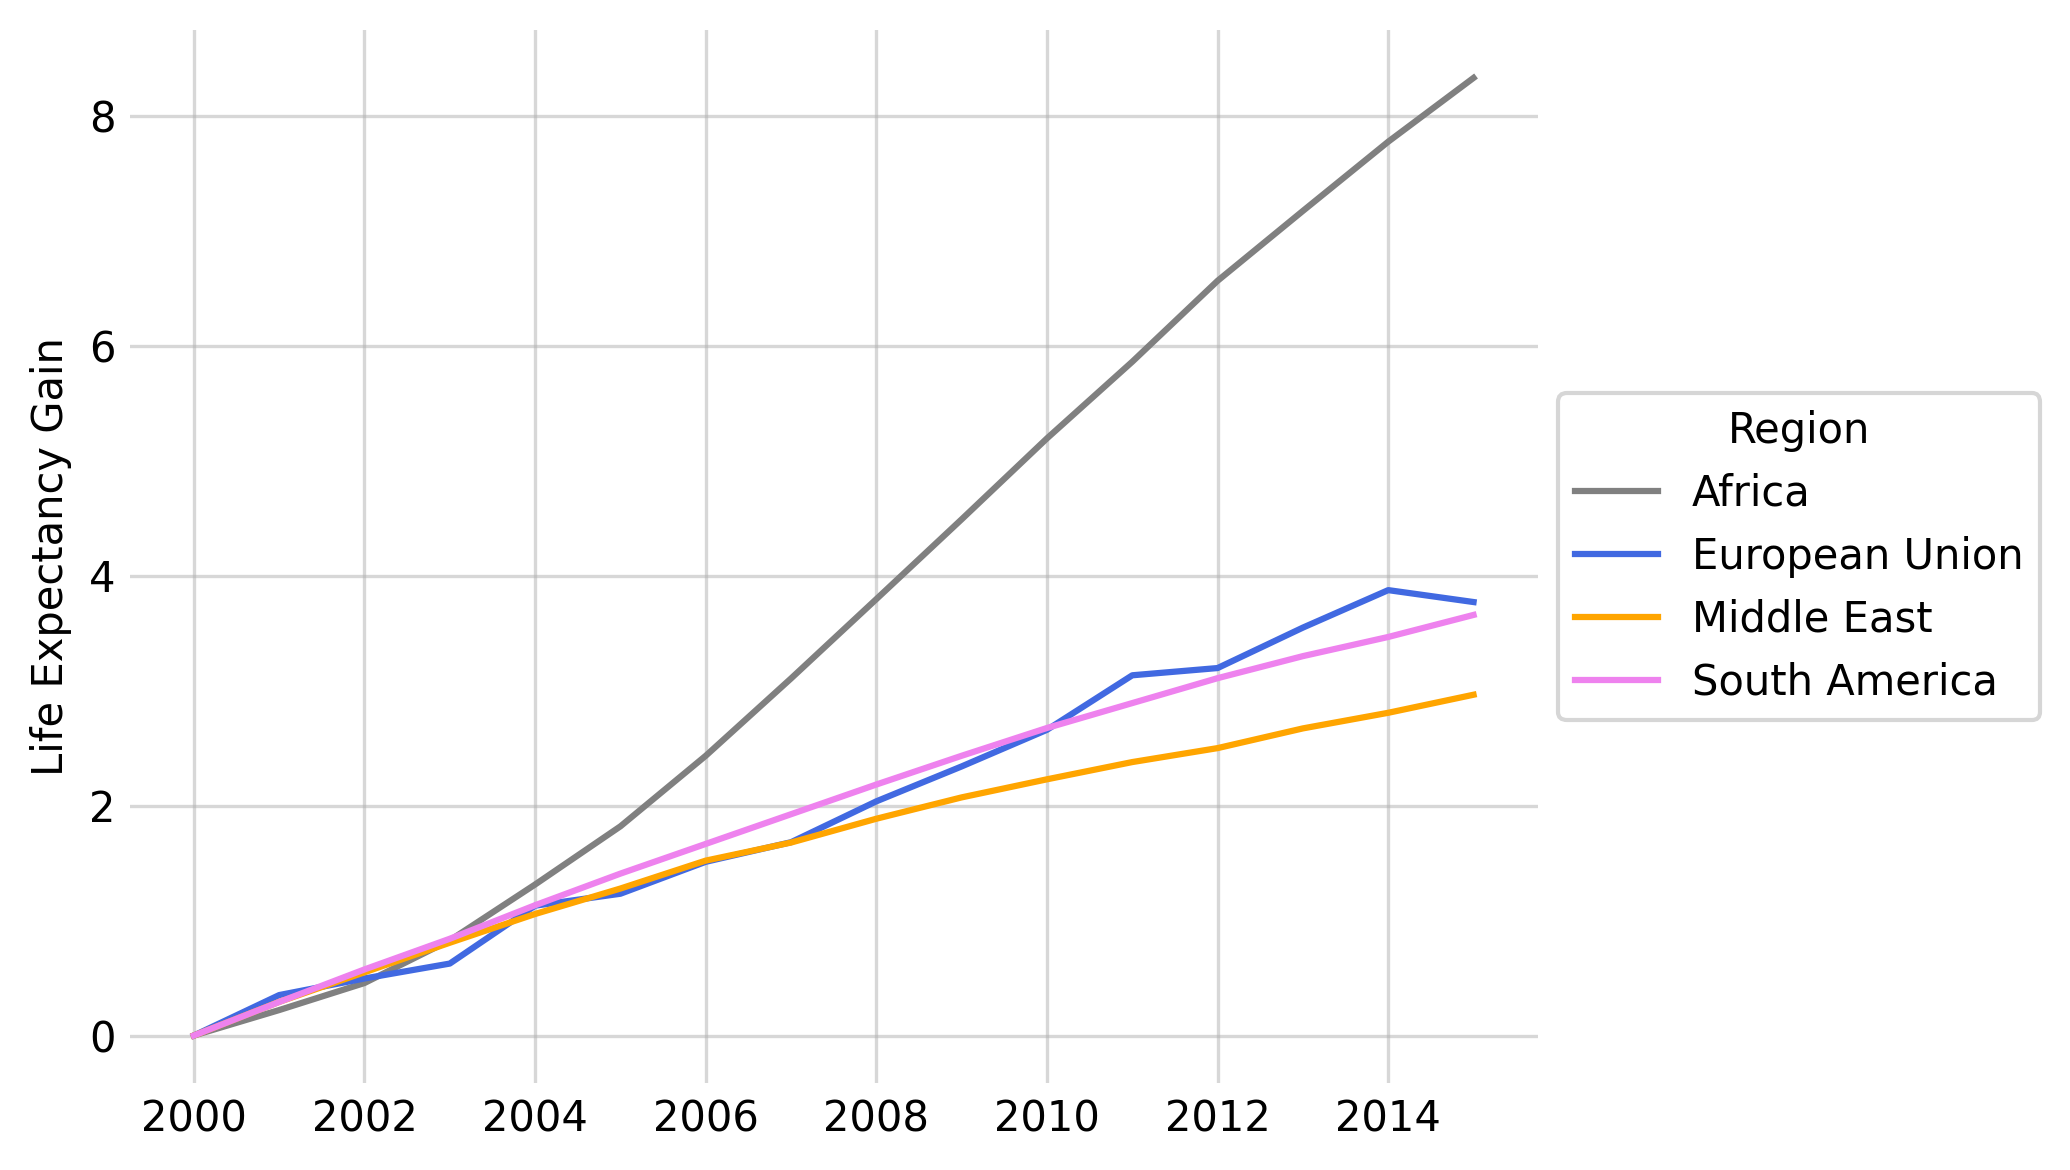

In [59]:
plt.figure(figsize=(7, 4))

sns.lineplot(data=life_expectancy_gain,
           x='Year',
           y='Life_expectancy_diff',
           hue='Region',
           palette=region_colors,
           linewidth=1.5)

plt.legend(title='Region', loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True, alpha=0.5)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.xlabel('')
plt.ylabel('Life Expectancy Gain')
plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/4FYVSq1.png" width=1024 />

<img src="https://i.imgur.com/XsRpUvT.png" width=1024 />



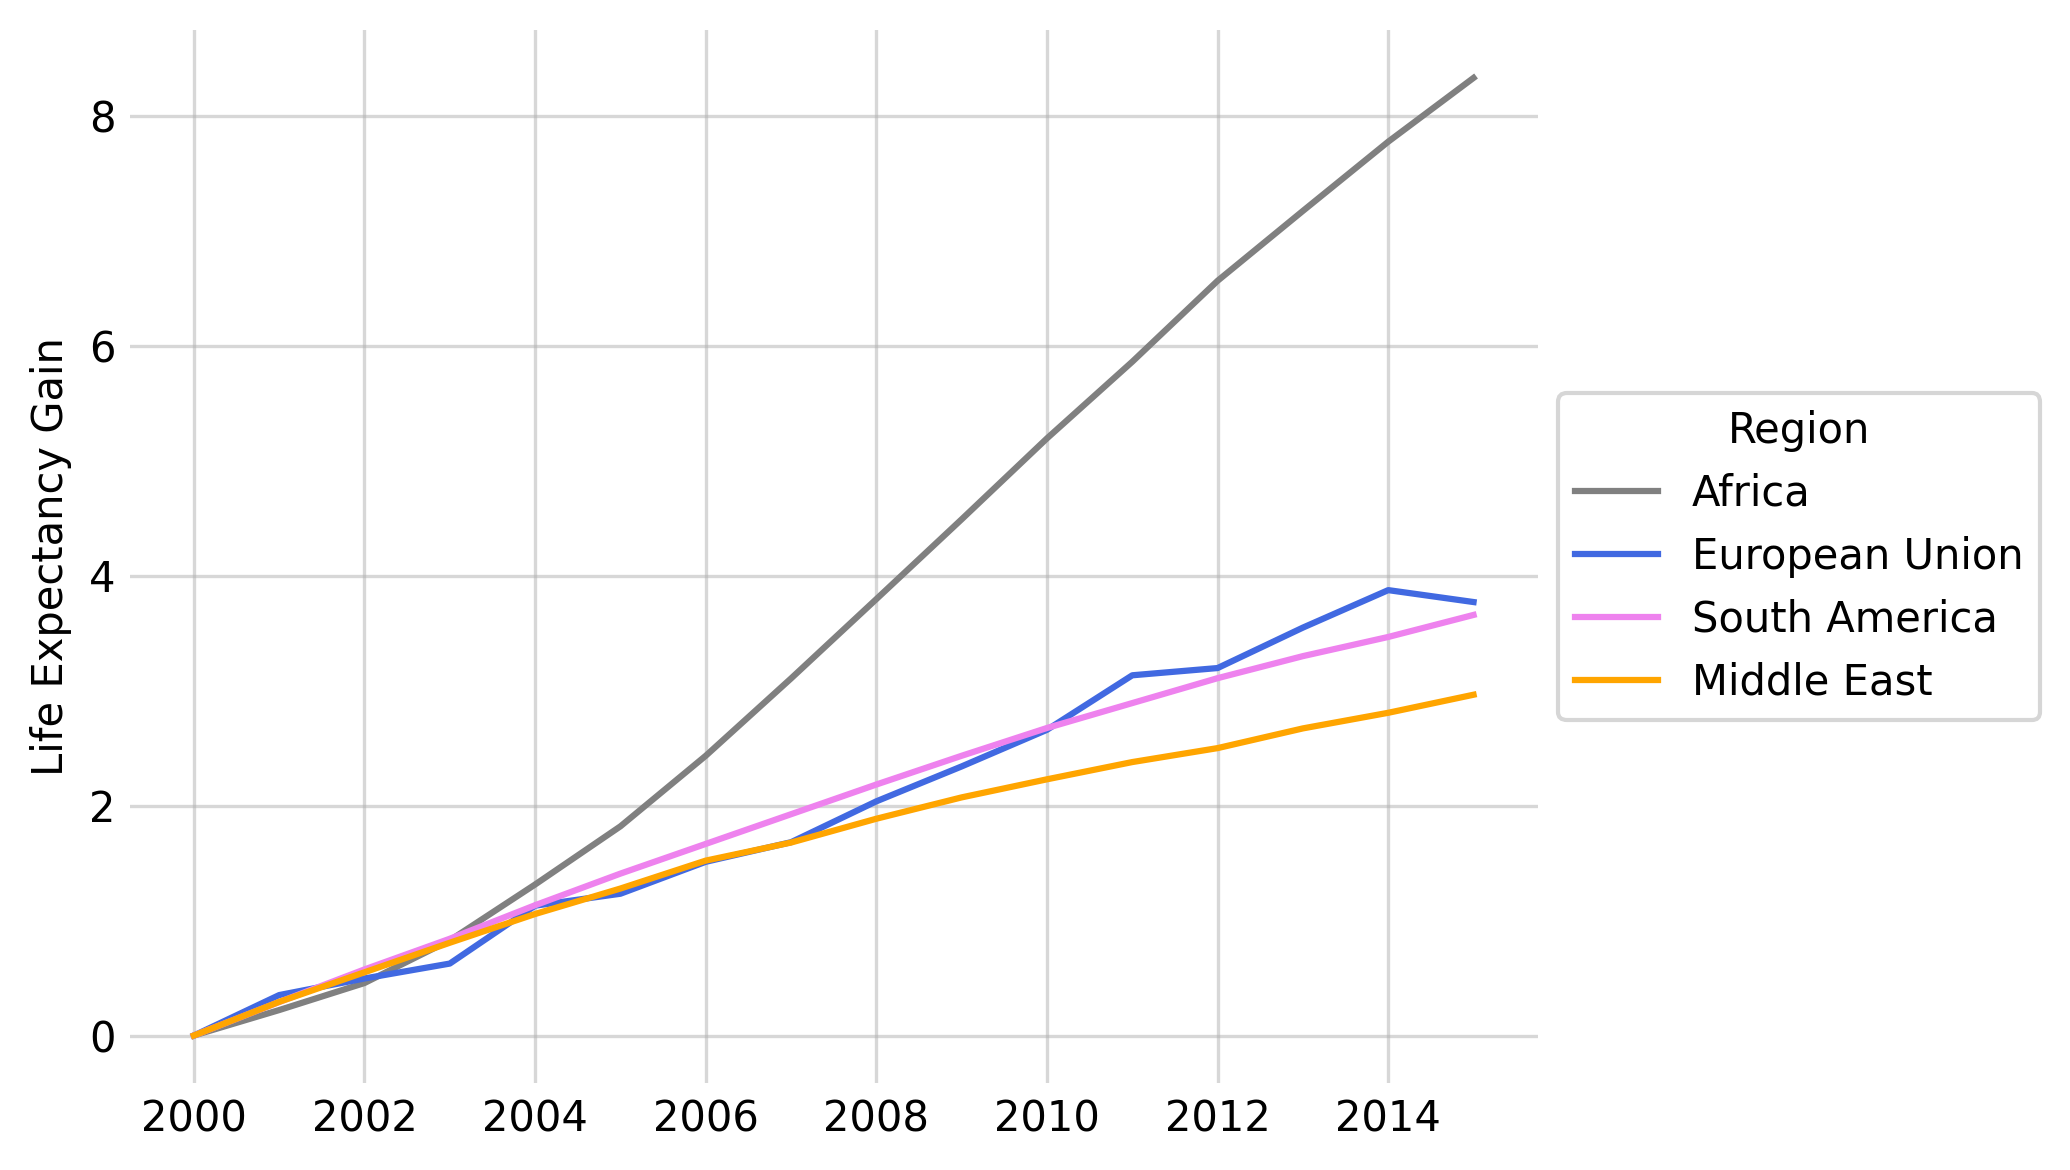

In [60]:
plt.figure(figsize=(7, 4))

# Sort regions by max Life_expectancy_diff
region_order = (life_expectancy_gain
              .groupby('Region')['Life_expectancy_diff']
              .max()
              .sort_values(ascending=False)
              .index)

sns.lineplot(data=life_expectancy_gain,
           x='Year',
           y='Life_expectancy_diff',
           hue='Region',
           hue_order=region_order,
           palette=region_colors,
           linewidth=1.5)

plt.legend(title='Region', loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True, alpha=0.5)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.xlabel('')
plt.ylabel('Life Expectancy Gain')
plt.tight_layout()
plt.show()

### <font color="#B0AD89"><strong>c ⬝ </strong></font>Designing figures without legends

<img src="https://i.imgur.com/5wtBRXN.png" width=1024 />

<img src="https://i.imgur.com/AN1icxJ.png" width=1024 />

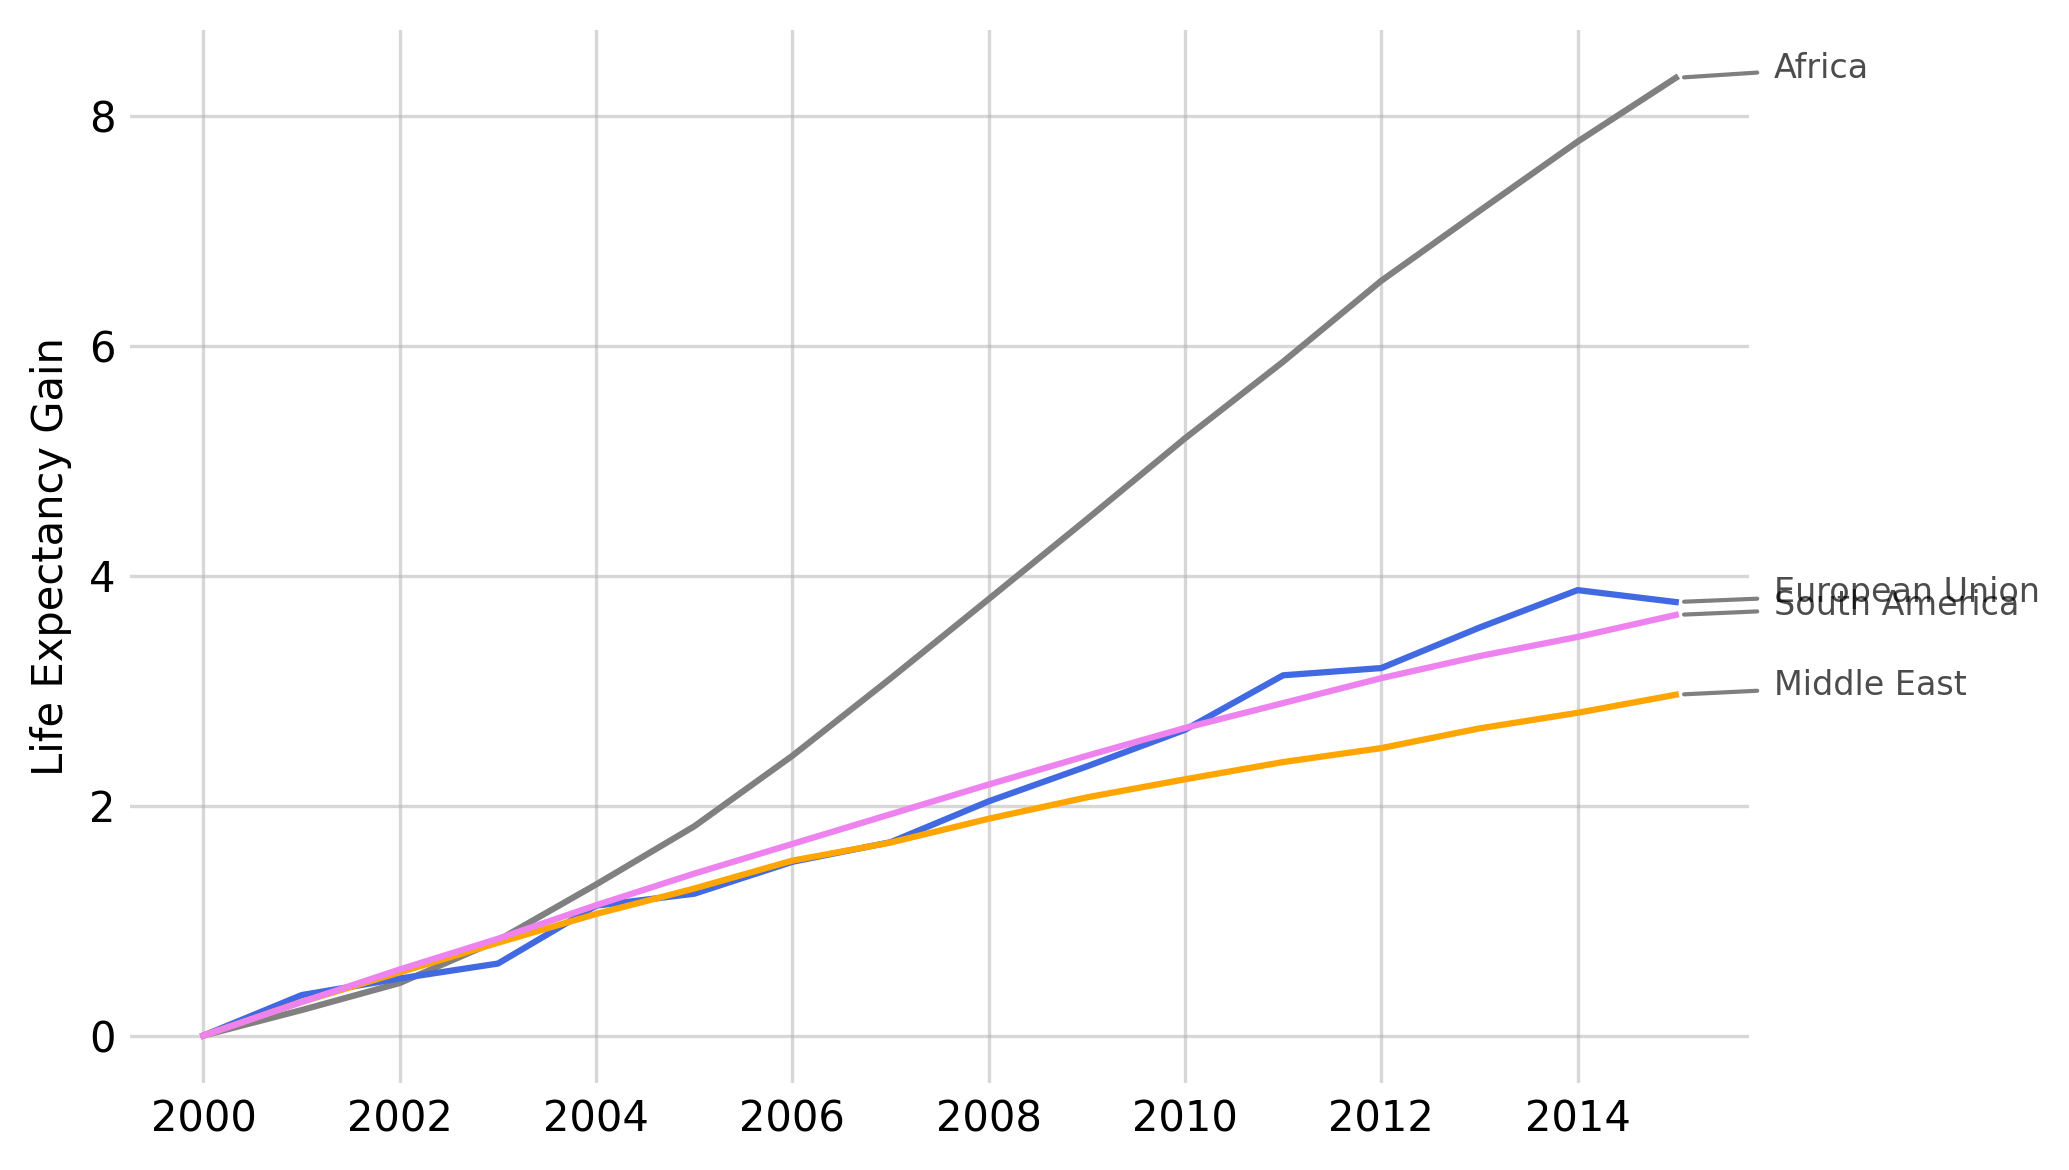

In [61]:
plt.figure(figsize=(7, 4))

# Create line plot with seaborn
sns.lineplot(data=life_expectancy_gain,
           x='Year',
           y='Life_expectancy_diff',
           hue='Region',
           palette=region_colors,
           linewidth=1.5)

# Add labels at 2015
for region in region_colors:
   last_point = life_expectancy_gain[
       (life_expectancy_gain['Year'] == 2015) &
       (life_expectancy_gain['Region'] == region)
   ].iloc[0]

   plt.annotate(region,
               xy=(last_point['Year'], last_point['Life_expectancy_diff']),
               xytext=(last_point['Year'] + 1, last_point['Life_expectancy_diff']),
               color='black',
               fontsize=8,
               alpha=0.7,
               arrowprops=dict(arrowstyle='-', alpha=0.5))

plt.grid(True, alpha=0.5)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.xlabel('')
plt.ylabel('Life Expectancy Gain')
plt.legend().remove()
plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/rLLyMwR.png" width=1024 />

In [62]:
max_BMI = (alcohol_BMI.groupby('Region')
          .agg({'BMI': 'max',
                'Alcohol_consumption': 'max'})
          .reset_index())

max_BMI

Region   BMI  Alcohol_consumption
0  European Union  27.1                14.97
1     Middle East  29.0                 2.78
2   South America  27.4                 8.15

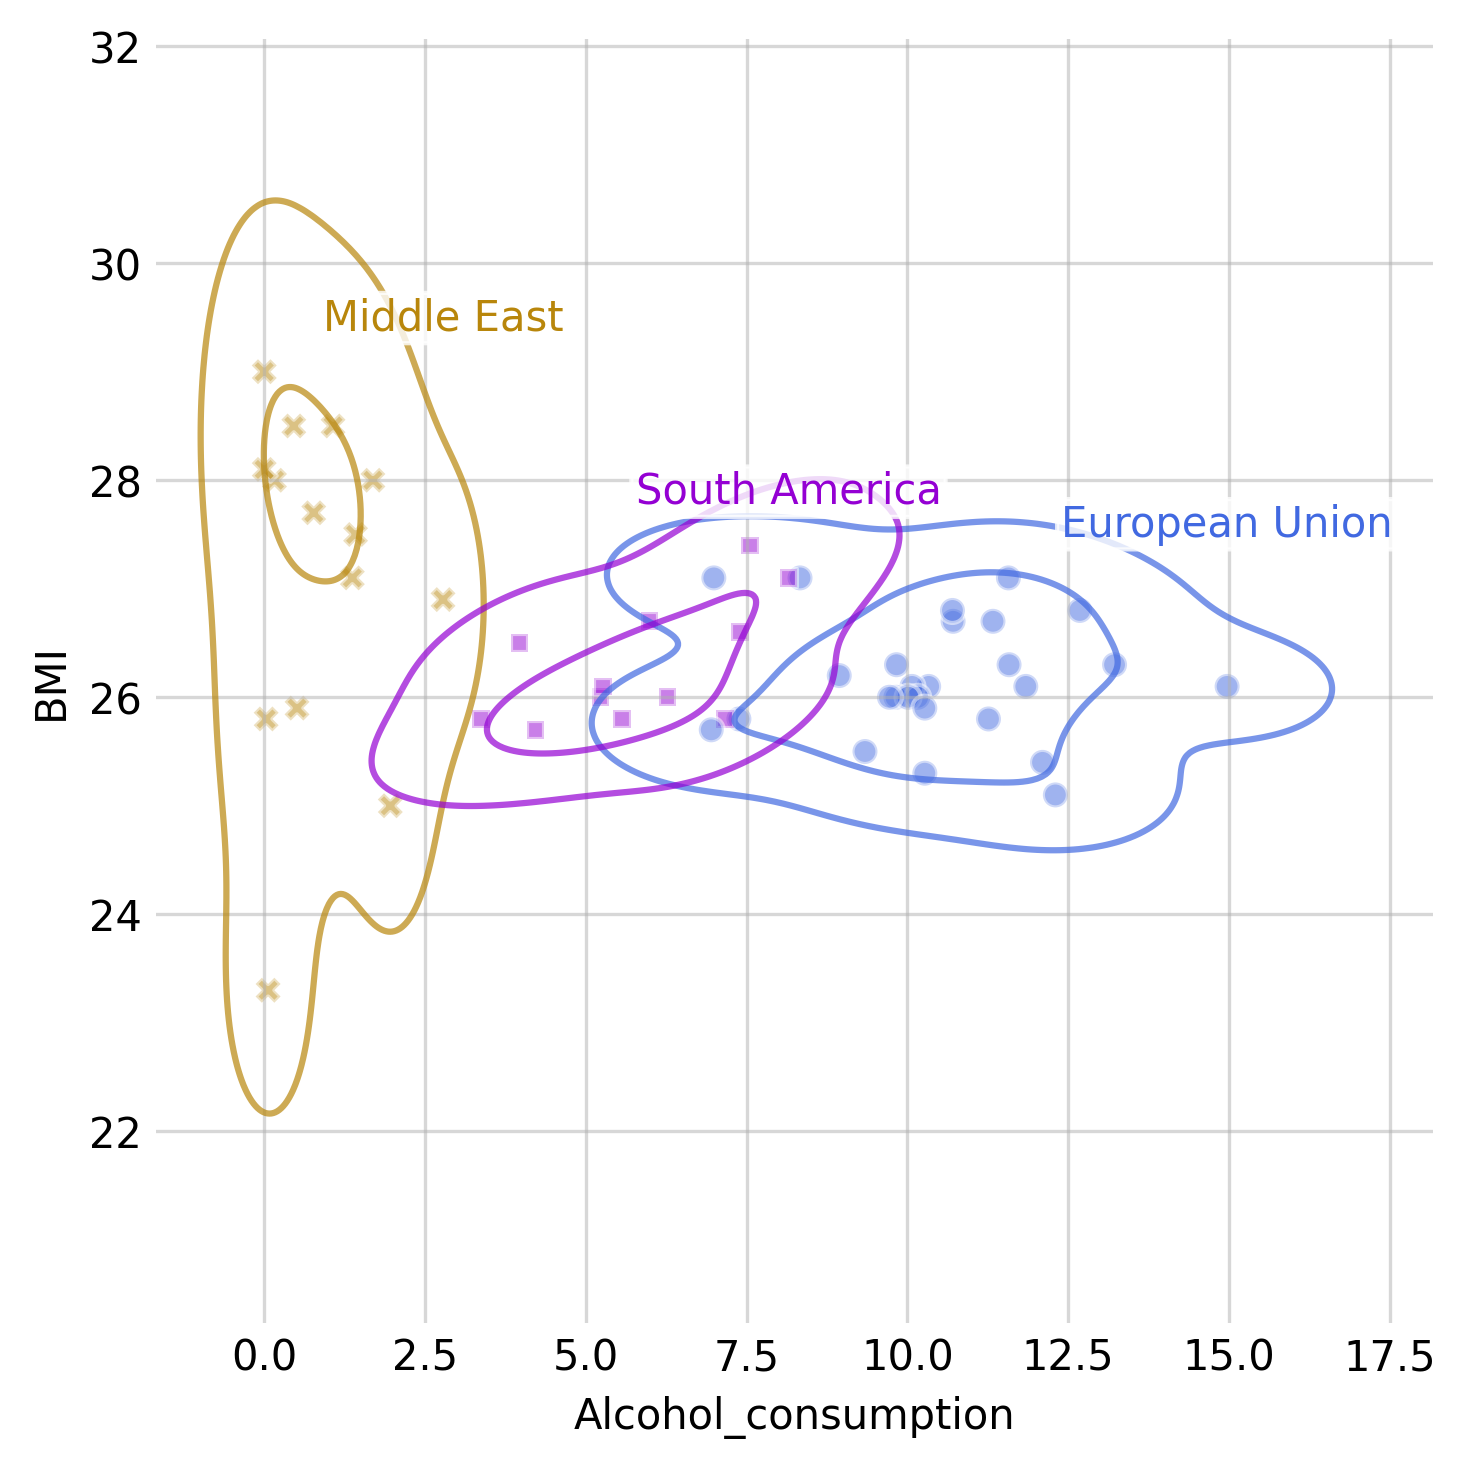

In [63]:
plt.figure(figsize=(5, 5))

# Define colors and markers
colors = {'European Union': 'royalblue', 'South America': 'darkviolet', 'Middle East': 'darkgoldenrod'}

# Create KDE plots using hue
sns.kdeplot(data=alcohol_BMI,
            x='Alcohol_consumption',
            y='BMI',
            hue='Region',
            levels=3,
            alpha=0.7,
            palette=colors)

# Create scatter plot using hue
sns.scatterplot(data=alcohol_BMI,
                x='Alcohol_consumption',
                y='BMI',
                hue='Region',
                style='Region',
                palette=colors,
                linewidth=1,
                alpha=0.5)

# Add region labels using a loop
for region in alcohol_BMI['Region'].unique():
    region_max = max_BMI[max_BMI['Region'] == region].iloc[0]
    plt.annotate(region,
                 xy=(region_max['Alcohol_consumption'], region_max['BMI']),
                 xytext=(0, 10),
                 textcoords='offset points',
                 color=colors[region],
                 ha='center',
                 fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.1', facecolor='white', edgecolor='white', alpha=0.8))

# Add grid and customize plot
plt.legend().remove()
plt.grid(True, alpha=0.5, zorder=1)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.tight_layout()

# Display the plot
plt.show()

<img src="https://i.imgur.com/lZv3m7y.png" width=1024 />

/tmp/ipykernel_78769/4198072292.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


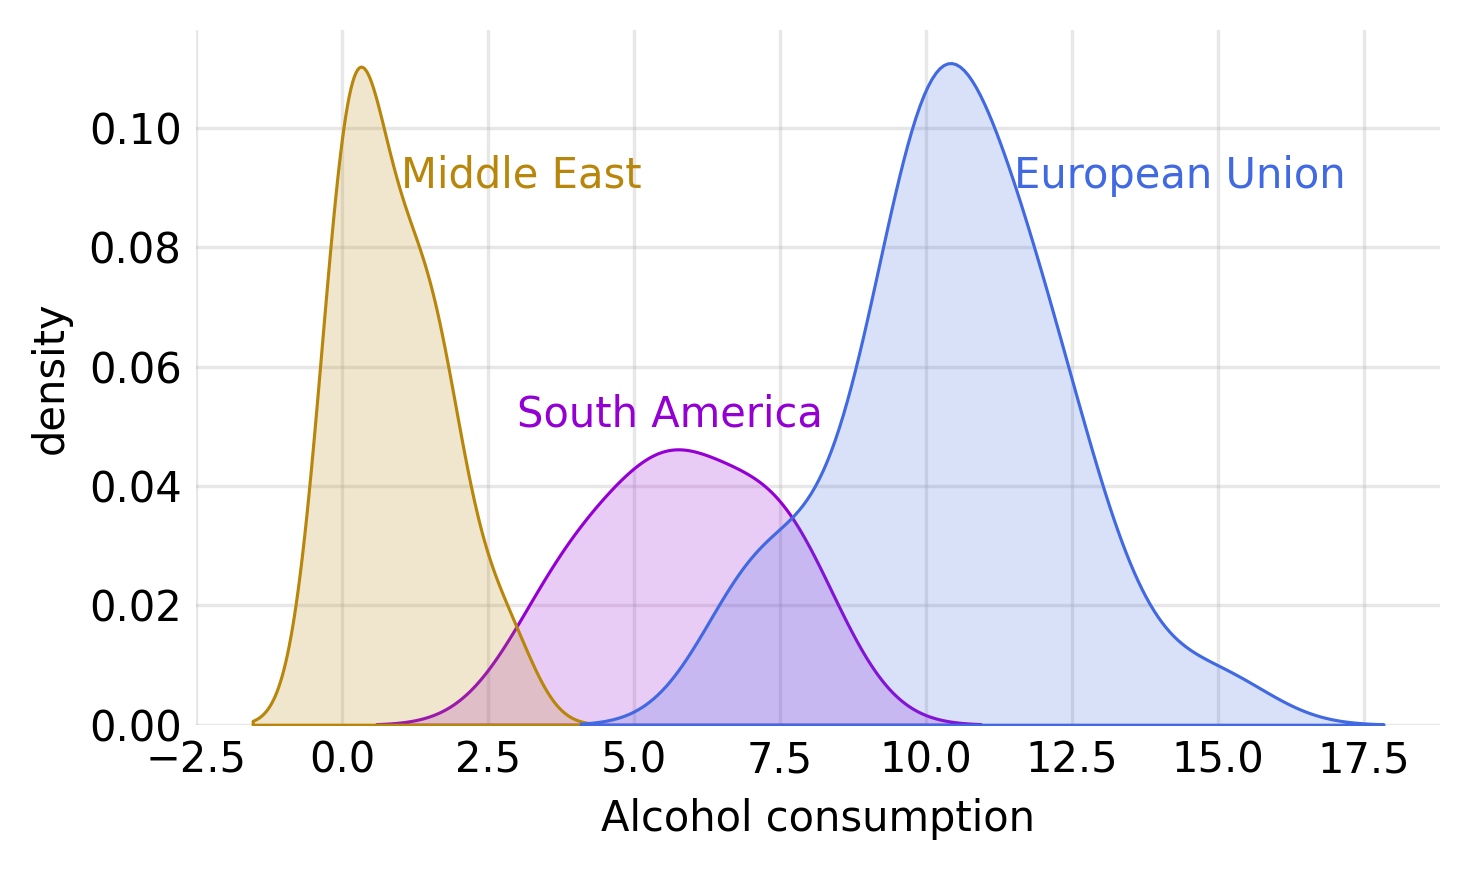

In [64]:
plt.figure(figsize=(5, 3))

# Define colors and markers
colors = {'European Union': 'royalblue', 'South America': 'darkviolet', 'Middle East': 'darkgoldenrod'}

# Create density plots
sns.kdeplot(data=alcohol_BMI,
               x='Alcohol_consumption',
               hue='Region',
               palette=colors,
               fill=True,
               alpha=0.2,
               linewidth=0.75,
               zorder=2)

# Add annotations
plt.text(11.5, 0.09, 'European Union', color='royalblue', fontsize=10)
plt.text(3, 0.05, 'South America', color='darkviolet', fontsize=10)
plt.text(1, 0.09, 'Middle East', color='darkgoldenrod', fontsize=10)

plt.legend().remove()
plt.xlabel('Alcohol consumption')
plt.ylabel('density')
plt.grid(True, alpha=0.3, zorder=1)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/Dwb2MTa.png" width=1024 />

/tmp/ipykernel_78769/935816101.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


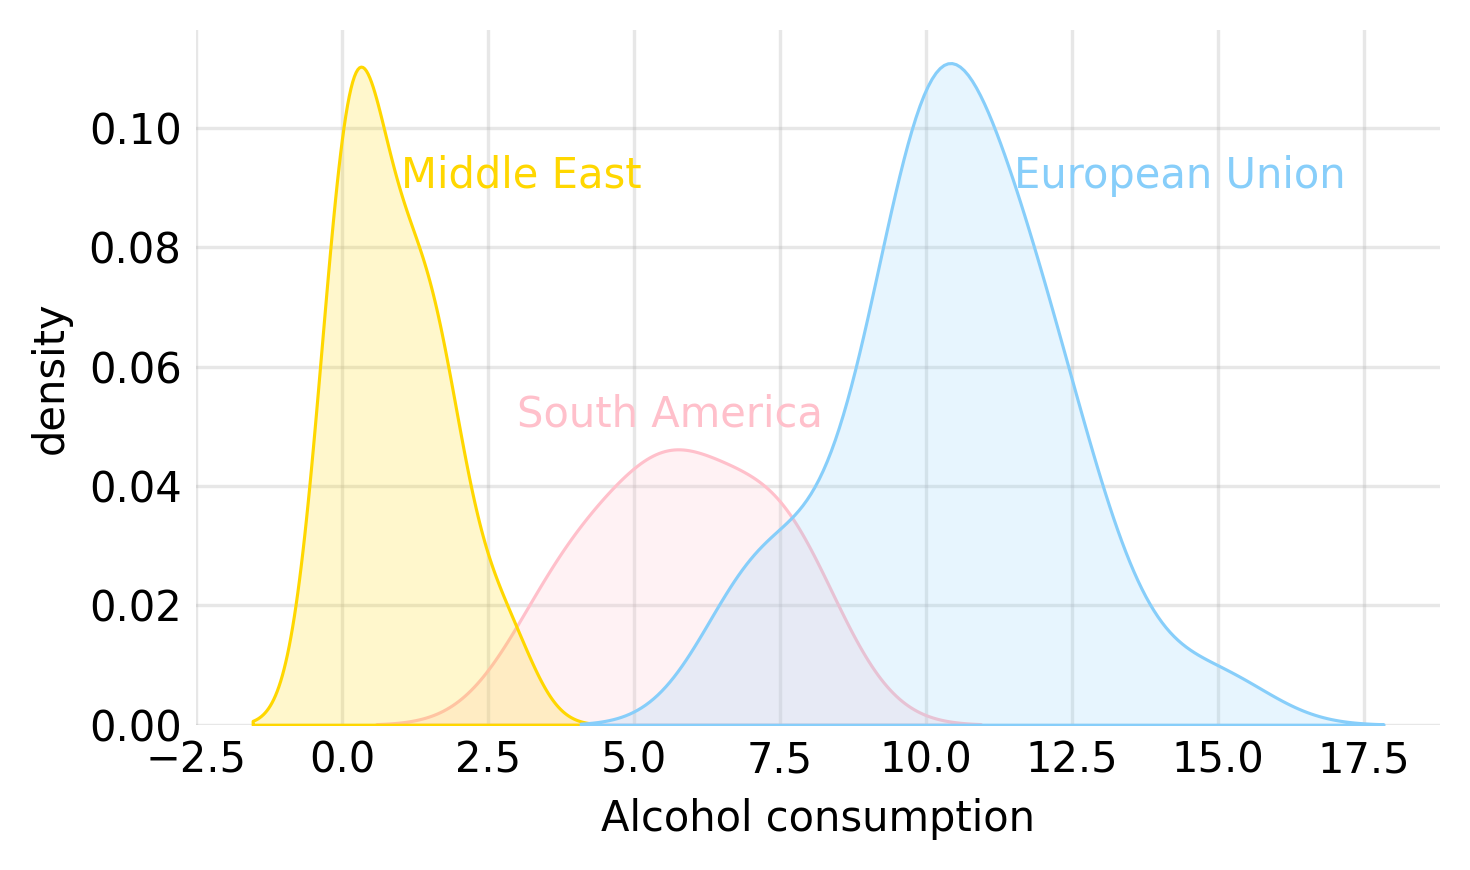

In [65]:
plt.figure(figsize=(5, 3))

# Define colors and markers
colors = {'European Union': 'lightskyblue', 'South America': 'pink', 'Middle East': 'gold'}

# Create density plots
sns.kdeplot(data=alcohol_BMI,
               x='Alcohol_consumption',
               hue='Region',
               palette=colors,
               fill=True,
               alpha=0.2,
               linewidth=0.75,
               zorder=2)

# Add annotations
plt.text(11.5, 0.09, 'European Union', color='lightskyblue', fontsize=10)
plt.text(3, 0.05, 'South America', color='pink', fontsize=10)
plt.text(1, 0.09, 'Middle East', color='gold', fontsize=10)

plt.legend().remove()
plt.xlabel('Alcohol consumption')
plt.ylabel('density')
plt.grid(True, alpha=0.3, zorder=1)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/vkfoyJZ.png" width=1024 />

## <font color="#B0AD89"><strong>  Practice ᆢ</strong></font>ᆢ
**Issue: What is the relation between Life expectancy and Alcohol consumption in America?**

Make a scatter plot for the three regions in the America, each with different shape. Add contour and region name next to it. No legend.

In [69]:
# DATA PREPARATION
alcohol_life = life_expectancy[
    (life_expectancy['Year'] == 2010) &
    (life_expectancy['Region'].isin(['North America', 'Central America and Caribbean', 'South America']))
][['Country', 'Region', 'Alcohol_consumption', 'Life_expectancy']]

alcohol_life.head()

Country                         Region  Alcohol_consumption  \
45      Belize  Central America and Caribbean                 6.47   
203   Honduras  Central America and Caribbean                 2.69   
225      Haiti  Central America and Caribbean                 2.28   
286  Nicaragua  Central America and Caribbean                 3.33   
335  Guatemala  Central America and Caribbean                 2.03   

     Life_expectancy  
45              72.1  
203             73.3  
225             60.5  
286             72.4  
335             71.5

In [81]:
# Data frame for labels
max_alcohol_life = (alcohol_life
    .groupby('Region')
    .agg({
        'Life_expectancy': 'max',
        'Alcohol_consumption': 'max'
    })
    .reset_index()
)

max_alcohol_life.loc[max_alcohol_life["Region"]=="South America", 'Life_expectancy'] = 80

max_alcohol_life

Region  Life_expectancy  Alcohol_consumption
0  Central America and Caribbean             78.8                10.33
1                  North America             81.2                 8.56
2                  South America             80.0                 8.15

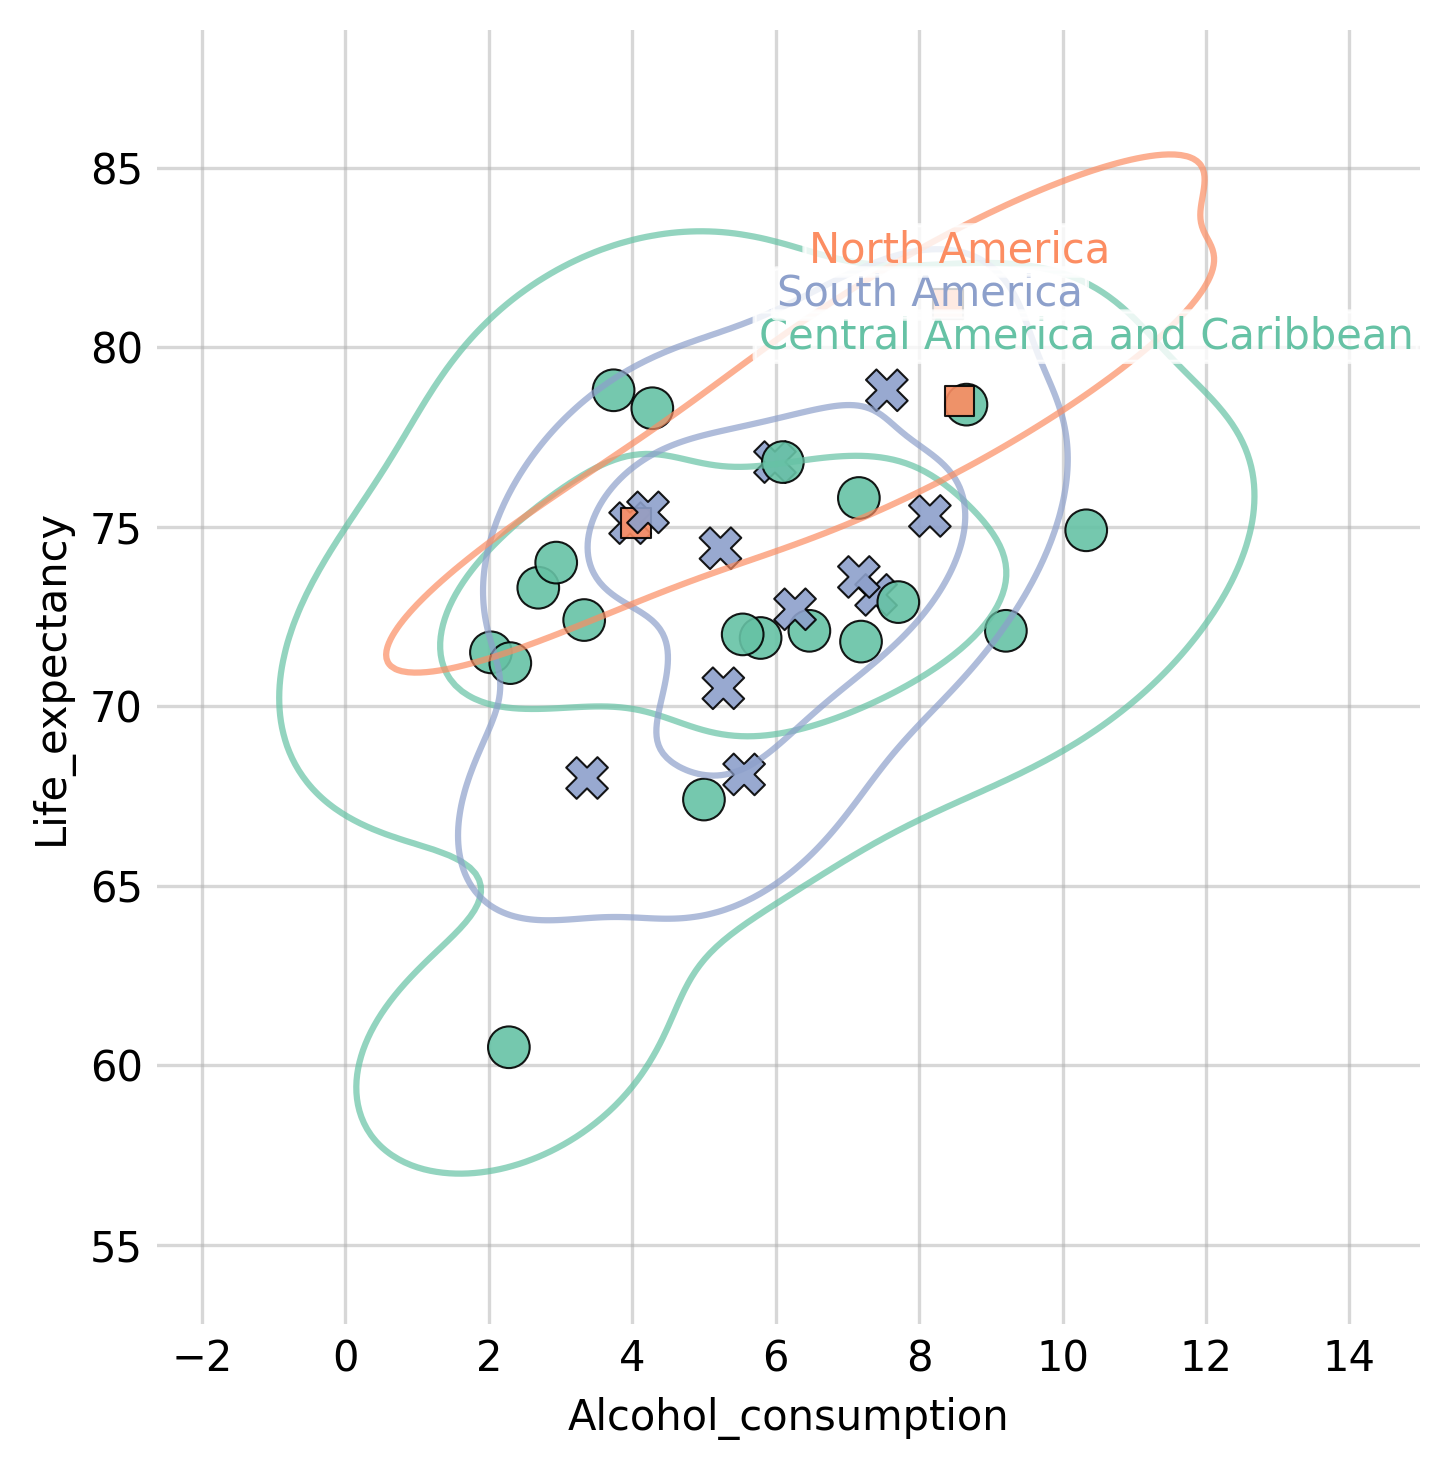

In [82]:
plt.figure(figsize=(5, 5))

colors = {
    ["Central America and Caribbean", "North America", "South America"][i]: sns.color_palette("Set2")[i]
    for i in range(3)
}

sns.scatterplot(data=alcohol_life,
               x='Alcohol_consumption',
               y='Life_expectancy',
               hue="Region",
               style='Region',
               palette=colors,
               alpha=0.9,
               s=100,
               linewidth=0.5,
               edgecolor='black',
               zorder=2)



pal = sns.color_palette("Set2")

# Create KDE plots using hue
sns.kdeplot(data=alcohol_life,
            x='Alcohol_consumption',
            y='Life_expectancy',
            hue="Region",
            levels=3,
            alpha=0.7,
            palette=colors)

# Add region labels using a loop
for i, region in enumerate(alcohol_life['Region'].unique()):
    region_max = max_alcohol_life[max_alcohol_life['Region'] == region].iloc[0]
    plt.annotate(region,
                 xy=(region_max['Alcohol_consumption'], region_max['Life_expectancy']),
                 xytext=(0, 10),
                 textcoords='offset points',
                 color=colors[region],
                 ha='center',
                 fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.1', facecolor='white', edgecolor='white', alpha=0.8))

plt.legend().remove()
plt.grid(True, alpha=0.5, zorder=1)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.tight_layout()
plt.show()